In [6]:
import os
import MDAnalysis as mda

In [7]:
#! pip install ipywidgets

In [8]:
import prolif as plf

In [9]:
from pathlib import Path
import sys
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw, PandasTools, MolStandardize
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
import rdkit.rdBase as rkrb
import rdkit.RDLogger as rkl
from IPython.display import display, display_png
from pandas import DataFrame
import pandas as pd
import numpy as np
import logging
from tqdm import tqdm
from rdkit.Geometry import rdGeometry

In [17]:


from rdkit.Chem import AllChem, Descriptors, Draw, PandasTools, MolStandardize
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
import rdkit.rdBase as rkrb
import rdkit.RDLogger as rkl
from IPython.display import display, display_png
from sklearn.preprocessing import FunctionTransformer
from pandas import DataFrame
import pandas as pd
import numpy as np
import logging
from tqdm import tqdm
from rdkit.Geometry import rdGeometry

In [18]:
pd.set_option('display.max_columns', 1320)

In [58]:
df1 = PandasTools.LoadSDF('/home/elly/Programming/GPCR_data/cache5/graphLambda/poses_active_ex8_KiIC50.sdf',molColName='ROMol', removeHs=False, includeFingerprints=True)

# Adding missed H

In [128]:
df1 = PandasTools.LoadSDF('/home/elly/Programming/GPCR_data/cache5/graphLambda/poses_inactive_ex8_KiIC50_protonated.sdf',molColName='ROMol', removeHs=False, includeFingerprints=True)


In [7]:
df1 = PandasTools.LoadSDF('herg_SP_no_dubles_dimer.sdf',molColName='ROMol', removeHs=False, includeFingerprints=True)

In [34]:
u = mda.Universe(plf.datafiles.datapath/'208_md'/'nojmp.gro', plf.datafiles.datapath/'208_md'/'nojmp.xtc', guess_bonds=True)

In [64]:
u = mda.Universe('/home/elly/anaconda3/envs/prolif/lib/python3.11/site-packages/prolif/data/208_md/nojmp.gro', '/home/elly/anaconda3/envs/prolif/lib/python3.11/site-packages/prolif/data/208_md/nojmp.xtc', guess_bonds=False)

In [65]:
import MDAnalysis as mda
from MDAnalysis.topology.guessers import guess_types, guess_bonds

In [66]:
u.add_TopologyAttr('elements', guess_types(u.atoms.names))

In [67]:
initial_bonds = guess_bonds(u.atoms, u.atoms.positions)
unique_bonds = list({tuple(sorted(bond)) for bond in initial_bonds})

# Create a new universe with the guessed bonds
new_universe = mda.Merge(u.atoms)
new_universe.add_TopologyAttr('bonds', unique_bonds)

# Assign the trajectory from the original universe to the new one
# The format 'memory' can be used to load trajectory data
coords = [ts.positions.copy() for ts in u.trajectory]
new_universe.load_new(coords, format='memory')

# Proceed with analysis
print(new_universe.atoms)

<AtomGroup [<Atom 1: N of type N of resname SER, resid 1 and segid SYSTEM>, <Atom 2: H1 of type H of resname SER, resid 1 and segid SYSTEM>, <Atom 3: H2 of type H of resname SER, resid 1 and segid SYSTEM>, ..., <Atom 4879: C27 of type C of resname LIG, resid 300 and segid SYSTEM>, <Atom 4880: H of type H of resname LIG, resid 300 and segid SYSTEM>, <Atom 4881: H1 of type H of resname LIG, resid 300 and segid SYSTEM>]>


In [70]:
ligand_selection = new_universe.select_atoms("resname LIG")

In [71]:
protein_selection = new_universe.select_atoms("protein")

In [72]:
ligand_selection, protein_selection

(<AtomGroup with 58 atoms>, <AtomGroup with 4823 atoms>)

In [74]:
ligand_mol = plf.Molecule.from_mda(ligand_selection)

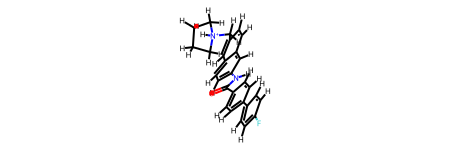

In [75]:
ligand_mol

In [76]:
protein_mol = plf.Molecule.from_mda(protein_selection)

In [78]:
fp = plf.Fingerprint()
fp.run(new_universe.trajectory, ligand_selection, protein_selection)

  0%|          | 0/4001 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 9 interactions: ['Hydrophobic', 'HBAcceptor', 'HBDonor', 'Cationic', 'Anionic', 'CationPi', 'PiCation', 'PiStacking', 'VdWContact'] at 0x78475aff5c90>

<Axes: xlabel='Frame'>

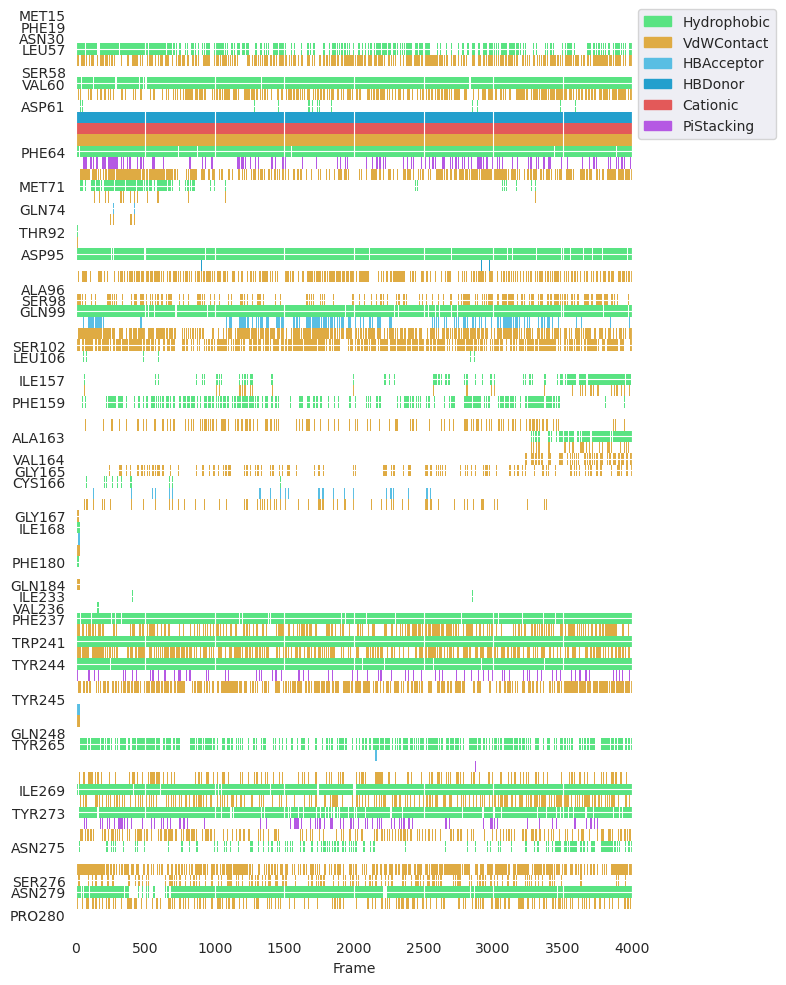

In [79]:
fp.plot_barcode()

In [17]:
df1['Value_nM'] = df1['Value_nM'].astype(float)

In [22]:
df_10000 = df1[df1['Value_nM'] < 10000]

In [24]:
PandasTools.WriteSDF(df_10000, '/home/elly/Programming/GPCR_data/cache5/test_outputs/poses_active_ex8_KiIC50_10000.sdf', molColName='ROMol', properties=list(df_10000.columns))

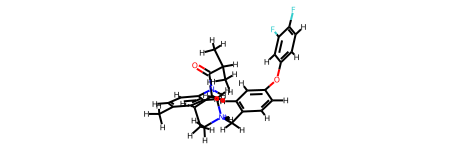

In [26]:
df_10000['ROMol'][2397]

Smiles Standard_Type  \
0     N#Cc1cccc(-c2ccc([C@@H](CCc3nc4c(Cl)cc(Cl)cc4[...            Ki   
1     O=c1cc(OCc2ccc(F)cc2)ccn1-c1ccc(OCC[NH+]2CCCC2...          IC50   
2     COc1cc(NC(=O)c2ccc(-c3ccccc3)cc2)ccc1C(=O)NCC[...          IC50   
3         O=C(Nc1ccc2nc(C3CC3)cn2c1)c1ccc(-c2ccccn2)cc1          IC50   
4     Cc1nc2cc(C#N)ccc2n1[C@H]1CC[C@@H]([NH2+]C[C@@H...          IC50   
...                                                 ...           ...   
3209  CC(=O)Nc1ccc([C@]23CC[C@@H](N(CCC[NH+]4CC[NH+]...            Ki   
3210  Cc1ccc(/C=C/C(=O)Nc2ccc3nc(N(C)CC[NH+](C)C)cc(...          IC50   
3211  Cc1c(C2CC2)nc2ccc(NC(=O)c3ccc(-c4ccc(S(C)(=O)=...          IC50   
3212  CN(C)S(=O)(=O)c1ccc2c(c1)C[C@H](N(CCC[NH+]1CC[...            Ki   
3213  O=C(Nc1ccc(Oc2ccccc2)cc1)Nc1ccc2nn(CC[N@@H+]3C...          IC50   

     Value_nM Class minimizedAffinity    ID  \
0        39.5     1         -10.21531     0   
1         5.6     1          -9.67431     1   
2       640.0     1          -6.42214     2   
3       140.0     1          -8.32002     3   
4        76.0     1         -10.47271  2706   
...       ...   ...               ...   ...   
3209      4.8     1         -10.89010  3001   
3210    181.0     1          -7.35261  3002   
3211     48.0     1          -4.28572  3003   
3212   3000.0     1          -9.89994  3004   
3213     57.0     1         -11.43480  3005   

                                                  ROMol  
0     <img data-content="rdkit/molecule" src="data:i...  
1     <img data-content="rdkit/molecule" src="data:i...  
2     <img data-content="rdkit/molecule" src="data:i...  
3     <img data-content="rdkit/molecule" src="data:i...  
4     <img data-content="rdkit/molecule" src="data:i...  
...                                                 ...  
3209  <img data-content="rdkit/molecule" src="data:i...  
3210  <img data-content="rdkit/molecule" src="data:i...  
3211  <img data-content="rdkit/molecule" src="data:i...  
3212  <img data-content="rdkit/molecule" src="data:i...  
3213  <img data-content="rdkit/molecule" src="data:i...  

[3214 rows x 7 columns]
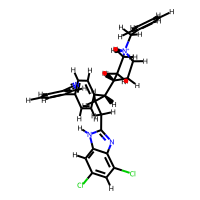
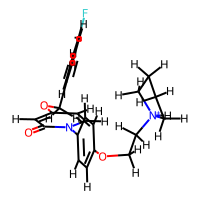
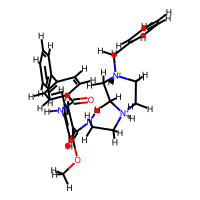
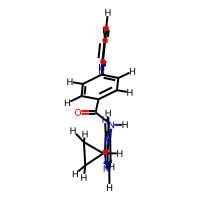
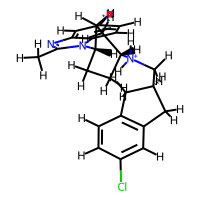
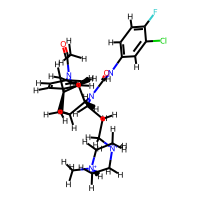
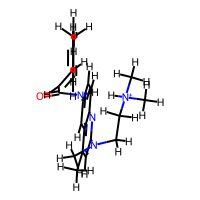
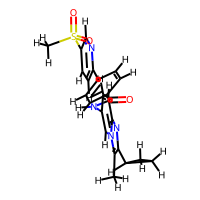
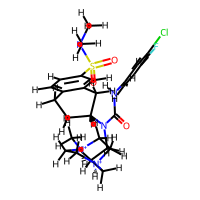
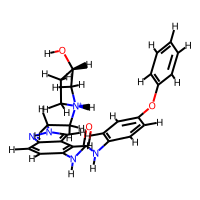

In [15]:
df1

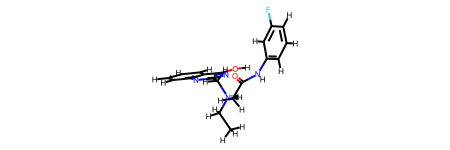

In [66]:
df1['ROMol'][0]

In [9]:
df1 = df1.drop_duplicates(subset=['ID'])

In [10]:

mol2 = df1['Mol'].iloc[0]

In [11]:
CHEMID = df1['ID'].iloc[0]

In [12]:
CHEMID

'CHEMBL428602'

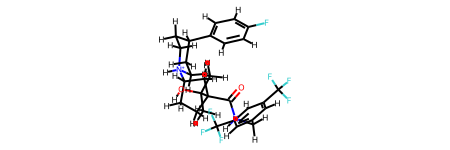

In [13]:
mol2

## Interaction fingerprints

In [144]:
#df = pd.read_table('herg_in_web.csv', sep = ",", engine='python')
#df

In [145]:
#df1.sort_values(by='r_i_docking_score', ascending=False)

In [9]:
def standardize_smiles(df):
    logs = 0
    mols = []
    for i in df["Mol"]:    
        mol = Chem.MolToSmiles(i)
        if mol is not None:
            mols.append(mol)
        else:
            logs+=1
            print(i)
    print(f"Errors:{logs}")
    df["smiles"] = mols
    return df

Errors:0


s_m_entry_id          s_m_entry_name  \
0            19550   ligprep_herg-out.4387   
1            19551  ligprep_herg-out.14201   
2            19552  ligprep_herg-out.14200   
3            19553   ligprep_herg-out.7446   
4            19554  ligprep_herg-out.11140   
...            ...                     ...   
18938        38488   ligprep_herg-out.7241   
18939        38489  ligprep_herg-out.15452   
18940        38490   ligprep_herg-out.7258   
18941        38491  ligprep_herg-out.16640   
18942        38492   ligprep_herg-out.7281   

                           s_m_Source_Path       s_m_Source_File  \
0      /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   
1      /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   
2      /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   
3      /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   
4      /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   
...                                    ...                   ...   
18938  /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   
18939  /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   
18940  /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   
18941  /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   
18942  /opt/schrodinger2020-3/ligprep_herg  ligprep_herg-out.sdf   

      i_m_Source_File_Index s_canvas_standard\_relation  \
0                      4387                           >   
1                     14201                           =   
2                     14200                           =   
3                      7446                           =   
4                     11140                           =   
...                     ...                         ...   
18938                  7241                           >   
18939                 15452                           >   
18940                  7258                           =   
18941                 16640                           =   
18942                  7281                           >   

      s_canvas_standard\_type s_canvas_standard\_units s_canvas_units  \
0                        IC50                       nM             uM   
1                        IC50                       nM             uM   
2                        IC50                       nM             uM   
3                        IC50                       nM             uM   
4                        IC50                       nM             nM   
...                       ...                      ...            ...   
18938                    IC50                       nM             uM   
18939                    IC50                       nM             uM   
18940                    IC50                       nM             uM   
18941                    IC50                       nM             uM   
18942                    IC50                       nM             uM   

      r_canvas_value r_canvas_MW r_canvas_value\_nM i_canvas_class  \
0                 10     617.768              10000              0   
1               47.1     610.798              47100              0   
2               47.1     610.798              47100              0   
3               0.11      604.87                110              1   
4               1900     564.636               1900              1   
...              ...         ...                ...            ...   
18938            100     471.501             100000              0   
18939             60     552.557              60000              0   
18940           78.7     489.594              78700              0   
18941            0.6     288.395                600              1   
18942            100     446.573             100000              0   

         r_canvas_pIC50 i_lp_mmshare_version i_f3d_flags  \
0                     5                51139           0   
1       4.3269790928711                51139           0   
2       4.3269790928711      
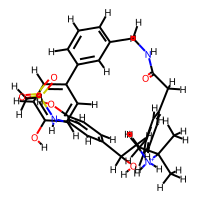
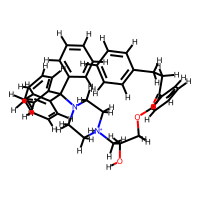
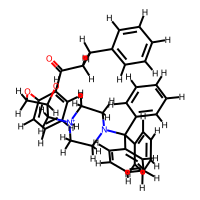
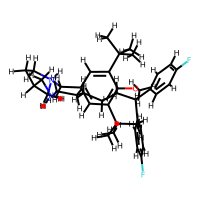
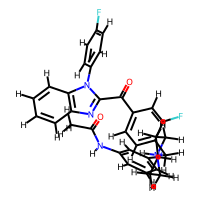
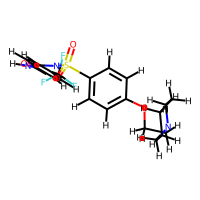
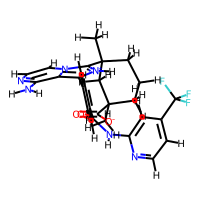
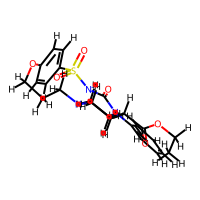
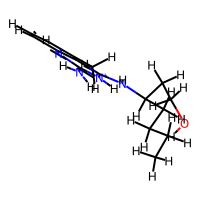
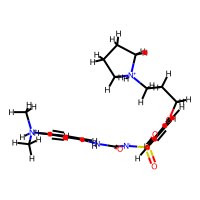

In [10]:
df = standardize_smiles(df1)
df

In [11]:
df_1 = df1.drop_duplicates(subset=['ID'])

In [12]:
dfr = df_1[['Mol', 'ID', 'i_canvas_class']]

Проверим, есть ли Астемизол

s_m_entry_id       s_m_entry_name                      s_m_Source_Path  \
631        20181  ligprep_herg-out.49  /opt/schrodinger2020-3/ligprep_herg   

          s_m_Source_File i_m_Source_File_Index s_canvas_standard\_relation  \
631  ligprep_herg-out.sdf                    49                           =   

    s_canvas_standard\_type s_canvas_standard\_units s_canvas_units  \
631                    IC50                       nM             nM   

    r_canvas_value r_canvas_MW r_canvas_value\_nM i_canvas_class  \
631            0.9     458.581                0.9              1   

       r_canvas_pIC50 i_lp_mmshare_version i_f3d_flags  \
631  9.04575749056067                51139           0   

                                          s_epik_input  \
631  W0NIM11PYzFbY0hdW2NIXWMoW2NIXVtjSF0xKVtDSDJdW0...   

                                        s_epik_cmdline  \
631  J2VwaWtfcHl0aG9uJywgJy1waCcsICc3LjAnLCAnLXRuJy...   

    r_epik_Ionization_Penalty r_epik_Ionization_Penalty_Charging  \
631                    0.4572                             0.0027   

    r_epik_Ionization_Penalty_Neutral r_epik_State_Penalty  \
631                            0.4545               0.5138   

    r_epik_Charging_Adjusted_Penalty i_epik_Tot_Q i_epik_Tot_abs_Q  \
631                         0.516553            1                1   

    s_lp_Force_Field r_lp_Energy b_lp_Chiralities_Consistent    s_lp_Variant  \
631           OPLS3e     43.0701                           1  CHEMBL296419-3   

    r_lp_tautomer_probability                    s_m_job_name  \
631                         1  glide-dock_SP_herg_dimer_RIGHT   

        s_i_glide_gridfile i_i_glide_lignum i_i_glide_rotatable_bonds  \
631  glide-grid_herg_dimer               49                         8   

     r_i_docking_score r_i_glide_ligand_efficiency  \
631  -7.43541769155922          -0.218688755634095   

    r_i_glide_ligand_efficiency_sa r_i_glide_ligand_efficiency_ln  \
631             -0.708466672726131               -1.6426923244674   

      r_i_glide_gscore    r_i_glide_lipo     r_i_glide_hbond r_i_glide_metal  \
631  -7.94921769155922  -3.8754769969627  -0.243771278151902               0   

      r_i_glide_rewards     r_i_glide_evdw    r_i_glide_ecoul  \
631  -0.602474215229506  -47.5810356140137  -9.72164249420166   

       r_i_glide_erotb      r_i_glide_esite   r_i_glide_emodel  \
631  0.666873983452008  -0.0570710298361859  -84.6379984708532   

      r_i_glide_energy r_i_glide_einternal i_i_glide_confnum  \
631  -57.3026781082153    1.33064305782318                36   

    i_i_glide_posenum r_i_glide_eff_state_penalty  \
631               359                      0.5138   

                     s_m_subgroup_title                      s_m_subgroupid  \
631  glide-dock_SP_herg_dimer_RIGHT_pv1  glide-dock_SP_herg_dimer_RIGHT_pv1   

    b_m_subgroup_collapsed            ID  \
631                      0  CHEMBL296419   

                                                   Mol s_epik_Chemistry_Notes  \
631  <img data-content="rdkit/molecule" src="data:i...                    NaN   

    i_m_ct_stereo_status                                             smiles  
631                  NaN  [H]c1c([H])c(C([H])([H])n2c(N([H])C3([H])C([H]...
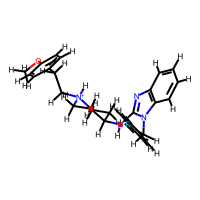

In [13]:
df_1.loc[df_1['ID'] == "CHEMBL296419"]

In [14]:
df_1.reset_index(drop=True, inplace=True)

Mol             ID  \
0      <img data-content="rdkit/molecule" src="data:i...  CHEMBL1240967   
1      <img data-content="rdkit/molecule" src="data:i...  CHEMBL3800381   
3      <img data-content="rdkit/molecule" src="data:i...  CHEMBL2032000   
4      <img data-content="rdkit/molecule" src="data:i...  CHEMBL3219269   
5      <img data-content="rdkit/molecule" src="data:i...  CHEMBL4439823   
...                                                  ...            ...   
18892  <img data-content="rdkit/molecule" src="data:i...  CHEMBL3183703   
18912  <img data-content="rdkit/molecule" src="data:i...  CHEMBL3218857   
18914  <img data-content="rdkit/molecule" src="data:i...  CHEMBL2021979   
18929  <img data-content="rdkit/molecule" src="data:i...  CHEMBL2043168   
18931  <img data-content="rdkit/molecule" src="data:i...  CHEMBL4638544   

      i_canvas_class  
0                  0  
1                  0  
3                  1  
4                  1  
5                  0  
...              ...  
18892              0  
18912              0  
18914              0  
18929              1  
18931              0  

[7715 rows x 3 columns]
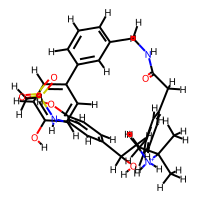
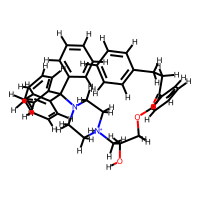
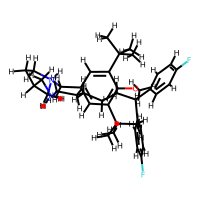
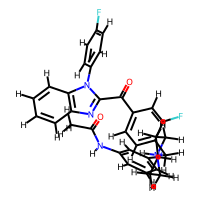
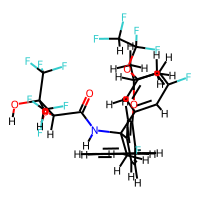
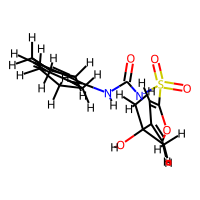
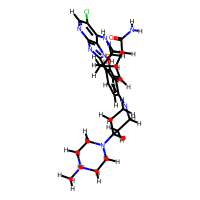
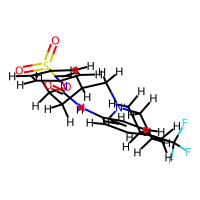
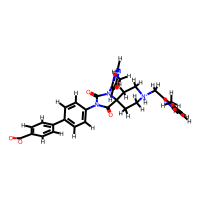
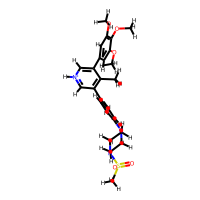

In [15]:
dfr

In [8]:
df1 = PandasTools.LoadSDF('herg_SP_no_dubles_dimer.sdf',molColName='Mol', removeHs=False, includeFingerprints=True)

In [24]:
PandasTools.WriteSDF(dfr, 'herg_SP_no_dubles_dimer.sdf', molColName='Mol', properties=list(dfr.columns))

In [ ]:
with Chem.PDBWriter(output_file) as writer:

ID i_canvas_class  \
228  CHEMBL2314063              0   

                                                   Mol  
228  <img data-content="rdkit/molecule" src="data:i...
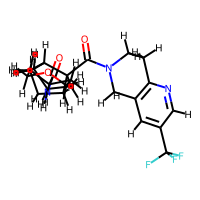

In [47]:
df1.iloc[[228]]

In [153]:
#! pip install prolif

In [ ]:
'herg_SP_no_dubles_ACS.sdf'

In [9]:
u = mda.Universe("herg_dimer_lig.pdb")

# create selections for the ligand and protein
ligand_selection = u.select_atoms("resname UNL")
protein_selection = u.select_atoms("protein")
ligand_selection, protein_selection

(<AtomGroup with 51 atoms>, <AtomGroup with 4943 atoms>)

In [10]:
ligand_mol = plf.Molecule.from_mda(ligand_selection)


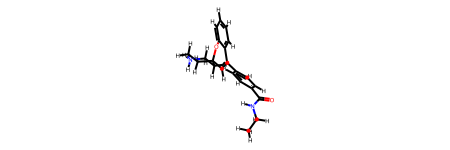

In [11]:
ligand_mol

In [12]:
protein_selection = u.select_atoms(
    "protein and byres around 20.0 group ligand", ligand=ligand_selection
)
protein_selection

<AtomGroup with 4420 atoms>

In [13]:
protein_mol = plf.Molecule.from_mda(protein_selection)


In [14]:
fp = plf.Fingerprint()

In [16]:
fp1 = fp.generate(ligand_mol, protein_mol)

In [14]:
fp.ifp


{(ResidueId(UNL, 1, None), ResidueId(THR, 623, D)): {'VdWContact': ({'indices': {'ligand': (11,), 'protein': (3,)}, 'parent_indices': {'ligand': (11,), 'protein': (4342,)}, 'distance': 3.192314215494919},)}, (ResidueId(UNL, 1, None), ResidueId(SER, 649, D)): {'VdWContact': ({'indices': {'ligand': (71,), 'protein': (7,)}, 'parent_indices': {'ligand': (71,), 'protein': (4725,)}, 'distance': 2.137390319267488},)}, (ResidueId(UNL, 1, None), ResidueId(SER, 624, A)): {'HBDonor': ({'indices': {'ligand': (9, 73), 'protein': (5,)}, 'parent_indices': {'ligand': (9, 73), 'protein': (651,)}, 'distance': 3.1242116628908225, 'DHA_angle': 150.62049618447207},), 'VdWContact': ({'indices': {'ligand': (73,), 'protein': (5,)}, 'parent_indices': {'ligand': (73,), 'protein': (651,)}, 'distance': 2.194043123833548},)}, (ResidueId(UNL, 1, None), ResidueId(GLY, 648, B)): {'VdWContact': ({'indices': {'ligand': (18,), 'protein': (5,)}, 'parent_indices': {'ligand': (18,), 'protein': (2244,)}, 'distance': 2.55342

In [6]:
prot1 = mda.Universe('/home/elly/Programming/GPCR_data/cache5/graphLambda/CACHE_Challenge/tmp_207.pdb', guess_bonds=True)

In [7]:
pmol = plf.Molecule.from_mda(prot1)
pmol.n_residues

299

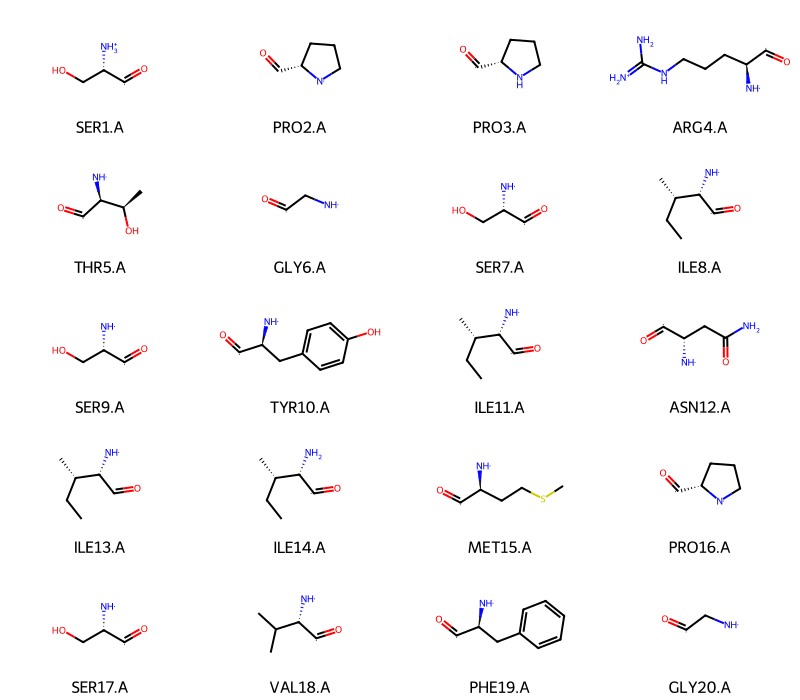

In [8]:
#pmol = plf.Molecule.from_mda(prot)
frags = []
# to show all residues, simply use `for res in pmol:`
for i in range(20):
    res = pmol[i]
    mol = Chem.RemoveHs(res)
    mol.RemoveAllConformers()
    frags.append(mol)
Draw.MolsToGridImage(frags,
                     legends=[str(res.resid) for res in pmol],
                     subImgSize=(200, 140),
                     molsPerRow=4,
                     maxMols=pmol.n_residues)

In [12]:
df1 = PandasTools.LoadSDF('/home/elly/Programming/GPCR_data/cache5/1M_filtered_poses_SMINA10_XGB_PROT.sdf',molColName='Mol', removeHs=False, sanitize = False, includeFingerprints=True)

In [36]:
df1 = PandasTools.LoadSDF('/home/elly/Programming/GPCR_data/cache5/graphLambda/CACHE_Challenge/CACHE_challnege/poses_inactive_ex8_KiIC50_dubls_PROT1.sdf',molColName='ROMol', removeHs=False, sanitize = True, includeFingerprints=True)

In [12]:
df1['Value_nM'][2164]

'2.2'

In [62]:
df1 = df1.reset_index(drop=True)

In [63]:
PandasTools.WriteSDF(df1, '/home/elly/Programming/GPCR_data/cache5/1M_filtered_poses_SMINA10_SANIT.sdf', molColName='ROMol', properties= list(df1.columns))

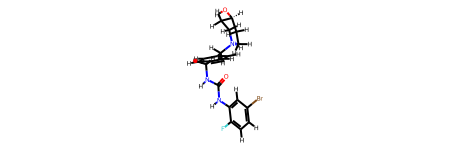

In [28]:
df1['ROMol'][50]

In [35]:
#path = str(plf.datafiles.datapath / "vina" / "herg_SP_no_dublesH.sdf")
lig_suppl = list(plf.sdf_supplier('/home/elly/Programming/GPCR_data/cache5/graphLambda/CACHE_Challenge/CACHE_challnege/poses_inactive_ex8_KiIC50_dubls_PROT1.sdf'))
# generate fingerprint
fp = plf.Fingerprint()
fp.run_from_iterable(lig_suppl, pmol)
df = fp.to_dataframe()
df

KeyboardInterrupt: 

In [66]:
df[df[('UNL1', 'ASP95.A', 'Cationic')] == True]

ligand             UNL1                                                \
protein         ILE11.A                MET15.A                PHE19.A   
interaction Hydrophobic VdWContact Hydrophobic VdWContact Hydrophobic   
Frame                                                                   
6                 False      False       False      False       False   
7                 False      False       False       True       False   
8                 False       True        True      False        True   
11                False      False        True      False       False   
15                False      False        True      False        True   
...                 ...        ...         ...        ...         ...   
2995              False      False       False      False       False   
3002              False      False       False       True       False   
3003              False      False       False      False       False   
3004              False      False       False      False       False   
3005              False      False       False      False       False   

ligand                                                                        \
protein                               VAL60.A                ASP61.A           
interaction PiStacking VdWContact Hydrophobic VdWContact Hydrophobic HBDonor   
Frame                                                                          
6                False      False       False      False       False   False   
7                False      False       False      False       False   False   
8                False      False       False      False       False   False   
11               False      False       False      False       False   False   
15               False       True       False      False       False   False   
...                ...        ...         ...        ...         ...     ...   
2995             False      False       False      False       False   False   
3002             False      False       False      False       False   False   
3003             False      False       False      False       False   False   
3004             False      False       False      False       False   False   
3005             False      False       False      False       False   False   

ligand                                                                   \
protein                             PHE64.A                               
interaction Cationic VdWContact Hydrophobic HBDonor CationPi PiStacking   
Frame                                                                     
6              False      False        True   False    False      False   
7              False      False       False   False    False      False   
8              False      False       False   False    False      False   
11             False      False       False   False    False      False   
15             False      False        True   False    False      False   
...              ...        ...         ...     ...      ...        ...   
2995           False      False       False   False    False      False   
3002           False      False       False   False    False      False   
3003           False      False       False   False    False      False   
3004           False      False       False   False    False      False   
3005           False      False        True   False    False       True   

ligand                                                                \
protein                   GLY67.A     MET68.A                MET71.A   
interaction VdWContact VdWContact Hydrophobic VdWContact Hydrophobic   
Frame                                                                  
6                False      False       False      False       False   
7                False      False       False      False        True   
8                False      False       False      False        True   
11               False      False       False      False        True   
1

In [12]:
frame_number = 1885
ligand_residue = "UNL1"
protein_residue = "TYR652.D"

In [13]:
fp.ifp[frame_number][(ligand_residue, protein_residue)]

{'CationPi': ({'indices': {'ligand': (14,), 'protein': (5, 6, 8, 10, 9, 7)},
   'parent_indices': {'ligand': (14,),
    'protein': (4770, 4771, 4773, 4775, 4774, 4772)},
   'distance': 4.288424551990876,
   'angle': 22.945923648278633},),
 'VdWContact': ({'indices': {'ligand': (37,), 'protein': (4,)},
   'parent_indices': {'ligand': (37,), 'protein': (4769,)},
   'distance': 2.769808969446474},)}

In [30]:
def to_normal_df(df):
    index = pd.MultiIndex.from_tuples(df.keys(), names=['ligand', 'protein', 'interaction'])
    df2 = pd.DataFrame(df, columns=index)
    df2.columns = ['.'.join(col[1:]) for col in df2.columns]
    return df2
#df.to_csv('IFPs_inactive_MCHR1.csv', index=False)

In [31]:
df2 = to_normal_df(df)

In [38]:
df2 = df2.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

In [39]:
df1.shape

(28592, 7)

In [40]:
df2.shape

(28592, 256)

In [41]:
df1.columns

Index(['Smiles', 'Standard_Type', 'Value_nM', 'Class', 'minimizedAffinity',
       'ID', 'ROMol'],
      dtype='object')

In [43]:
df2['Smiles'] = df1['Smiles']
df2['minimizedAffinity'] = df1['minimizedAffinity']
df2['Class'] = df1['Class']
df2['Standard_Type'] = df1['Standard_Type']
df2['Value_nM'] = df1['Value_nM']
df2['ROMol'] = df1['ROMol']

In [44]:
df2

TYR10.A.Hydrophobic  TYR10.A.VdWContact  ILE11.A.Hydrophobic  \
0                    False               False                False   
1                    False               False                False   
2                    False               False                False   
3                    False               False                False   
4                    False               False                False   
...                    ...                 ...                  ...   
28587                False               False                False   
28588                False               False                False   
28589                False               False                False   
28590                False               False                False   
28591                False               False                False   

       MET15.A.Hydrophobic  MET15.A.VdWContact  PRO16.A.Hydrophobic  \
0                    False               False                False   
1                     True                True                False   
2                    False               False                False   
3                    False               False                False   
4                    False               False                False   
...                    ...                 ...                  ...   
28587                False               False                False   
28588                False               False                False   
28589                False               False                False   
28590                 True                True                False   
28591                False               False                False   

       PRO16.A.VdWContact  PHE19.A.Hydrophobic  PHE19.A.PiStacking  \
0                   False                False               False   
1                   False                 True               False   
2                   False                False               False   
3                   False                 True               False   
4                   False                False               False   
...                   ...                  ...                 ...   
28587               False                False               False   
28588               False                False               False   
28589               False                False               False   
28590               False                 True               False   
28591               False                False               False   

       PHE19.A.VdWContact  ...  ASN279.A.HBDonor  ASN279.A.VdWContact  \
0                   False  ...             False                False   
1                    True  ...             False                False   
2                   False  ...             False                False   
3                    True  ...             False                False   
4                   False  ...             False                False   
...                   ...  ...               ...                  ...   
28587               False  ...             False                False   
28588               False  ...             False                False   
28589               False  ...             False                False   
28590                True  ...             False                False   
28591               False  ...             False                False   

       PRO280.A.Hydrophobic  PRO280.A.VdWContact  \
0                     False                False   
1                     False                False   
2                     False                False   
3                     False                False   
4                     False                False   
...                     ...                  ...   
28587                 False                False   
28588                 False                False   
28589                 False                False   
28590                 False                False   
28591      

In [71]:
df2['Smiles'] = df1['Smiles']
df2['idnumber'] = df1['idnumber']
df2['Type'] = df1['Type']
df2['pred_M1'] = df1['pred_M1']
df2['pred_bin_M1'] = df1['pred_bin_M1']
df2['pred_M2'] = df1['pred_M2']
df2['pred_bin_M2'] = df1['pred_bin_M2']
df2['pred_M3'] = df1['pred_M3']
df2['pred_bin_M3'] = df1['pred_bin_M3']
df2['ROMol'] = df1['ROMol']

KeyError: 'idnumber'

In [21]:
df2

MET15.A.Hydrophobic  MET15.A.VdWContact  PHE19.A.Hydrophobic  \
0                    True               False                 True   
1                   False               False                False   
2                    True               False                 True   
3                   False               False                False   
4                    True               False                 True   
...                   ...                 ...                  ...   
3001                False               False                 True   
3002                False               False                False   
3003                False               False                False   
3004                False               False                False   
3005                 True               False                 True   

      PHE19.A.PiStacking  PHE19.A.VdWContact  ASN30.A.VdWContact  \
0                  False                True               False   
1                  False               False               False   
2                  False                True               False   
3                  False               False               False   
4                  False                True               False   
...                  ...                 ...                 ...   
3001               False               False               False   
3002               False               False               False   
3003               False               False               False   
3004               False               False               False   
3005               False                True               False   

      LEU57.A.Hydrophobic  LEU57.A.VdWContact  VAL60.A.Hydrophobic  \
0                   False               False                False   
1                   False               False                False   
2                    True                True                False   
3                   False               False                False   
4                   False               False                False   
...                   ...                 ...                  ...   
3001                False               False                False   
3002                False               False                False   
3003                 True                True                False   
3004                False               False                False   
3005                False               False                False   

      VAL60.A.VdWContact  ...  ASN279.A.HBAcceptor  ASN279.A.VdWContact  \
0                  False  ...                False                False   
1                  False  ...                False                False   
2                  False  ...                False                False   
3                  False  ...                False                False   
4                  False  ...                False                False   
...                  ...  ...                  ...                  ...   
3001               False  ...                False                False   
3002               False  ...                False                False   
3003               False  ...                 True                 True   
3004               False  ...                False                False   
3005               False  ...                False                False   

      PRO280.A.Hydrophobic  PRO280.A.VdWContact  \
0                    False                False   
1                    False                False   
2                    False                False   
3                    False                False   
4                    False                False   
...                    ...                  ...   
3001                 False                False   
3002                 False                False   
3003                 False                False   
3004                 False                False   
3005                 False                Fal

In [43]:
df2

MET15.A.Hydrophobic  MET15.A.VdWContact  PHE19.A.Hydrophobic  \
0                     False               False                False   
1                     False               False                False   
2                     False               False                False   
3                     False               False                False   
4                     False               False                False   
...                     ...                 ...                  ...   
129357                False               False                False   
129358                False               False                False   
129359                False               False                False   
129360                False               False                False   
129361                False               False                False   

        PHE19.A.PiStacking  PHE19.A.VdWContact  LEU57.A.HBDonor  \
0                    False               False            False   
1                    False               False            False   
2                    False               False            False   
3                    False               False            False   
4                    False               False            False   
...                    ...                 ...              ...   
129357               False                True            False   
129358               False               False            False   
129359               False               False            False   
129360               False               False            False   
129361               False               False            False   

        LEU57.A.VdWContact  VAL60.A.Hydrophobic  VAL60.A.HBDonor  \
0                    False                False            False   
1                    False                False            False   
2                    False                False            False   
3                    False                False            False   
4                    False                False            False   
...                    ...                  ...              ...   
129357               False                False            False   
129358               False                False            False   
129359               False                False            False   
129360               False                False            False   
129361               False                False            False   

        VAL60.A.VdWContact  ...  \
0                    False  ...   
1                    False  ...   
2                    False  ...   
3                    False  ...   
4                    False  ...   
...                    ...  ...   
129357               False  ...   
129358               False  ...   
129359               False  ...   
129360               False  ...   
129361               False  ...   

                                                   Smiles         idnumber  \
0       CC1=CC=C(NC(=O)NCC(=O)NC2=CC=C(F)C(F)=C2)C=C1C...      Z1903665286   
1       CC1=CC=C(N2C=C(C)C=N2)C(NC(=O)NCC2=CC=C(CN3CCC...      Z1472476660   
2       CN(C(=O)C1=CC2=NC=C(O)N=C2C=C1)C1CCN(C(=O)C2=C...  PV-005693892242   
3       O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)N[C@@H]1CCCC2=...      Z1949567577   
4       CC1=CC(NC(=O)NCC2=CC=C(CN3CCC(O)CC3)C=C2)=CC(C...      Z1974729583   
...                                                   ...              ...   
129357  CC(C)OC1=CC=C(C(O)CNC(=O)NC2CCN(CC3=CC=C(F)C(F...      Z1218384518   
129358  CN(C)C(=O)C1=CC=C(NC2CCN(CC3=CC=CC(F)=C3)CC2)N=N1      Z5023170664   
129359  CC1CCN(C(CNC(=O)NC2=CC=C(F)C(C(=O)N(C)C)=C2)C(...      Z1370139201   
129360  CCN1CCC(N(C)C(=O)NC2=CC(C(C)SC3=NN=CN3C)=CC=C2...  PV-010006491934   
129361  CC1=C(CC(=O)N2CCC(N(C)C(=O)C3=CC=C4C(=O)CCC4=C...  PV-004908614437   

        Type   pred_M1  pred_bin_M1   pred_M2  pred_bin_M2   pred_M3  \
0          S  0.516455            1  0.186976            0  0.017381   
1          S  0.519

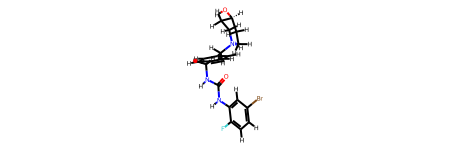

In [56]:
df2['ROMol'][50]

In [45]:
df2[df2['ROMol'].isnull()]

Empty DataFrame
Columns: [TYR10.A.Hydrophobic, TYR10.A.VdWContact, ILE11.A.Hydrophobic, MET15.A.Hydrophobic, MET15.A.VdWContact, PRO16.A.Hydrophobic, PRO16.A.VdWContact, PHE19.A.Hydrophobic, PHE19.A.PiStacking, PHE19.A.VdWContact, CYS23.A.Hydrophobic, CYS23.A.VdWContact, LEU25.A.Hydrophobic, LEU25.A.VdWContact, GLY26.A.VdWContact, ILE27.A.Hydrophobic, ILE27.A.VdWContact, GLY29.A.VdWContact, ASN30.A.Hydrophobic, ASN30.A.HBAcceptor, ASN30.A.HBDonor, ASN30.A.VdWContact, LEU57.A.Hydrophobic, LEU57.A.HBDonor, LEU57.A.VdWContact, SER58.A.VdWContact, VAL60.A.Hydrophobic, VAL60.A.HBDonor, VAL60.A.VdWContact, ASP61.A.Hydrophobic, ASP61.A.HBDonor, ASP61.A.Cationic, ASP61.A.VdWContact, LEU62.A.Hydrophobic, LEU62.A.VdWContact, LEU63.A.Hydrophobic, LEU63.A.HBDonor, LEU63.A.VdWContact, PHE64.A.Hydrophobic, PHE64.A.HBDonor, PHE64.A.CationPi, PHE64.A.PiStacking, PHE64.A.VdWContact, LEU65.A.Hydrophobic, LEU65.A.VdWContact, LEU66.A.Hydrophobic, LEU66.A.VdWContact, GLY67.A.VdWContact, MET68.A.Hydrophobic, MET68.A.HBDonor, MET68.A.VdWContact, PRO69.A.Hydrophobic, PRO69.A.VdWContact, PHE70.A.VdWContact, MET71.A.Hydrophobic, MET71.A.HBAcceptor, MET71.A.VdWContact, ILE72.A.Hydrophobic, ILE72.A.VdWContact, HID73.A.VdWContact, GLN74.A.Hydrophobic, GLN74.A.HBDonor, GLN74.A.VdWContact, LEU75.A.Hydrophobic, LEU75.A.VdWContact, MET76.A.Hydrophobic, MET76.A.VdWContact, TRP81.A.Hydrophobic, TRP81.A.VdWContact, GLU85.A.HBDonor, GLU85.A.VdWContact, CYS88.A.Hydrophobic, CYS88.A.VdWContact, THR89.A.Hydrophobic, THR89.A.HBDonor, THR89.A.VdWContact, ILE91.A.Hydrophobic, ILE91.A.HBDonor, ILE91.A.VdWContact, THR92.A.Hydrophobic, THR92.A.HBDonor, THR92.A.VdWContact, ALA93.A.Hydrophobic, ALA93.A.VdWContact, MET94.A.Hydrophobic, MET94.A.HBDonor, MET94.A.VdWContact, ASP95.A.Hydrophobic, ASP95.A.HBDonor, ASP95.A.Cationic, ASP95.A.VdWContact, ALA96.A.Hydrophobic, ALA96.A.HBDonor, ALA96.A.VdWContact, ASN97.A.Hydrophobic, ASN97.A.HBDonor, ASN97.A.VdWContact, SER98.A.HBDonor, SER98.A.VdWContact, GLN99.A.Hydrophobic, ...]
Index: []

[0 rows x 262 columns]

In [45]:
df1[df1['ROMol'].isnull()]

Empty DataFrame
Columns: [Smiles, idnumber, Type, pred_M1, pred_bin_M1, pred_M2, pred_bin_M2, pred_M3, pred_bin_M3, minimizedAffinity, ID, ROMol]
Index: []

In [80]:
df2

MET15.A.Hydrophobic  VAL60.A.Hydrophobic  PHE64.A.Hydrophobic  \
0                   False                False                False   
1                   False                False                False   
2                   False                False                 True   
3                   False                False                 True   
4                   False                False                 True   
...                   ...                  ...                  ...   
7264                False                False                 True   
7265                False                False                 True   
7266                False                False                False   
7267                False                False                False   
7268                False                False                False   

      PHE64.A.CationPi  PHE64.A.PiStacking  PHE64.A.VdWContact  \
0                False               False               False   
1                False               False               False   
2                False               False                True   
3                False               False               False   
4                False               False               False   
...                ...                 ...                 ...   
7264             False               False                True   
7265             False               False                True   
7266             False               False               False   
7267             False               False                True   
7268             False               False               False   

      GLN74.A.HBAcceptor  GLN74.A.HBDonor  GLN74.A.VdWContact  \
0                  False            False               False   
1                  False            False               False   
2                  False            False               False   
3                  False            False               False   
4                  False            False               False   
...                  ...              ...                 ...   
7264               False            False               False   
7265               False            False               False   
7266               False            False               False   
7267               False            False               False   
7268               False            False               False   

      LEU75.A.Hydrophobic  ...  \
0                   False  ...   
1                   False  ...   
2                   False  ...   
3                   False  ...   
4                   False  ...   
...                   ...  ...   
7264                False  ...   
7265                False  ...   
7266                False  ...   
7267                False  ...   
7268                False  ...   

                                                 Smiles         idnumber  \
0     O=C(NCC1=CC=C(CN2CCC(O)C2)C=C1)C1=CC(=O)C2=CC=...      Z2644055027   
1     CC1=CC=C(F)C(NC(=O)NCC2=CC=C(CN3CCC(O)CC3)C=C2...      Z1132085532   
2     O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)NC1=CC=C(F)C(C...      Z1132374407   
3     O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)NC1=CC=C(F)C(N...      Z1132254794   
4     O=C(CC1=CNNC1=O)NC1=CC=CC(C2CCN(CC3=CC=CC=C3)C...      Z4284562222   
...                                                 ...              ...   
7264  CCOC1=CC=C(NC(=O)NC2CCN(CC3=CC=C(F)C(F)=C3)CC2...       Z594665416   
7265  O=C(NC1CCN(CC2=CC=C(F)C(F)=C2)CC1)C1(N2CCCC2)CCC1      Z4287093509   
7266  CN(C)[C@@H]1CCN(CCNC(=O)NC2=CC=CC(C3CCOCC3)=C2)C1  PV-009847884931   
7267  N#CC1=CC(C2(NC(=O)C3=CC=C(CN4CCC(CO)CC4)C=C3)C...      Z1550289815   
7268  CC(C)OC1=CC=C(C(O)CNC(=O)NC2CCN(CC3=CC=C(F)C(F...      Z1218384518   

      Type   pred_M1  pred_bin_M1   pred_M2  pred_bin_M2   pred_M3  \
0        S  0.500773            1  0.529719            1  0.098555   
1        S  0.502072            1  0.516874            1  0.102685   
2        S  0.553606            1  0.675032    

In [46]:
PandasTools.WriteSDF(df2, '/home/elly/Programming/GPCR_data/cache5/30k_interactionFP_TRUE.sdf', molColName='ROMol', properties= list(df2.columns))

In [ ]:
mol = df1[df1['idnumber'] ==

In [ ]:
for atom in mol.GetAtoms():
    print(f"Atom {atom.GetIdx()} ({atom.GetSymbol()}): Formal Charge = {atom.GetFormalCharge()}")

In [7]:
df2 = PandasTools.LoadSDF('/home/elly/Programming/GPCR_data/cache5/129k_interactionFP_PROT.csv',molColName='ROMol', removeHs=False, includeFingerprints=True)

[23:20:15] ERROR: Cannot convert '0,0' to unsigned int on line 4
[23:20:15] ERROR: moving to the beginning of the next molecule


In [9]:
df_csv = pd.read_csv('/home/elly/Programming/GPCR_data/cache5/129k_interactionFP_PROT.csv')

In [15]:
df_csv['ROMol'] = df1['ROMol']

In [17]:
list(df_csv.columns)

['MET15.A.Hydrophobic',
 'MET15.A.VdWContact',
 'PHE19.A.Hydrophobic',
 'PHE19.A.PiStacking',
 'PHE19.A.VdWContact',
 'LEU57.A.HBDonor',
 'LEU57.A.VdWContact',
 'VAL60.A.Hydrophobic',
 'VAL60.A.HBDonor',
 'VAL60.A.VdWContact',
 'ASP61.A.Hydrophobic',
 'ASP61.A.HBDonor',
 'ASP61.A.VdWContact',
 'PHE64.A.Hydrophobic',
 'PHE64.A.HBDonor',
 'PHE64.A.PiStacking',
 'PHE64.A.VdWContact',
 'GLY67.A.VdWContact',
 'MET68.A.Hydrophobic',
 'MET68.A.VdWContact',
 'MET71.A.Hydrophobic',
 'MET71.A.VdWContact',
 'GLN74.A.HBDonor',
 'GLN74.A.VdWContact',
 'LEU75.A.Hydrophobic',
 'LEU75.A.VdWContact',
 'ILE91.A.VdWContact',
 'THR92.A.Hydrophobic',
 'THR92.A.HBDonor',
 'THR92.A.VdWContact',
 'ASP95.A.Hydrophobic',
 'ASP95.A.HBDonor',
 'ASP95.A.VdWContact',
 'ALA96.A.Hydrophobic',
 'ALA96.A.HBDonor',
 'ALA96.A.VdWContact',
 'SER98.A.HBDonor',
 'SER98.A.VdWContact',
 'GLN99.A.Hydrophobic',
 'GLN99.A.HBDonor',
 'GLN99.A.VdWContact',
 'PHE100.A.Hydrophobic',
 'PHE100.A.VdWContact',
 'SER102.A.HBAcceptor',
 '

In [80]:
df2

ILE11.A.Hydrophobic  ILE11.A.VdWContact  MET15.A.Hydrophobic  \
0                   False               False                False   
1                   False               False                False   
2                   False               False                False   
3                   False               False                False   
4                   False               False                False   
...                   ...                 ...                  ...   
3001                False               False                False   
3002                False               False                False   
3003                False               False                False   
3004                False               False                False   
3005                False               False                False   

      MET15.A.VdWContact  PHE19.A.Hydrophobic  PHE19.A.PiStacking  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                  False                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002                True                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      PHE19.A.VdWContact  VAL60.A.Hydrophobic  VAL60.A.VdWContact  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                   True                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002               False                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      ASP61.A.Hydrophobic  ASP61.A.HBDonor  ASP61.A.Cationic  \
0                   False            False             False   
1                   False            False              True   
2                   False            False             False   
3                   False            False             False   
4                   False            False             False   
...                   ...              ...               ...   
3001                False            False             False   
3002                False            False             False   
3003                False            False             False   
3004                False            False             False   
3005                False            False             False   

      ASP61.A.VdWContact  PHE64.A.Hydrophobic  PHE64.A.HBDonor  \
0                  False                 True            False   
1                   True                False            False   
2                  False                False            False   
3                   True                 True            False   
4                  False                False            False   
...                  ...                  ...              ...   
3001               False                False            False   
3002               False                False            False   
3003               False                False            False   
3004               False                False            False   
3005        

In [47]:
def filter(df):
    mask = (
        (
            (df['ASP95.A.HBDonor'] == 1) |
            (df['ASP95.A.Cationic'] == 1)
        ) & (
            (df['PHE19.A.Hydrophobic'] == 1) |
            (df['PHE19.A.PiStacking'] == 1) |
            (df['MET71.A.Hydrophobic'] == 1)
        ) &
        (df['TRP241.A.HBAcceptor'] == 1)
    )
    res = df[mask]
    return res

In [48]:
res = filter(df2)

In [49]:
res

TYR10.A.Hydrophobic  TYR10.A.VdWContact  ILE11.A.Hydrophobic  \
33                   False               False                False   
64                   False               False                False   
299                  False               False                False   
782                  False               False                False   
1097                 False               False                False   
1767                 False               False                False   
1891                 False               False                False   
1997                 False               False                False   
2261                 False               False                False   
2335                 False               False                False   
2408                 False               False                False   
2438                 False               False                False   
2445                 False               False                False   
2457                 False               False                False   
3704                 False               False                False   
4510                 False               False                False   
4925                 False               False                False   
5555                 False               False                False   
5908                 False               False                False   
6590                 False               False                False   
7317                 False               False                False   
7714                 False               False                False   
8009                 False               False                False   
8305                 False               False                False   
9310                 False               False                False   
9992                 False               False                False   
12106                False               False                False   
13348                False               False                False   
13997                False               False                False   
14379                False               False                False   
14387                False               False                False   
14741                False               False                False   
14832                False               False                False   
14969                False               False                False   
15251                False               False                False   
16075                False               False                False   
16762                False               False                False   
16795                False               False                False   
16896                False               False                False   
17554                False               False                False   
18323                False               False                False   
20006                False               False                False   
20084                False               False                False   
22484                False               False                False   
23298                False               False                False   
23582                False               False                False   
23961                False               False                False   
24422                False               False                False   
24567                False               False                False   
24788                False               False                False   
25715                False               False                False   
25879                False               False                False   
25925                False               False                False   
26504                False               False                False   
27412                False               False                False   
28213                False     

In [26]:
res

MET15.A.Hydrophobic  MET15.A.VdWContact  PHE19.A.Hydrophobic  \
20                   True                True                 True   
82                  False               False                False   
87                   True                True                 True   
106                 False               False                False   
115                  True               False                 True   
...                   ...                 ...                  ...   
2784                 True                True                False   
2903                 True               False                 True   
2963                 True                True                 True   
2967                 True                True                 True   
3001                False               False                 True   

      PHE19.A.PiStacking  PHE19.A.VdWContact  ASN30.A.VdWContact  \
20                 False                True               False   
82                 False               False               False   
87                 False                True               False   
106                False               False               False   
115                False                True               False   
...                  ...                 ...                 ...   
2784               False               False               False   
2903               False                True               False   
2963               False                True               False   
2967               False                True               False   
3001               False               False               False   

      LEU57.A.Hydrophobic  LEU57.A.VdWContact  VAL60.A.Hydrophobic  \
20                  False               False                False   
82                  False               False                False   
87                  False               False                 True   
106                 False               False                 True   
115                 False               False                 True   
...                   ...                 ...                  ...   
2784                False               False                False   
2903                False               False                 True   
2963                False               False                 True   
2967                False               False                 True   
3001                False               False                False   

      VAL60.A.VdWContact  ...  ASN279.A.HBAcceptor  ASN279.A.VdWContact  \
20                 False  ...                False                False   
82                 False  ...                False                False   
87                 False  ...                False                False   
106                False  ...                False                False   
115                False  ...                False                False   
...                  ...  ...                  ...                  ...   
2784               False  ...                False                False   
2903               False  ...                False                False   
2963               False  ...                False                False   
2967                True  ...                False                False   
3001               False  ...                False                False   

      PRO280.A.Hydrophobic  PRO280.A.VdWContact  \
20                   False                False   
82                   False                False   
87                   False                False   
106                  False                False   
115                  False                False   
...                    ...                  ...   
2784                 False                False   
2903                 False                False   
2963                 False                False   
2967                 False                False   
3001                 False                Fal

In [50]:
PandasTools.WriteSDF(res, '/home/elly/Programming/GPCR_data/cache5/30k_interactionFP_MASK_ASP_PHE_TRP.sdf', molColName='ROMol', properties= list(res.columns))

In [86]:
act = PandasTools.LoadSDF('/home/elly/Programming/GPCR_data/cache5/3k_interactionFP_MASK_ASP_PHE_TRP.sdf',molColName='ROMol', removeHs=False, includeFingerprints=True)

In [87]:
inact = PandasTools.LoadSDF('/home/elly/Programming/GPCR_data/cache5/30k_interactionFP_MASK_ASP_PHE_TRP.sdf',molColName='ROMol', removeHs=False, includeFingerprints=True)

In [91]:
def correct_typisation(df):
    df['Class'] = df['Class'].astype(int)
    df['minimizedAffinity'] = df['minimizedAffinity'].astype(float)
    converted = pd.to_numeric(df['Value_nM'], errors='coerce')
    df['Value_nM'] = df['Value_nM'].where(converted.isna(), converted)
    columns_to_modify = df.columns[:-7]
    for col in columns_to_modify:
        df[col] = df[col] == 'True'
    return df

In [92]:
act = correct_typisation(act)

In [93]:
inact = correct_typisation(inact)

In [95]:
act = act[act.columns.intersection(inact.columns)]

In [98]:
inact = inact[inact.columns.intersection(act.columns)]

In [100]:
res = pd.concat([act, inact])

In [107]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import average_precision_score

In [108]:
res['y_score_smina'] = -res['minimizedAffinity']
scaler = StandardScaler()
res['y_score_smina'] = scaler.fit_transform(res[['y_score_smina']])

In [109]:
y_true = res['Class']
y_scores = res['y_score_smina']
average_precision_score(y_true, y_scores)

0.8874112725692025

In [110]:
def calculate_hit_rate(df, column_class, column_y):
    first100 = df.sort_values(by=column_y, ascending = False).head(100)
    active = first100[first100[column_class] == 1]
    hit_rate = len(active)/len(first100)
    return hit_rate

In [111]:
HR_smina = calculate_hit_rate(res, 'Class', 'y_score_smina')

In [112]:
HR_smina

0.77

# SMINA calibration

In [113]:
thresholds_smina =[]
n = -6
while n != -13:
    thresholds_smina.append(n)
    n -=1

In [114]:
data_dict = {}
for thr in thresholds_smina:
    res_smina = res[res['minimizedAffinity'] <= thr]
    y_true = res_smina['Class']
    y_scores = res_smina['y_score_smina']
    AP = average_precision_score(y_true, y_scores)
    data_dict[thr] = AP

In [115]:
data_dict

{-6: 0.8906391376814982,
 -7: 0.8906391376814982,
 -8: 0.8906391376814979,
 -9: 0.8954562501259429,
 -10: 0.9036113278257456,
 -11: 0.9378675009904718,
 -12: 1.0}

MET15.A.Hydrophobic  MET15.A.VdWContact  PHE19.A.Hydrophobic  \
0                 False               False                False   
1                 False               False                False   
2                 False               False                False   
3                 False               False                False   
4                 False               False                False   
..                  ...                 ...                  ...   
77                False               False                False   
78                False               False                False   
79                False               False                False   
80                False               False                False   
81                False               False                False   

    PHE19.A.PiStacking  PHE19.A.VdWContact  ASN30.A.VdWContact  \
0                False               False               False   
1                False               False               False   
2                False               False               False   
3                False               False               False   
4                False               False               False   
..                 ...                 ...                 ...   
77               False               False               False   
78               False               False               False   
79               False               False               False   
80               False               False               False   
81               False               False               False   

    LEU57.A.Hydrophobic  LEU57.A.VdWContact  VAL60.A.Hydrophobic  \
0                 False               False                False   
1                 False               False                False   
2                 False               False                False   
3                 False               False                False   
4                 False               False                False   
..                  ...                 ...                  ...   
77                False               False                False   
78                False               False                False   
79                False               False                False   
80                False               False                False   
81                False               False                False   

    VAL60.A.VdWContact  ...  ASN279.A.VdWContact  PRO280.A.Hydrophobic  \
0                False  ...                False                 False   
1                False  ...                False                 False   
2                False  ...                False                 False   
3                False  ...                False                 False   
4                False  ...                False                 False   
..                 ...  ...                  ...                   ...   
77               False  ...                False                 False   
78               False  ...                False                 False   
79               False  ...                False                 False   
80               False  ...                False                 False   
81               False  ...                False                 False   

    PRO280.A.VdWContact                                             Smiles  \
0                 False  CC(C)C(=O)Nc1cccc(C2CCN(CCCNC(=O)C(c3ccccc3)c3...   
1                 False        CC(=O)Nc1cccc(C2CCN(CCCC(=O)c3ccccc3)CC2)c1   
2                 False  Cc1ccc(NC(=O)C(C)C)cc1C1CCN(CCCNC(=O)C2(c3ccc(...   
3                 False  COc1ccc(Oc2cccc(CN3CCC(c4cccc(NC(=O)C(C)C)c4)C...   
4                 False  Cc1ccc(NC(=O)C(C)C)cc1C1CCN(CCCNC(=O)[C@@H](C)...   
..                  ...                                                ...   
77                False  CC1(C)CCN(Cc2ccc3c(c2)C[C@H](NC(=O)c2ccc(OC[C@...   
78                False  Cc1ccc(NC(=O)C(C)C)cc1C1CCN(CCCNC(=O)[C
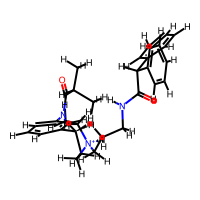
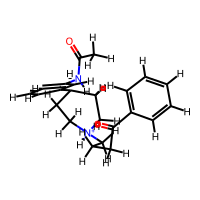
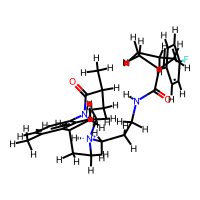
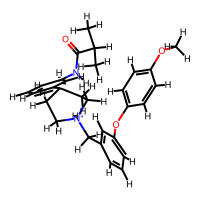
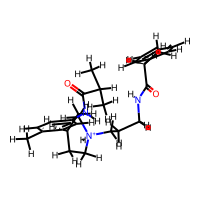
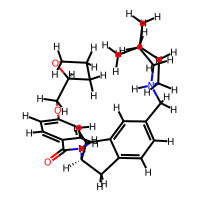
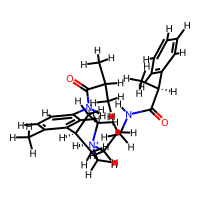
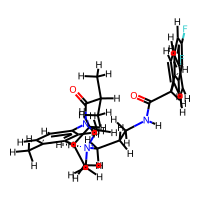
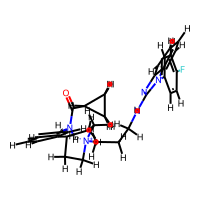
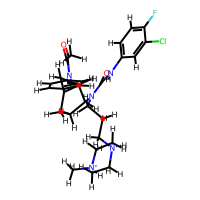

In [83]:
res1

In [24]:
mask = (
    (df_csv['ASP95.A.HBDonor'] == 1) &
    ((df_csv['PHE19.A.Hydrophobic'] == 1) | (df_csv['PHE19.A.PiStacking'] == 1)) | (df_csv['MET71.A.Hydrophobic'] == 1) &
    (df_csv['TRP241.A.HBAcceptor'] == 1)
)

In [22]:
df_csv['minimizedAffinity'] = df1['minimizedAffinity']

Smiles         idnumber  \
0       CC1=CC=C(NC(=O)NCC(=O)NC2=CC=C(F)C(F)=C2)C=C1C...      Z1903665286   
1       CC1=CC=C(N2C=C(C)C=N2)C(NC(=O)NCC2=CC=C(CN3CCC...      Z1472476660   
2       CN(C(=O)C1=CC2=NC=C(O)N=C2C=C1)C1CCN(C(=O)C2=C...  PV-005693892242   
3       O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)N[C@@H]1CCCC2=...      Z1949567577   
4       CC1=CC(NC(=O)NCC2=CC=C(CN3CCC(O)CC3)C=C2)=CC(C...      Z1974729583   
...                                                   ...              ...   
129357  CC(C)OC1=CC=C(C(O)CNC(=O)NC2CCN(CC3=CC=C(F)C(F...      Z1218384518   
129358  CN(C)C(=O)C1=CC=C(NC2CCN(CC3=CC=CC(F)=C3)CC2)N=N1      Z5023170664   
129359  CC1CCN(C(CNC(=O)NC2=CC=C(F)C(C(=O)N(C)C)=C2)C(...      Z1370139201   
129360  CCN1CCC(N(C)C(=O)NC2=CC(C(C)SC3=NN=CN3C)=CC=C2...  PV-010006491934   
129361  CC1=C(CC(=O)N2CCC(N(C)C(=O)C3=CC=C4C(=O)CCC4=C...  PV-004908614437   

       Type   pred_M1 pred_bin_M1   pred_M2 pred_bin_M2   pred_M3 pred_bin_M3  \
0         S  0.516455           1  0.186976           0  0.017381           0   
1         S  0.519714           1  0.400526           0  0.086451           0   
2         M  0.299125           0  0.403447           0  0.101495           1   
3         M  0.617108           1  0.438914           0  0.071115           0   
4         S  0.396532           0  0.517992           1  0.046813           0   
...     ...       ...         ...       ...         ...       ...         ...   
129357    S  0.547775           1  0.569497           1  0.154868           1   
129358    S  0.552777           1  0.382742           0  0.036551           0   
129359    S  0.559878           1  0.353686           0  0.072025           0   
129360    M   0.42253           0  0.460427           0  0.107156           1   
129361    M  0.260254           0  0.369562           0  0.124036           1   

       minimizedAffinity ID                                             ROMol  
0              -13.03641     <rdkit.Chem.rdchem.Mol object at 0x76d242f5ae30>  
1              -12.93793     <rdkit.Chem.rdchem.Mol object at 0x76d242f5a960>  
2               -12.8629     <rdkit.Chem.rdchem.Mol object at 0x76d242f5bae0>  
3               -12.8481     <rdkit.Chem.rdchem.Mol object at 0x76d242f5a810>  
4               -12.8351     <rdkit.Chem.rdchem.Mol object at 0x76d242f5a6c0>  
...                  ... ..                                               ...  
129357         -10.00001     <rdkit.Chem.rdchem.Mol object at 0x76d22b68a340>  
129358         -10.00001     <rdkit.Chem.rdchem.Mol object at 0x76d22b68a490>  
129359         -10.00001     <rdkit.Chem.rdchem.Mol object at 0x76d22b68a5e0>  
129360             -10.0     <rdkit.Chem.rdchem.Mol object at 0x76d22b68a730>  
129361             -10.0     <rdkit.Chem.rdchem.Mol object at 0x76d22b68a880>  

[129362 rows x 12 columns]
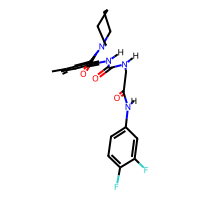
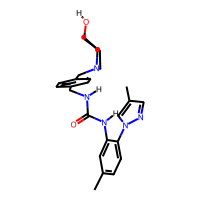
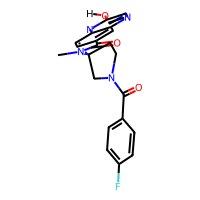
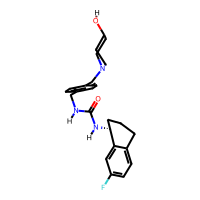
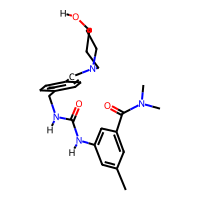
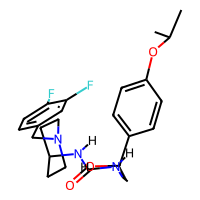
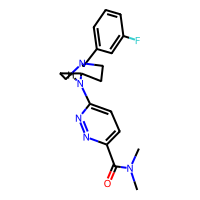
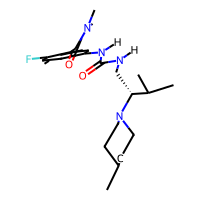
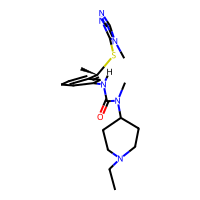
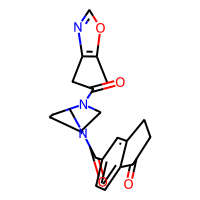

In [25]:
df1

In [28]:
res1 = df_csv[mask]

In [107]:
PandasTools.WriteSDF(df2, '/home/elly/Programming/GPCR_data/cache5/3k_interactionFP_Correct.sdf', molColName='ROMol', properties= list(df2.columns))

In [108]:
df2

ILE11.A.Hydrophobic  ILE11.A.VdWContact  MET15.A.Hydrophobic  \
0                   False               False                False   
1                   False               False                False   
2                   False               False                False   
3                   False               False                False   
4                   False               False                False   
...                   ...                 ...                  ...   
3001                False               False                False   
3002                False               False                False   
3003                False               False                False   
3004                False               False                False   
3005                False               False                False   

      MET15.A.VdWContact  PHE19.A.Hydrophobic  PHE19.A.PiStacking  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                  False                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002                True                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      PHE19.A.VdWContact  VAL60.A.Hydrophobic  VAL60.A.VdWContact  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                   True                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002               False                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      ASP61.A.Hydrophobic  ASP61.A.HBDonor  ASP61.A.Cationic  \
0                   False            False             False   
1                   False            False              True   
2                   False            False             False   
3                   False            False             False   
4                   False            False             False   
...                   ...              ...               ...   
3001                False            False             False   
3002                False            False             False   
3003                False            False             False   
3004                False            False             False   
3005                False            False             False   

      ASP61.A.VdWContact  PHE64.A.Hydrophobic  PHE64.A.HBDonor  \
0                  False                 True            False   
1                   True                False            False   
2                  False                False            False   
3                   True                 True            False   
4                  False                False            False   
...                  ...                  ...              ...   
3001               False                False            False   
3002               False                False            False   
3003               False                False            False   
3004               False                False            False   
3005        

In [30]:
PandasTools.WriteSDF(df_csv, '/home/elly/Programming/GPCR_data/cache5/129k_interactionFP_PROT.sdf', molColName='ROMol', properties= list(df_csv.columns))

In [34]:
mol = df1[df1['idnumber'] == 'Z1556293470']['ROMol'][576]

In [37]:
mol1 = Chem.MolFromSmiles(df1[df1['idnumber'] == 'Z1556293470']['Smiles'][576])

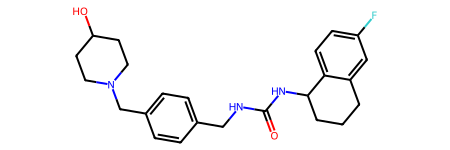

In [38]:
mol1

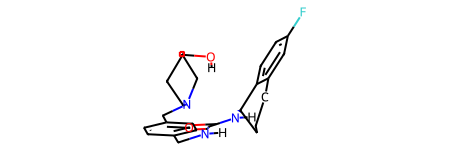

In [39]:
mol

In [35]:
for atom in mol.GetAtoms():
    print(f"Atom {atom.GetIdx()} ({atom.GetSymbol()}): Formal Charge = {atom.GetFormalCharge()}")

Atom 0 (O): Formal Charge = 0
Atom 1 (C): Formal Charge = 0
Atom 2 (N): Formal Charge = 0
Atom 3 (N): Formal Charge = 0
Atom 4 (H): Formal Charge = 0
Atom 5 (H): Formal Charge = 0
Atom 6 (C): Formal Charge = 0
Atom 7 (C): Formal Charge = 0
Atom 8 (C): Formal Charge = 0
Atom 9 (C): Formal Charge = 0
Atom 10 (C): Formal Charge = 0
Atom 11 (C): Formal Charge = 0
Atom 12 (C): Formal Charge = 0
Atom 13 (F): Formal Charge = 0
Atom 14 (C): Formal Charge = 0
Atom 15 (C): Formal Charge = 0
Atom 16 (C): Formal Charge = 0
Atom 17 (C): Formal Charge = 0
Atom 18 (C): Formal Charge = 0
Atom 19 (C): Formal Charge = 0
Atom 20 (C): Formal Charge = 0
Atom 21 (C): Formal Charge = 0
Atom 22 (C): Formal Charge = 0
Atom 23 (C): Formal Charge = 0
Atom 24 (C): Formal Charge = 0
Atom 25 (N): Formal Charge = 0
Atom 26 (C): Formal Charge = 0
Atom 27 (C): Formal Charge = 0
Atom 28 (C): Formal Charge = 0
Atom 29 (O): Formal Charge = 0
Atom 30 (C): Formal Charge = 0
Atom 31 (C): Formal Charge = 0
Atom 32 (H): Forma

In [79]:
type(df3['ASP95.A.HBDonor'][0])

str

MET15.A.Hydrophobic  VAL60.A.Hydrophobic  PHE64.A.Hydrophobic  \
0                    True                 True                 True   
1                    True                 True                 True   
2                    True                 True                 True   
3                    True                 True                 True   
4                    True                 True                 True   
...                   ...                  ...                  ...   
7264                 True                 True                 True   
7265                 True                 True                 True   
7266                 True                 True                 True   
7267                 True                 True                 True   
7268                 True                 True                 True   

      PHE64.A.CationPi  PHE64.A.PiStacking  PHE64.A.VdWContact  \
0                 True                True                True   
1                 True                True                True   
2                 True                True                True   
3                 True                True                True   
4                 True                True                True   
...                ...                 ...                 ...   
7264              True                True                True   
7265              True                True                True   
7266              True                True                True   
7267              True                True                True   
7268              True                True                True   

      GLN74.A.HBAcceptor  GLN74.A.HBDonor  GLN74.A.VdWContact  \
0                   True             True                True   
1                   True             True                True   
2                   True             True                True   
3                   True             True                True   
4                   True             True                True   
...                  ...              ...                 ...   
7264                True             True                True   
7265                True             True                True   
7266                True             True                True   
7267                True             True                True   
7268                True             True                True   

      LEU75.A.Hydrophobic  ...  ASN275.A.VdWContact  \
0                    True  ...                 True   
1                    True  ...                 True   
2                    True  ...                 True   
3                    True  ...                 True   
4                    True  ...                 True   
...                   ...  ...                  ...   
7264                 True  ...                 True   
7265                 True  ...                 True   
7266                 True  ...                 True   
7267                 True  ...                 True   
7268                 True  ...                 True   

                                                 Smiles         idnumber  \
0     O=C(NCC1=CC=C(CN2CCC(O)C2)C=C1)C1=CC(=O)C2=CC=...      Z2644055027   
1     CC1=CC=C(F)C(NC(=O)NCC2=CC=C(CN3CCC(O)CC3)C=C2...      Z1132085532   
2     O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)NC1=CC=C(F)C(C...      Z1132374407   
3     O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)NC1=CC=C(F)C(N...      Z1132254794   
4     O=C(CC1=CNNC1=O)NC1=CC=CC(C2CCN(CC3=CC=CC=C3)C...      Z4284562222   
...                                                 ...              ...   
7264  CCOC1=CC=C(NC(=O)NC2CCN(CC3=CC=C(F)C(F)=C3)CC2...       Z594665416   
7265  O=C(NC1CCN(CC2=CC=C(F)C(F)=C2)CC1)C1(N2CCCC2)CCC1      Z4287093509   
7266  CN(C)[C@@H]1CCN(CCNC(=O)NC2=CC=CC(C3CCOCC3)=C2)C1  PV-009847884931   
7267  N#CC1=CC(C2(NC(=O)C3=CC=C(CN4CCC(CO)CC4)C=C3)C...      Z1550289815   
7268  CC(C)OC1=CC=C(C(O)CNC(=O)NC2CCN(CC3=CC=C(F)C(F...      Z1218384518   

     

In [39]:
set = pd.concat([df2, df1], axis = 1, ignore_index=False)

In [102]:
df3['minimizedAffinity'] = df1['minimizedAffinity']

In [104]:
df_csv['minimizedAffinity'] = df1['minimizedAffinity']

In [50]:
df_csv = df2.drop(columns=['ROMol'])

In [51]:
df_csv

MET15.A.Hydrophobic  MET15.A.VdWContact  PHE19.A.Hydrophobic  \
0                         0                   0                    0   
1                         0                   0                    0   
2                         0                   0                    0   
3                         0                   0                    0   
4                         0                   0                    0   
...                     ...                 ...                  ...   
129357                    0                   0                    0   
129358                    0                   0                    0   
129359                    0                   0                    0   
129360                    0                   0                    0   
129361                    0                   0                    0   

        PHE19.A.PiStacking  PHE19.A.VdWContact  LEU57.A.HBDonor  \
0                        0                   0                0   
1                        0                   0                0   
2                        0                   0                0   
3                        0                   0                0   
4                        0                   0                0   
...                    ...                 ...              ...   
129357                   0                   1                0   
129358                   0                   0                0   
129359                   0                   0                0   
129360                   0                   0                0   
129361                   0                   0                0   

        LEU57.A.VdWContact  VAL60.A.Hydrophobic  VAL60.A.HBDonor  \
0                        0                    0                0   
1                        0                    0                0   
2                        0                    0                0   
3                        0                    0                0   
4                        0                    0                0   
...                    ...                  ...              ...   
129357                   0                    0                0   
129358                   0                    0                0   
129359                   0                    0                0   
129360                   0                    0                0   
129361                   0                    0                0   

        VAL60.A.VdWContact  ...  ASN279.A.VdWContact  \
0                        0  ...                    0   
1                        0  ...                    0   
2                        0  ...                    0   
3                        0  ...                    0   
4                        0  ...                    0   
...                    ...  ...                  ...   
129357                   0  ...                    0   
129358                   0  ...                    0   
129359                   0  ...                    0   
129360                   0  ...                    0   
129361                   0  ...                    0   

                                                   Smiles         idnumber  \
0       CC1=CC=C(NC(=O)NCC(=O)NC2=CC=C(F)C(F)=C2)C=C1C...      Z1903665286   
1       CC1=CC=C(N2C=C(C)C=N2)C(NC(=O)NCC2=CC=C(CN3CCC...      Z1472476660   
2       CN(C(=O)C1=CC2=NC=C(O)N=C2C=C1)C1CCN(C(=O)C2=C...  PV-005693892242   
3       O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)N[C@@H]1CCCC2=...      Z1949567577   
4       CC1=CC(NC(=O)NCC2=CC=C(CN3CCC(O)CC3)C=C2)=CC(C...      Z1974729583   
...                                                   ...              ...   
129357  CC(C)OC1=CC=C(C(O)CNC(=O)NC2CCN(CC3=CC=C(F)C(F...      Z1218384518   
129358  CN(C)C(=O)C1=CC=C(NC2CCN(CC3=CC=CC(F)=C3)CC2)N=N1      Z5023170664   
129359  CC1CCN(C(CNC(=O)NC2=CC=C(F)C(C(=O)N(C)C)=C2)C(...      Z1370139201   
129360  CCN1CCC(N(C)C(=O)NC2=CC(C(C)SC3=NN=CN3C)=CC=C2...  PV-010006

In [52]:
df_csv.to_csv('/home/elly/Programming/GPCR_data/cache5/129k_interactionFP.csv', index = False)

In [46]:
def convert_to_int(col):
    col = col.replace({'True': 1, 'False': 0})
    return col.astype(int)

In [2]:
df2[df2.columns[:-10]] = df2[df2.columns[:-10]].apply(convert_to_int)

NameError: name 'df2' is not defined

In [53]:
mask = (
    ((df2['ASP95.A.HBDonor'] == 1) | (df2['ASP95.A.Cationic'] == 1))&
    ((df2['PHE19.A.Hydrophobic'] == 1) | (df2['PHE19.A.PiStacking'] == 1)) | (df2['MET71.A.Hydrophobic'] == 1) &
    (df2['TRP241.A.HBAcceptor'] == 1)
)

KeyError: 'ASP95.A.Cationic'

In [55]:
list(df2.columns)

['MET15.A.Hydrophobic',
 'MET15.A.VdWContact',
 'PHE19.A.Hydrophobic',
 'PHE19.A.PiStacking',
 'PHE19.A.VdWContact',
 'LEU57.A.HBDonor',
 'LEU57.A.VdWContact',
 'VAL60.A.Hydrophobic',
 'VAL60.A.HBDonor',
 'VAL60.A.VdWContact',
 'ASP61.A.Hydrophobic',
 'ASP61.A.HBDonor',
 'ASP61.A.VdWContact',
 'PHE64.A.Hydrophobic',
 'PHE64.A.HBDonor',
 'PHE64.A.PiStacking',
 'PHE64.A.VdWContact',
 'GLY67.A.VdWContact',
 'MET68.A.Hydrophobic',
 'MET68.A.VdWContact',
 'MET71.A.Hydrophobic',
 'MET71.A.VdWContact',
 'GLN74.A.HBDonor',
 'GLN74.A.VdWContact',
 'LEU75.A.Hydrophobic',
 'LEU75.A.VdWContact',
 'ILE91.A.VdWContact',
 'THR92.A.Hydrophobic',
 'THR92.A.HBDonor',
 'THR92.A.VdWContact',
 'ASP95.A.Hydrophobic',
 'ASP95.A.HBDonor',
 'ASP95.A.VdWContact',
 'ALA96.A.Hydrophobic',
 'ALA96.A.HBDonor',
 'ALA96.A.VdWContact',
 'SER98.A.HBDonor',
 'SER98.A.VdWContact',
 'GLN99.A.Hydrophobic',
 'GLN99.A.HBDonor',
 'GLN99.A.VdWContact',
 'PHE100.A.Hydrophobic',
 'PHE100.A.VdWContact',
 'SER102.A.HBAcceptor',
 '

In [161]:
res1 = df3[mask]

In [162]:
res1

MET15.A.Hydrophobic  VAL60.A.Hydrophobic  PHE64.A.Hydrophobic  \
35                      0                    0                    1   
52                      0                    0                    1   
69                      0                    0                    1   
85                      0                    0                    1   
124                     0                    0                    1   
326                     0                    0                    1   
351                     0                    0                    1   
446                     0                    0                    1   
495                     0                    0                    1   
505                     0                    0                    1   
516                     0                    0                    1   
543                     0                    0                    0   
616                     0                    0                    1   
631                     0                    0                    1   
794                     0                    0                    1   
866                     0                    0                    1   
899                     0                    0                    1   
1098                    0                    0                    1   
1294                    0                    0                    1   
1358                    0                    0                    1   
1480                    0                    0                    1   
1548                    0                    0                    1   
1597                    0                    0                    1   
1813                    0                    0                    1   
1837                    0                    0                    1   
2007                    0                    0                    1   
2156                    0                    0                    1   
2404                    0                    0                    1   
2439                    0                    0                    1   
2838                    0                    0                    1   
2845                    0                    0                    1   
2959                    0                    0                    1   
3001                    0                    0                    1   
3067                    0                    0                    1   
3104                    0                    0                    1   
3440                    0                    0                    1   
4561                    0                    0                    1   
4719                    0                    0                    1   
4877                    0                    0                    1   
6301                    0                    0                    1   
6454                    0                    0                    1   
6791                    0                    0                    1   
7055                    0                    0                    1   

      PHE64.A.CationPi  PHE64.A.PiStacking  PHE64.A.VdWContact  \
35                   0                   0                   0   
52                   0                   0                   1   
69                   0                   0                   1   
85                   0                   0                   0   
124                  0                   0                   1   
326                  0                   0                   0   
351                  0                   0                   0   
446                  0                   0                   1   
495                  0                   0                   1   
505                  0                   0                   1   
516                  0                   0                   0   
543                  0                   1                   0   
616                  0 

In [143]:
mask = (
    (df3['ASP95.A.HBDonor'] == 1)
)

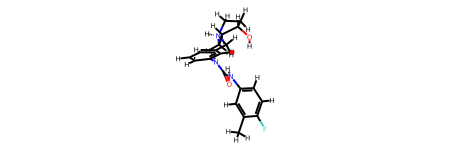

In [152]:
df3[mask]['ROMol'][60]

In [150]:
df3[mask]

MET15.A.Hydrophobic  VAL60.A.Hydrophobic  PHE64.A.Hydrophobic  \
14                      0                    0                    0   
37                      0                    0                    0   
48                      0                    0                    0   
57                      0                    0                    1   
60                      0                    0                    0   
...                   ...                  ...                  ...   
7199                    0                    0                    1   
7212                    0                    0                    1   
7217                    0                    0                    1   
7243                    0                    0                    0   
7261                    0                    0                    0   

      PHE64.A.CationPi  PHE64.A.PiStacking  PHE64.A.VdWContact  \
14                   0                   0                   0   
37                   0                   0                   0   
48                   0                   0                   0   
57                   0                   1                   0   
60                   0                   0                   0   
...                ...                 ...                 ...   
7199                 0                   0                   0   
7212                 0                   0                   1   
7217                 0                   0                   0   
7243                 0                   0                   0   
7261                 0                   0                   0   

      GLN74.A.HBAcceptor  GLN74.A.HBDonor  GLN74.A.VdWContact  \
14                     0                0                   0   
37                     0                0                   0   
48                     0                0                   0   
57                     0                0                   0   
60                     0                0                   0   
...                  ...              ...                 ...   
7199                   0                0                   0   
7212                   0                0                   0   
7217                   0                0                   0   
7243                   0                0                   0   
7261                   0                0                   0   

      LEU75.A.Hydrophobic  ...  Type   pred_M1  pred_bin_M1   pred_M2  \
14                      0  ...     S  0.519726            1  0.507563   
37                      0  ...     S  0.505909            1  0.516817   
48                      0  ...     M  0.643652            1  0.597209   
57                      0  ...     S  0.586104            1  0.576795   
60                      0  ...     S  0.545683            1  0.687053   
...                   ...  ...   ...       ...          ...       ...   
7199                    0  ...     S  0.559947            1  0.521172   
7212                    0  ...     M   0.54449            1   0.59988   
7217                    0  ...     M  0.634311            1  0.551762   
7243                    0  ...     M  0.612352            1  0.599335   
7261                    0  ...     M  0.590373            1  0.546235   

      pred_bin_M2   pred_M3  pred_bin_M3  ID  \
14              1  0.117459            1       
37              1  0.274962            1       
48              1  0.116888            1       
57              1  0.101423            1       
60              1  0.105452            1       
...           ...       ...          ...  ..   
7199            1   0.14132            1       
7212            1  0.116888            1       
7217            1  0.116888            1       
7243            1  0.113134            1       
7261            1  0.116888            1       

                                                 ROMol  minimizedAffinity  
14    <rdkit.Chem.rdchem.Mol object at 0x7fa4a8e4

In [126]:
res2 = df3[(df3['ASP95.A.HBDonor'] == 1) ]

MET15.A.Hydrophobic  VAL60.A.Hydrophobic  PHE64.A.Hydrophobic  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    1   
3                       0                    0                    1   
4                       0                    0                    1   
...                   ...                  ...                  ...   
7264                    0                    0                    1   
7265                    0                    0                    1   
7266                    0                    0                    0   
7267                    0                    0                    0   
7268                    0                    0                    0   

      PHE64.A.CationPi  PHE64.A.PiStacking  PHE64.A.VdWContact  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   1   
3                    0                   0                   0   
4                    0                   0                   0   
...                ...                 ...                 ...   
7264                 0                   0                   1   
7265                 0                   0                   1   
7266                 0                   0                   0   
7267                 0                   0                   1   
7268                 0                   0                   0   

      GLN74.A.HBAcceptor  GLN74.A.HBDonor  GLN74.A.VdWContact  \
0                      0                0                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      0                0                   0   
...                  ...              ...                 ...   
7264                   0                0                   0   
7265                   0                0                   0   
7266                   0                0                   0   
7267                   0                0                   0   
7268                   0                0                   0   

      LEU75.A.Hydrophobic  ...  Type   pred_M1  pred_bin_M1   pred_M2  \
0                       0  ...     S  0.500773            1  0.529719   
1                       0  ...     S  0.502072            1  0.516874   
2                       0  ...     S  0.553606            1  0.675032   
3                       0  ...     S  0.553465            1  0.672001   
4                       0  ...     S  0.610616            1  0.537263   
...                   ...  ...   ...       ...          ...       ...   
7264                    0  ...     S  0.503042            1   0.70506   
7265                    0  ...     S  0.637515            1  0.613289   
7266                    0  ...     M  0.571779            1     0.512   
7267                    0  ...     S  0.517814            1  0.506201   
7268                    0  ...     S  0.547775            1  0.569497   

      pred_bin_M2   pred_M3  pred_bin_M3  ID  \
0               1  0.098555            1       
1               1  0.102685            1       
2               1  0.104812            1       
3               1  0.138977            1       
4               1  0.266043            1       
...           ...       ...          ...  ..   
7264            1  0.133407            1       
7265            1  0.116888            1       
7266            1  0.247252            1       
7267            1  0.092514            1       
7268            1  0.154868            1       

                                                 ROMol  minimizedAffinity  
0     <rdkit.Chem.rdchem.Mol object at 0x7fa4a8f1
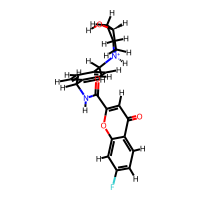
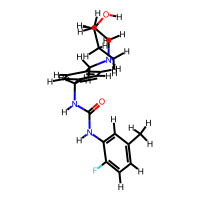
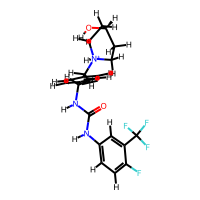
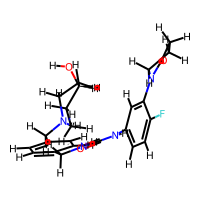
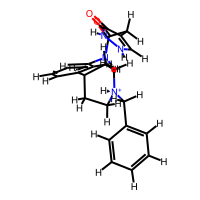
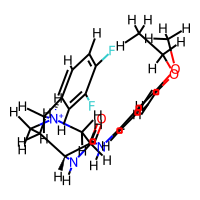
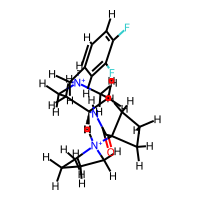
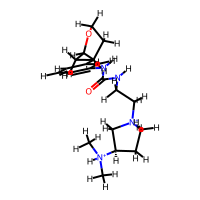
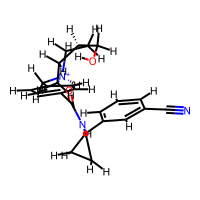
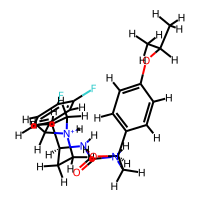

In [134]:
df3

In [132]:
df3[(df3['MET71.A.Hydrophobic'] == 1) ]

KeyError: 'MET71.A.Hydrophobic'

In [153]:
res2

MET15.A.Hydrophobic  VAL60.A.Hydrophobic  PHE64.A.Hydrophobic  \
14                      0                    0                    0   
37                      0                    0                    0   
48                      0                    0                    0   
57                      0                    0                    1   
60                      0                    0                    0   
...                   ...                  ...                  ...   
7199                    0                    0                    1   
7212                    0                    0                    1   
7217                    0                    0                    1   
7243                    0                    0                    0   
7261                    0                    0                    0   

      PHE64.A.CationPi  PHE64.A.PiStacking  PHE64.A.VdWContact  \
14                   0                   0                   0   
37                   0                   0                   0   
48                   0                   0                   0   
57                   0                   1                   0   
60                   0                   0                   0   
...                ...                 ...                 ...   
7199                 0                   0                   0   
7212                 0                   0                   1   
7217                 0                   0                   0   
7243                 0                   0                   0   
7261                 0                   0                   0   

      GLN74.A.HBAcceptor  GLN74.A.HBDonor  GLN74.A.VdWContact  \
14                     0                0                   0   
37                     0                0                   0   
48                     0                0                   0   
57                     0                0                   0   
60                     0                0                   0   
...                  ...              ...                 ...   
7199                   0                0                   0   
7212                   0                0                   0   
7217                   0                0                   0   
7243                   0                0                   0   
7261                   0                0                   0   

      LEU75.A.Hydrophobic  ...  Type   pred_M1  pred_bin_M1   pred_M2  \
14                      0  ...     S  0.519726            1  0.507563   
37                      0  ...     S  0.505909            1  0.516817   
48                      0  ...     M  0.643652            1  0.597209   
57                      0  ...     S  0.586104            1  0.576795   
60                      0  ...     S  0.545683            1  0.687053   
...                   ...  ...   ...       ...          ...       ...   
7199                    0  ...     S  0.559947            1  0.521172   
7212                    0  ...     M   0.54449            1   0.59988   
7217                    0  ...     M  0.634311            1  0.551762   
7243                    0  ...     M  0.612352            1  0.599335   
7261                    0  ...     M  0.590373            1  0.546235   

      pred_bin_M2   pred_M3  pred_bin_M3  ID  \
14              1  0.117459            1       
37              1  0.274962            1       
48              1  0.116888            1       
57              1  0.101423            1       
60              1  0.105452            1       
...           ...       ...          ...  ..   
7199            1   0.14132            1       
7212            1  0.116888            1       
7217            1  0.116888            1       
7243            1  0.113134            1       
7261            1  0.116888            1       

                                                 ROMol  minimizedAffinity  
14    <rdkit.Chem.rdchem.Mol object at 0x7fa4a8e4

In [120]:
res1['Smiles'][463]

'O=C(NC1CCN(CC2=CC=C(F)C(F)=C2)CC1)C1=CC2=C(C=N1)COCC2'

In [117]:
res1[res1['minimizedAffinity'] == -11.143]

Empty DataFrame
Columns: [MET15.A.Hydrophobic, VAL60.A.Hydrophobic, PHE64.A.Hydrophobic, PHE64.A.CationPi, PHE64.A.PiStacking, PHE64.A.VdWContact, GLN74.A.HBAcceptor, GLN74.A.HBDonor, GLN74.A.VdWContact, LEU75.A.Hydrophobic, LEU75.A.VdWContact, THR92.A.Hydrophobic, THR92.A.VdWContact, ASP95.A.HBDonor, ASP95.A.Cationic, ASP95.A.VdWContact, SER98.A.HBDonor, SER98.A.VdWContact, GLN99.A.Hydrophobic, GLN99.A.HBAcceptor, GLN99.A.HBDonor, GLN99.A.VdWContact, SER102.A.HBDonor, SER102.A.VdWContact, VAL150.A.Hydrophobic, VAL150.A.VdWContact, TYR153.A.Hydrophobic, TYR153.A.VdWContact, ALA154.A.Hydrophobic, ALA154.A.VdWContact, ILE157.A.Hydrophobic, ILE157.A.VdWContact, PHE159.A.Hydrophobic, PHE159.A.CationPi, PHE159.A.PiStacking, PHE159.A.VdWContact, VAL164.A.VdWContact, GLY165.A.HBDonor, GLY165.A.VdWContact, CYS166.A.Hydrophobic, CYS166.A.HBDonor, CYS166.A.VdWContact, GLY167.A.HBDonor, GLY167.A.VdWContact, ILE168.A.Hydrophobic, ILE168.A.HBAcceptor, ILE168.A.HBDonor, ILE168.A.VdWContact, ARG169.A.VdWContact, LEU170.A.Hydrophobic, LEU177.A.Hydrophobic, PHE180.A.Hydrophobic, PHE180.A.PiStacking, PHE180.A.VdWContact, GLN184.A.Hydrophobic, GLN184.A.VdWContact, PHE237.A.Hydrophobic, PHE237.A.VdWContact, TRP241.A.Hydrophobic, TRP241.A.HBAcceptor, TRP241.A.CationPi, TRP241.A.PiStacking, TRP241.A.VdWContact, TYR244.A.Hydrophobic, TYR244.A.HBDonor, TYR244.A.PiStacking, TYR244.A.VdWContact, TYR245.A.Hydrophobic, TYR245.A.HBDonor, TYR245.A.PiStacking, TYR245.A.VdWContact, GLN248.A.HBDonor, GLN248.A.VdWContact, GLN251.A.VdWContact, VAL262.A.Hydrophobic, TYR265.A.Hydrophobic, TYR265.A.HBAcceptor, TYR265.A.HBDonor, TYR265.A.PiStacking, TYR265.A.VdWContact, ASN266.A.HBAcceptor, ASN266.A.VdWContact, ILE269.A.Hydrophobic, ILE269.A.VdWContact, GLY272.A.HBDonor, GLY272.A.VdWContact, TYR273.A.Hydrophobic, TYR273.A.HBAcceptor, TYR273.A.HBDonor, TYR273.A.PiStacking, TYR273.A.VdWContact, ASN275.A.HBAcceptor, ASN275.A.VdWContact, Smiles, idnumber, Type, pred_M1, pred_bin_M1, pred_M2, pred_bin_M2, ...]
Index: []

[0 rows x 105 columns]

In [163]:
PandasTools.WriteSDF(res1, '/home/elly/Programming/GPCR_data/cache5/res2_ALL.sdf', molColName='ROMol', properties= list(res1.columns))

In [101]:
(df3['TRP241.A.HBAcceptor'] == 1) &

Smiles         idnumber Type  \
0     O=C(NCC1=CC=C(CN2CCC(O)C2)C=C1)C1=CC(=O)C2=CC=...      Z2644055027    S   
1     CC1=CC=C(F)C(NC(=O)NCC2=CC=C(CN3CCC(O)CC3)C=C2...      Z1132085532    S   
2     O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)NC1=CC=C(F)C(C...      Z1132374407    S   
3     O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)NC1=CC=C(F)C(N...      Z1132254794    S   
4     O=C(CC1=CNNC1=O)NC1=CC=CC(C2CCN(CC3=CC=CC=C3)C...      Z4284562222    S   
...                                                 ...              ...  ...   
7264  CCOC1=CC=C(NC(=O)NC2CCN(CC3=CC=C(F)C(F)=C3)CC2...       Z594665416    S   
7265  O=C(NC1CCN(CC2=CC=C(F)C(F)=C2)CC1)C1(N2CCCC2)CCC1      Z4287093509    S   
7266  CN(C)[C@@H]1CCN(CCNC(=O)NC2=CC=CC(C3CCOCC3)=C2)C1  PV-009847884931    M   
7267  N#CC1=CC(C2(NC(=O)C3=CC=C(CN4CCC(CO)CC4)C=C3)C...      Z1550289815    S   
7268  CC(C)OC1=CC=C(C(O)CNC(=O)NC2CCN(CC3=CC=C(F)C(F...      Z1218384518    S   

       pred_M1 pred_bin_M1   pred_M2 pred_bin_M2   pred_M3 pred_bin_M3  \
0     0.500773           1  0.529719           1  0.098555           1   
1     0.502072           1  0.516874           1  0.102685           1   
2     0.553606           1  0.675032           1  0.104812           1   
3     0.553465           1  0.672001           1  0.138977           1   
4     0.610616           1  0.537263           1  0.266043           1   
...        ...         ...       ...         ...       ...         ...   
7264  0.503042           1   0.70506           1  0.133407           1   
7265  0.637515           1  0.613289           1  0.116888           1   
7266  0.571779           1     0.512           1  0.247252           1   
7267  0.517814           1  0.506201           1  0.092514           1   
7268  0.547775           1  0.569497           1  0.154868           1   

     minimizedAffinity ID                                             ROMol  
0            -12.62603     <rdkit.Chem.rdchem.Mol object at 0x7fa4adbc8900>  
1            -12.44812     <rdkit.Chem.rdchem.Mol object at 0x7fa4a9666180>  
2            -12.44562     <rdkit.Chem.rdchem.Mol object at 0x7fa4a96666c0>  
3            -12.39586     <rdkit.Chem.rdchem.Mol object at 0x7fa4a9666500>  
4            -12.34856     <rdkit.Chem.rdchem.Mol object at 0x7fa4a9666ab0>  
...                ... ..                                               ...  
7264         -10.00022     <rdkit.Chem.rdchem.Mol object at 0x7fa4ad42f760>  
7265         -10.00019     <rdkit.Chem.rdchem.Mol object at 0x7fa4ad42f8b0>  
7266         -10.00014     <rdkit.Chem.rdchem.Mol object at 0x7fa4ad42fa00>  
7267         -10.00004     <rdkit.Chem.rdchem.Mol object at 0x7fa4ad42fb50>  
7268         -10.00001     <rdkit.Chem.rdchem.Mol object at 0x7fa4ad42fca0>  

[7269 rows x 12 columns]

In [95]:
df_csv.to_csv('/home/elly/Programming/GPCR_data/cache5/7k_interactionFP.csv', index = False)

In [7]:
from rdkit.Chem import Fragments

In [9]:
df = PandasTools.LoadSDF('/home/elly/Programming/GPCR_data/cache5/1M_filtered_poses_SMINA10.sdf', molColName='ROMol', removeHs=False, includeFingerprints=True)

In [6]:
df1 = pd.read_csv('/home/elly/Programming/GPCR_data/1M_filtered_xgboost.csv')

In [62]:
Fragments.fr_NH0(mol)

3

In [65]:
mol = Chem.SDMolSupplier('/home/elly/Programming/GPCR_data/test_Q/RIGHT_processing/19.sdf', removeHs = False, sanitize = False)

In [67]:
smarts = "[$([NX4+]),$([NX4]=*)]"
pattern = Chem.MolFromSmarts(smarts)

In [71]:
smarts = "[COO]"
pattern = Chem.MolFromSmarts(smarts)

In [72]:
matches = mol[0].GetSubstructMatches(pattern)

In [76]:
Fragments.fr_quatN(mol[0])

1

In [74]:
type(matches)

tuple

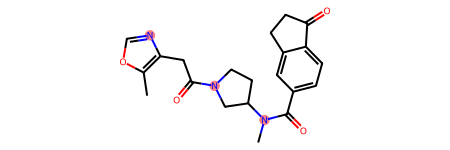

In [63]:
mol

In [61]:
matching_id = []
for index, row in df.iterrows():
    smiles = row['Smiles']
    id = row['idnumber']
    mol = Chem.MolFromSmiles(smiles)
    if Fragments.fr_NH0(mol) > 0 or Fragments.fr_quatN(mol) > 0:
        matching_id.append(id)

In [84]:
def review_quatN(input_folder):
    input_folder = Path(input_folder)
    for input_sdf_path in input_folder.glob("*.sdf"):
        mols = Chem.SDMolSupplier(input_sdf_path, removeHs = False, sanitize = False)
        for mol in mols:
            if Fragments.fr_quatN(mol) == 0:
                print(f'Review molecule {input_sdf_path.name}')

In [86]:
review_quatN('/home/elly/Programming/GPCR_data/test_Q/RIGHT_processing')

Review molecule 441921.sdf


In [89]:
mol = Chem.MolFromSmiles(Chem.MolToSmiles(Chem.SDMolSupplier('/home/elly/Programming/GPCR_data/test_Q/RIGHT_processing/441921.sdf', removeHs = False, sanitize = False)[0]))

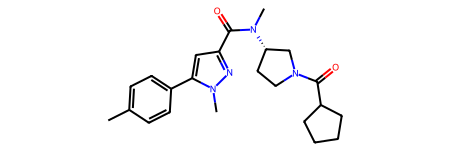

In [90]:
mol

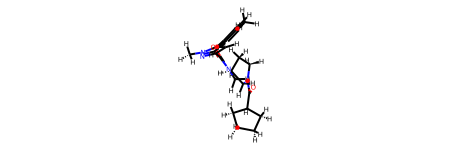

In [88]:
mol[0]

In [49]:
len(matching_id)

921218

In [50]:
len(df1)

924489

In [51]:
len(df1) - len(matching_id)

3271

In [11]:
df1 = pd.read_csv('/home/elly/Programming/GPCR_data/1M_filtered_xgboost.csv')

In [12]:
df_N = df1[df1['idnumber'].isin(matching_id)]

In [13]:
df_N

Smiles         idnumber  \
19      CN(C)CC1=NC2=CC=C(NC(=O)C3(C4=CC(F)=CC=C4)CC3)...  PV-002569808293   
37      CC(C)CC1=CC(C(=O)N(C)C2CCN(C(=O)C3=CSC(=O)N3)C...  PV-005097703254   
59      CC1=CC(O)=NC2=CC=C(NC(=O)NCC3=CC(C(F)F)=CN=C3)...  PV-002832903434   
64      O=C(NCC1=CC=C(CN2CCCC2)C=C1)C(O)C1=CC=C(Cl)C=C1Cl  PV-005098400233   
66      N#CC1=CC(F)=CC(NC(=O)NC2CCN(CC3=CC=C(Cl)C=C3)C...  PV-006886241502   
...                                                   ...              ...   
924438  O=C(CN1CCC(C2=CC=C(C(F)(F)F)C=N2)C1)NC1=CC(F)=...  PV-009338086275   
924450   O=C(NC1CCN(C(=O)CCF)C1)C1=CC=C(CN2CCC(O)CC2)C=C1  PV-005057871091   
924467  O=C(NC1CN(C(=O)CC2CC2)C1)C1=CC=C(CN2CCC(O)CC2)...  PV-005058333675   
924471  O=C(CCC1=CC(F)=CC(F)=C1)NC1CCN(CC2=CC(F)=CC=C2...  PV-005058402926   
924472  CC1=CC(CC(=O)NC2=CC=C3N=C(N4CCOCC4)OC3=C2)=CC=C1F  PV-006879058049   

       Type   pred_M1  pred_bin_M1   pred_M2  pred_bin_M2   pred_M3  \
19        S  0.245979            0  0.546199            1  0.010649   
37        M  0.230324            0  0.429429            0  0.100563   
59        M  0.270419            0  0.502874            1  0.061735   
64        S  0.507841            1  0.288471            0  0.066953   
66        S  0.275665            0  0.510649            1  0.045602   
...     ...       ...          ...       ...          ...       ...   
924438    M  0.243459            0  0.537911            1  0.066959   
924450    M  0.511361            1  0.373624            0  0.064067   
924467    M  0.528157            1  0.373624            0  0.056839   
924471    S  0.537997            1  0.382742            0  0.036551   
924472    S  0.254790            0  0.502674            1  0.051061   

        pred_bin_M3  
19                0  
37                1  
59                0  
64                0  
66                0  
...             ...  
924438            0  
924450            0  
924467            0  
924471            0  
924472            0  

[128124 rows x 9 columns]

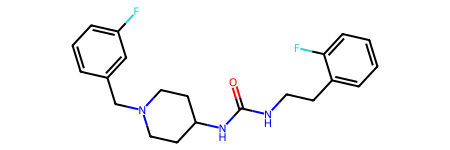

In [55]:
Chem.MolFromSmiles(df_N['Smiles'][442024])

In [57]:
mol = Chem.SDMolSupplier('/home/elly/Programming/GPCR_data/test_Q/RIGHT_processing/19.sdf', removeHs = False, sanitize = False)

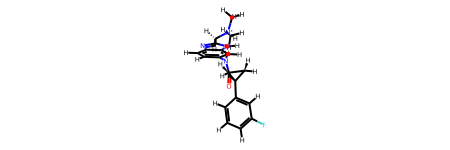

In [59]:
mol[0]

In [ ]:
mol = Chem.SDMolSupplier('/home/elly/Programming/1M_mchr1/poses_1M_test_ex8/poses_test_ex8/442024.sdf', removeHs = False, sanitize = False)

In [56]:
! cp /home/elly/Programming/1M_mchr1/poses_1M_test_ex8/poses_test_ex8/442024.sdf /home/elly/Programming/GPCR_data/test_Q/442024.sdf

[18:51:40] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


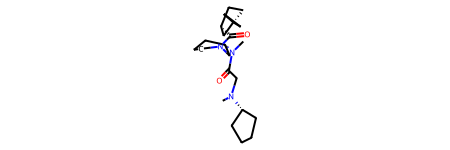

In [45]:
mol[0]

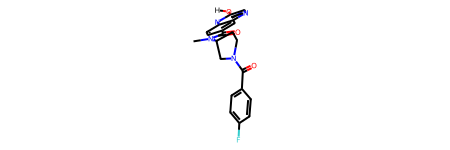

In [24]:
df[df['idnumber'] ==  'PV-005693892242']['ROMol'][2]

In [ ]:
for file_name in os.listdir('/home/elly/Programming/1M_mchr1/poses_1M_test_ex8/poses_test_ex8'):
    if file_name.endswith('.sdf'):
        file_path = os.path.join('/home/elly/Programming/1M_mchr1/poses_1M_test_ex8/poses_test_ex8', file_name)
        suppl = Chem.SDMolSupplier(file_path)
        for mol in suppl:
            if mol is None:

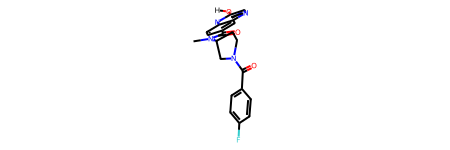

In [18]:
df['ROMol'][2]

In [6]:
df_csv = pd.read_csv('/home/elly/Programming/GPCR_data/cache5/7k_interactionFP.csv')

In [7]:
df_csv

MET15.A.Hydrophobic  VAL60.A.Hydrophobic  PHE64.A.Hydrophobic  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    1   
3                       0                    0                    1   
4                       0                    0                    1   
...                   ...                  ...                  ...   
7264                    0                    0                    1   
7265                    0                    0                    1   
7266                    0                    0                    0   
7267                    0                    0                    0   
7268                    0                    0                    0   

      PHE64.A.CationPi  PHE64.A.PiStacking  PHE64.A.VdWContact  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   1   
3                    0                   0                   0   
4                    0                   0                   0   
...                ...                 ...                 ...   
7264                 0                   0                   1   
7265                 0                   0                   1   
7266                 0                   0                   0   
7267                 0                   0                   1   
7268                 0                   0                   0   

      GLN74.A.HBAcceptor  GLN74.A.HBDonor  GLN74.A.VdWContact  \
0                      0                0                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      0                0                   0   
...                  ...              ...                 ...   
7264                   0                0                   0   
7265                   0                0                   0   
7266                   0                0                   0   
7267                   0                0                   0   
7268                   0                0                   0   

      LEU75.A.Hydrophobic  ...  \
0                       0  ...   
1                       0  ...   
2                       0  ...   
3                       0  ...   
4                       0  ...   
...                   ...  ...   
7264                    0  ...   
7265                    0  ...   
7266                    0  ...   
7267                    0  ...   
7268                    0  ...   

                                                 Smiles         idnumber  \
0     O=C(NCC1=CC=C(CN2CCC(O)C2)C=C1)C1=CC(=O)C2=CC=...      Z2644055027   
1     CC1=CC=C(F)C(NC(=O)NCC2=CC=C(CN3CCC(O)CC3)C=C2...      Z1132085532   
2     O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)NC1=CC=C(F)C(C...      Z1132374407   
3     O=C(NCC1=CC=C(CN2CCC(O)CC2)C=C1)NC1=CC=C(F)C(N...      Z1132254794   
4     O=C(CC1=CNNC1=O)NC1=CC=CC(C2CCN(CC3=CC=CC=C3)C...      Z4284562222   
...                                                 ...              ...   
7264  CCOC1=CC=C(NC(=O)NC2CCN(CC3=CC=C(F)C(F)=C3)CC2...       Z594665416   
7265  O=C(NC1CCN(CC2=CC=C(F)C(F)=C2)CC1)C1(N2CCCC2)CCC1      Z4287093509   
7266  CN(C)[C@@H]1CCN(CCNC(=O)NC2=CC=CC(C3CCOCC3)=C2)C1  PV-009847884931   
7267  N#CC1=CC(C2(NC(=O)C3=CC=C(CN4CCC(CO)CC4)C=C3)C...      Z1550289815   
7268  CC(C)OC1=CC=C(C(O)CNC(=O)NC2CCN(CC3=CC=C(F)C(F...      Z1218384518   

      Type   pred_M1  pred_bin_M1   pred_M2  pred_bin_M2   pred_M3  \
0        S  0.500773            1  0.529719            1  0.098555   
1        S  0.502072            1  0.516874            1  0.102685   
2        S  0.553606            1  0.675032    

In [88]:
df_csv['pred_M1'] = df_csv['pred_M1'].astype(float)
df_csv['pred_M2'] = df_csv['pred_M2'].astype(float)
df_csv['pred_M3'] = df_csv['pred_M3'].astype(float)

In [87]:
type(df_csv['MET15.A.Hydrophobic'][0])

numpy.bool_

In [36]:
df2

MET15.A.Hydrophobic  VAL60.A.Hydrophobic  PHE64.A.Hydrophobic  \
Frame                                                                  
0                    False                False                False   
1                    False                False                False   
2                    False                False                 True   
3                    False                False                 True   
4                    False                False                 True   
...                    ...                  ...                  ...   
7264                 False                False                 True   
7265                 False                False                 True   
7266                 False                False                False   
7267                 False                False                False   
7268                 False                False                False   

       PHE64.A.CationPi  PHE64.A.PiStacking  PHE64.A.VdWContact  \
Frame                                                             
0                 False               False               False   
1                 False               False               False   
2                 False               False                True   
3                 False               False               False   
4                 False               False               False   
...                 ...                 ...                 ...   
7264              False               False                True   
7265              False               False                True   
7266              False               False               False   
7267              False               False                True   
7268              False               False               False   

       GLN74.A.HBAcceptor  GLN74.A.HBDonor  GLN74.A.VdWContact  \
Frame                                                            
0                   False            False               False   
1                   False            False               False   
2                   False            False               False   
3                   False            False               False   
4                   False            False               False   
...                   ...              ...                 ...   
7264                False            False               False   
7265                False            False               False   
7266                False            False               False   
7267                False            False               False   
7268                False            False               False   

       LEU75.A.Hydrophobic  ...  ILE269.A.VdWContact  GLY272.A.HBDonor  \
Frame                       ...                                          
0                    False  ...                False             False   
1                    False  ...                False             False   
2                    False  ...                False             False   
3                    False  ...                False             False   
4                    False  ...                False             False   
...                    ...  ...                  ...               ...   
7264                 False  ...                False             False   
7265                 False  ...                False             False   
7266                 False  ...                False             False   
7267                 False  ...                False             False   
7268                 False  ...                False             False   

       GLY272.A.VdWContact  TYR273.A.Hydrophobic  TYR273.A.HBAcceptor  \
Frame                                                                   
0                    False                  True                False   
1                    False                  True                False   
2                    False                  True                False   
3          

In [112]:
import MDAnalysis as mda
import prolif as plf

# load topology and trajectory
u = mda.Universe('/home/elly/Programming/GPCR_data/cache5/MD/md_conf_snap_4/tmp.gro', '/home/elly/Programming/GPCR_data/cache5/MD/md_conf_snap_4/tmp.xtc')

# create selections for the ligand and protein
ligand_selection = u.select_atoms("resname LLM")
protein_selection = u.select_atoms("protein")
ligand_selection, protein_selection

(<AtomGroup with 68 atoms>, <AtomGroup with 4823 atoms>)

In [114]:
from MDAnalysis.topology.guessers import guess_types

In [116]:
ligand_selection.guess_bonds()
protein_selection.guess_bonds()

In [118]:
ligand_selection.elements = guess_types(ligand_selection.names)

AttributeError: Cannot set arbitrary attributes to a Group

In [117]:
ligand_mol = plf.Molecule.from_mda(ligand_selection)

AttributeError: The `elements` attribute is required for the RDKitConverter but is not present in this AtomGroup. Please refer to the documentation to guess elements from other attributes or type `help(MDAnalysis.topology.guessers)`

In [ ]:
protein_mol = plf.Molecule.from_mda(protein_selection)

In [82]:
mol_3334 = df1.iloc[[3334]]

In [87]:
mol = mol_3334['ROMol'][3334]

In [85]:
PandasTools.WriteSDF(mol_3334, 'mol_3334.sdf', molColName='ROMol', properties= list(mol_3334.columns))

In [88]:
with Chem.PDBWriter('mol_3334.pdb') as writer:
    writer.write(mol)

In [29]:
df.columns

MultiIndex([('UNL1', 'SER621.A', 'Hydrophobic'),
            ('UNL1', 'SER621.A',     'HBDonor'),
            ('UNL1', 'LEU622.A', 'Hydrophobic'),
            ('UNL1', 'LEU622.A',     'HBDonor'),
            ('UNL1', 'THR623.A', 'Hydrophobic'),
            ('UNL1', 'THR623.A',     'HBDonor'),
            ('UNL1', 'SER624.A', 'Hydrophobic'),
            ('UNL1', 'SER624.A',     'HBDonor'),
            ('UNL1', 'SER624.A',  'HBAcceptor'),
            ('UNL1', 'VAL625.A', 'Hydrophobic'),
            ...
            ('UNL1', 'TYR652.D', 'Hydrophobic'),
            ('UNL1', 'TYR652.D',     'HBDonor'),
            ('UNL1', 'TYR652.D',    'CationPi'),
            ('UNL1', 'TYR652.D',  'PiStacking'),
            ('UNL1', 'ALA653.D', 'Hydrophobic'),
            ('UNL1', 'ALA653.D',     'HBDonor'),
            ('UNL1', 'PHE656.D', 'Hydrophobic'),
            ('UNL1', 'PHE656.D',    'CationPi'),
            ('UNL1', 'PHE656.D',  'PiStacking'),
            ('UNL1', 'GLY657.D', 'Hydrophobic')],
   

In [31]:
df[df[('UNL1', 'TYR652.D', 'CationPi')] == True]

ligand             UNL1                                                  \
protein        SER621.A            LEU622.A            THR623.A           
interaction Hydrophobic HBDonor Hydrophobic HBDonor Hydrophobic HBDonor   
Frame                                                                     
624               False   False        True   False        True   False   
765               False   False        True   False        True   False   
1958              False   False       False   False       False   False   
2889              False   False        True   False        True   False   
3334              False   False       False   False       False   False   
3884              False   False       False   False       False   False   
3898              False   False       False   False        True   False   
4346              False   False       False   False        True   False   
4617              False   False       False   False        True   False   
4773              False   False        True   False        True   False   
5702              False   False       False   False        True   False   

ligand                                                              \
protein        SER624.A                       VAL625.A    VAL644.A   
interaction Hydrophobic HBDonor HBAcceptor Hydrophobic Hydrophobic   
Frame                                                                
624                True   False      False       False       False   
765                True   False      False       False       False   
1958               True   False      False       False       False   
2889               True   False      False       False       False   
3334               True   False      False       False       False   
3884               True   False      False       False       False   
3898               True   False      False       False       False   
4346               True   False      False       False       False   
4617               True   False      False       False       False   
4773               True   False      False       False       False   
5702               True   False      False       False       False   

ligand                                                                       \
protein        MET645.A            LEU646.A    GLY648.A            SER649.A   
interaction Hydrophobic HBDonor Hydrophobic Hydrophobic HBDonor Hydrophobic   
Frame                                                                         
624               False    True       False        True   False        True   
765               False    True       False        True   False        True   
1958              False   False       False       False   False        True   
2889              False   False       False        True   False        True   
3334              False   False       False       False   False       False   
3884              False   False       False       False   False        True   
3898              False   False       False        True   False        True   
4346              False   False       False        True   False        True   
4617              False   False       False       False   False        True   
4773              False   False       False        True   False       False   
5702              False   False       False        True   False        True   

ligand                                                                  \
protein                TYR652.A                       ALA653.A           
interaction HBDonor Hydrophobic HBDonor PiStacking Hydrophobic HBDonor   
Frame                                                                    
624           False        True   False      False       False   False   
765           False        True   False      False       False   False   
1958          False        True   False      False        True   False   
2889          False        True   False      False       False   False   
3334          False       False   False      

In [35]:
"TYR652.D"

'TYR652.D'

In [43]:
key1 = ResidueId('TYR', 652, 'D')

NameError: name 'ResidueId' is not defined

In [110]:
frame_number = 2889
ligand_residue = "UNL"
protein_residue = "TYR652.A"

In [109]:
fp.ifp[frame_number]

{(ResidueId(UNL, 1, None),
  ResidueId(SER, 649, A)): (array([ True, False, False, False, False, False, False, False]), [1,
   None,
   None,
   None,
   None,
   None,
   None,
   None], [1, None, None, None, None, None, None, None]),
 (ResidueId(UNL, 1, None),
  ResidueId(TYR, 652, C)): (array([False, False, False, False, False, False, False, False]), [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None], [None, None, None, None, None, None, None, None]),
 (ResidueId(UNL, 1, None),
  ResidueId(ALA, 653, B)): (array([False, False, False, False, False, False, False, False]), [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None], [None, None, None, None, None, None, None, None]),
 (ResidueId(UNL, 1, None),
  ResidueId(ILE, 655, D)): (array([False, False, False, False, False, False, False, False]), [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None], [None, None, None, None, None, None, None, None]),
 (ResidueId(UNL, 1, None),
  ResidueId

In [111]:
fp.ifp[frame_number][(ligand_residue, protein_residue)]

KeyError: ('UNL', 'TYR652.A')

In [54]:
for key in fp.ifp[frame_number].keys():
    print(key)

(ResidueId(UNL, 1, None), ResidueId(SER, 649, A))
(ResidueId(UNL, 1, None), ResidueId(TYR, 652, C))
(ResidueId(UNL, 1, None), ResidueId(ALA, 653, B))
(ResidueId(UNL, 1, None), ResidueId(ILE, 655, D))
(ResidueId(UNL, 1, None), ResidueId(MET, 651, B))
(ResidueId(UNL, 1, None), ResidueId(GLY, 648, B))
(ResidueId(UNL, 1, None), ResidueId(SER, 621, C))
(ResidueId(UNL, 1, None), ResidueId(LEU, 622, B))
(ResidueId(UNL, 1, None), ResidueId(SER, 624, D))
(ResidueId(UNL, 1, None), ResidueId(VAL, 625, D))
(ResidueId(UNL, 1, None), ResidueId(SER, 624, A))
(ResidueId(UNL, 1, None), ResidueId(LEU, 650, B))
(ResidueId(UNL, 1, None), ResidueId(MET, 645, A))
(ResidueId(UNL, 1, None), ResidueId(TYR, 652, B))
(ResidueId(UNL, 1, None), ResidueId(VAL, 625, A))
(ResidueId(UNL, 1, None), ResidueId(PHE, 656, B))
(ResidueId(UNL, 1, None), ResidueId(THR, 623, C))
(ResidueId(UNL, 1, None), ResidueId(ALA, 653, D))
(ResidueId(UNL, 1, None), ResidueId(SER, 649, C))
(ResidueId(UNL, 1, None), ResidueId(ALA, 653, A))


In [157]:
act = pd.read_csv('IFPs_active_MCHR1.csv')

In [168]:
inact = pd.read_csv('IFPs_inact_MCHR1.csv')

In [172]:
common_columns = act.columns.intersection(inact.columns)

In [173]:
common_columns

Index(['ILE11.A.Hydrophobic', 'MET15.A.Hydrophobic', 'PHE19.A.Hydrophobic',
       'LEU57.A.Hydrophobic', 'VAL60.A.Hydrophobic', 'ASP61.A.Hydrophobic',
       'ASP61.A.HBDonor', 'PHE64.A.Hydrophobic', 'PHE64.A.CationPi',
       'PHE64.A.PiStacking',
       ...
       'ALA274.A.Hydrophobic', 'ASN275.A.Hydrophobic', 'ASN275.A.HBDonor',
       'ASN275.A.HBAcceptor', 'SER276.A.Hydrophobic', 'ASN279.A.Hydrophobic',
       'ASN279.A.HBAcceptor', 'class', 'Scaffold', 'value_nM'],
      dtype='object', length=118)

In [174]:
act = act[common_columns]
inact = inact[common_columns]

In [177]:
set = pd.concat([act, inact], ignore_index=True)

In [183]:
set.to_csv('set_IPS_MCHR1_forPCA.csv', index = False)

In [97]:
df2

ILE11.A.Hydrophobic  ILE11.A.VdWContact  MET15.A.Hydrophobic  \
0                   False               False                False   
1                   False               False                False   
2                   False               False                False   
3                   False               False                False   
4                   False               False                False   
...                   ...                 ...                  ...   
3001                False               False                False   
3002                False               False                False   
3003                False               False                False   
3004                False               False                False   
3005                False               False                False   

      MET15.A.VdWContact  PHE19.A.Hydrophobic  PHE19.A.PiStacking  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                  False                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002                True                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      PHE19.A.VdWContact  VAL60.A.Hydrophobic  VAL60.A.VdWContact  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                   True                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002               False                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      ASP61.A.Hydrophobic  ASP61.A.HBDonor  ASP61.A.Cationic  \
0                   False            False             False   
1                   False            False              True   
2                   False            False             False   
3                   False            False             False   
4                   False            False             False   
...                   ...              ...               ...   
3001                False            False             False   
3002                False            False             False   
3003                False            False             False   
3004                False            False             False   
3005                False            False             False   

      ASP61.A.VdWContact  PHE64.A.Hydrophobic  PHE64.A.HBDonor  \
0                  False                 True            False   
1                   True                False            False   
2                  False                False            False   
3                   True                 True            False   
4                  False                False            False   
...                  ...                  ...              ...   
3001               False                False            False   
3002               False                False            False   
3003               False                False            False   
3004               False                False            False   
3005        

In [98]:
set_values = df2.iloc[:, :-6]

In [100]:
df2

ILE11.A.Hydrophobic  ILE11.A.VdWContact  MET15.A.Hydrophobic  \
0                   False               False                False   
1                   False               False                False   
2                   False               False                False   
3                   False               False                False   
4                   False               False                False   
...                   ...                 ...                  ...   
3001                False               False                False   
3002                False               False                False   
3003                False               False                False   
3004                False               False                False   
3005                False               False                False   

      MET15.A.VdWContact  PHE19.A.Hydrophobic  PHE19.A.PiStacking  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                  False                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002                True                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      PHE19.A.VdWContact  VAL60.A.Hydrophobic  VAL60.A.VdWContact  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                   True                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002               False                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      ASP61.A.Hydrophobic  ASP61.A.HBDonor  ASP61.A.Cationic  \
0                   False            False             False   
1                   False            False              True   
2                   False            False             False   
3                   False            False             False   
4                   False            False             False   
...                   ...              ...               ...   
3001                False            False             False   
3002                False            False             False   
3003                False            False             False   
3004                False            False             False   
3005                False            False             False   

      ASP61.A.VdWContact  PHE64.A.Hydrophobic  PHE64.A.HBDonor  \
0                  False                 True            False   
1                   True                False            False   
2                  False                False            False   
3                   True                 True            False   
4                  False                False            False   
...                  ...                  ...              ...   
3001               False                False            False   
3002               False                False            False   
3003               False                False            False   
3004               False                False            False   
3005        

In [99]:
set_values

ILE11.A.Hydrophobic  ILE11.A.VdWContact  MET15.A.Hydrophobic  \
0                   False               False                False   
1                   False               False                False   
2                   False               False                False   
3                   False               False                False   
4                   False               False                False   
...                   ...                 ...                  ...   
3001                False               False                False   
3002                False               False                False   
3003                False               False                False   
3004                False               False                False   
3005                False               False                False   

      MET15.A.VdWContact  PHE19.A.Hydrophobic  PHE19.A.PiStacking  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                  False                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002                True                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      PHE19.A.VdWContact  VAL60.A.Hydrophobic  VAL60.A.VdWContact  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                   True                False               False   
...                  ...                  ...                 ...   
3001               False                False               False   
3002               False                False               False   
3003               False                False               False   
3004               False                False               False   
3005               False                False               False   

      ASP61.A.Hydrophobic  ASP61.A.HBDonor  ASP61.A.Cationic  \
0                   False            False             False   
1                   False            False              True   
2                   False            False             False   
3                   False            False             False   
4                   False            False             False   
...                   ...              ...               ...   
3001                False            False             False   
3002                False            False             False   
3003                False            False             False   
3004                False            False             False   
3005                False            False             False   

      ASP61.A.VdWContact  PHE64.A.Hydrophobic  PHE64.A.HBDonor  \
0                  False                 True            False   
1                   True                False            False   
2                  False                False            False   
3                   True                 True            False   
4                  False                False            False   
...                  ...                  ...              ...   
3001               False                False            False   
3002               False                False            False   
3003               False                False            False   
3004               False                False            False   
3005        

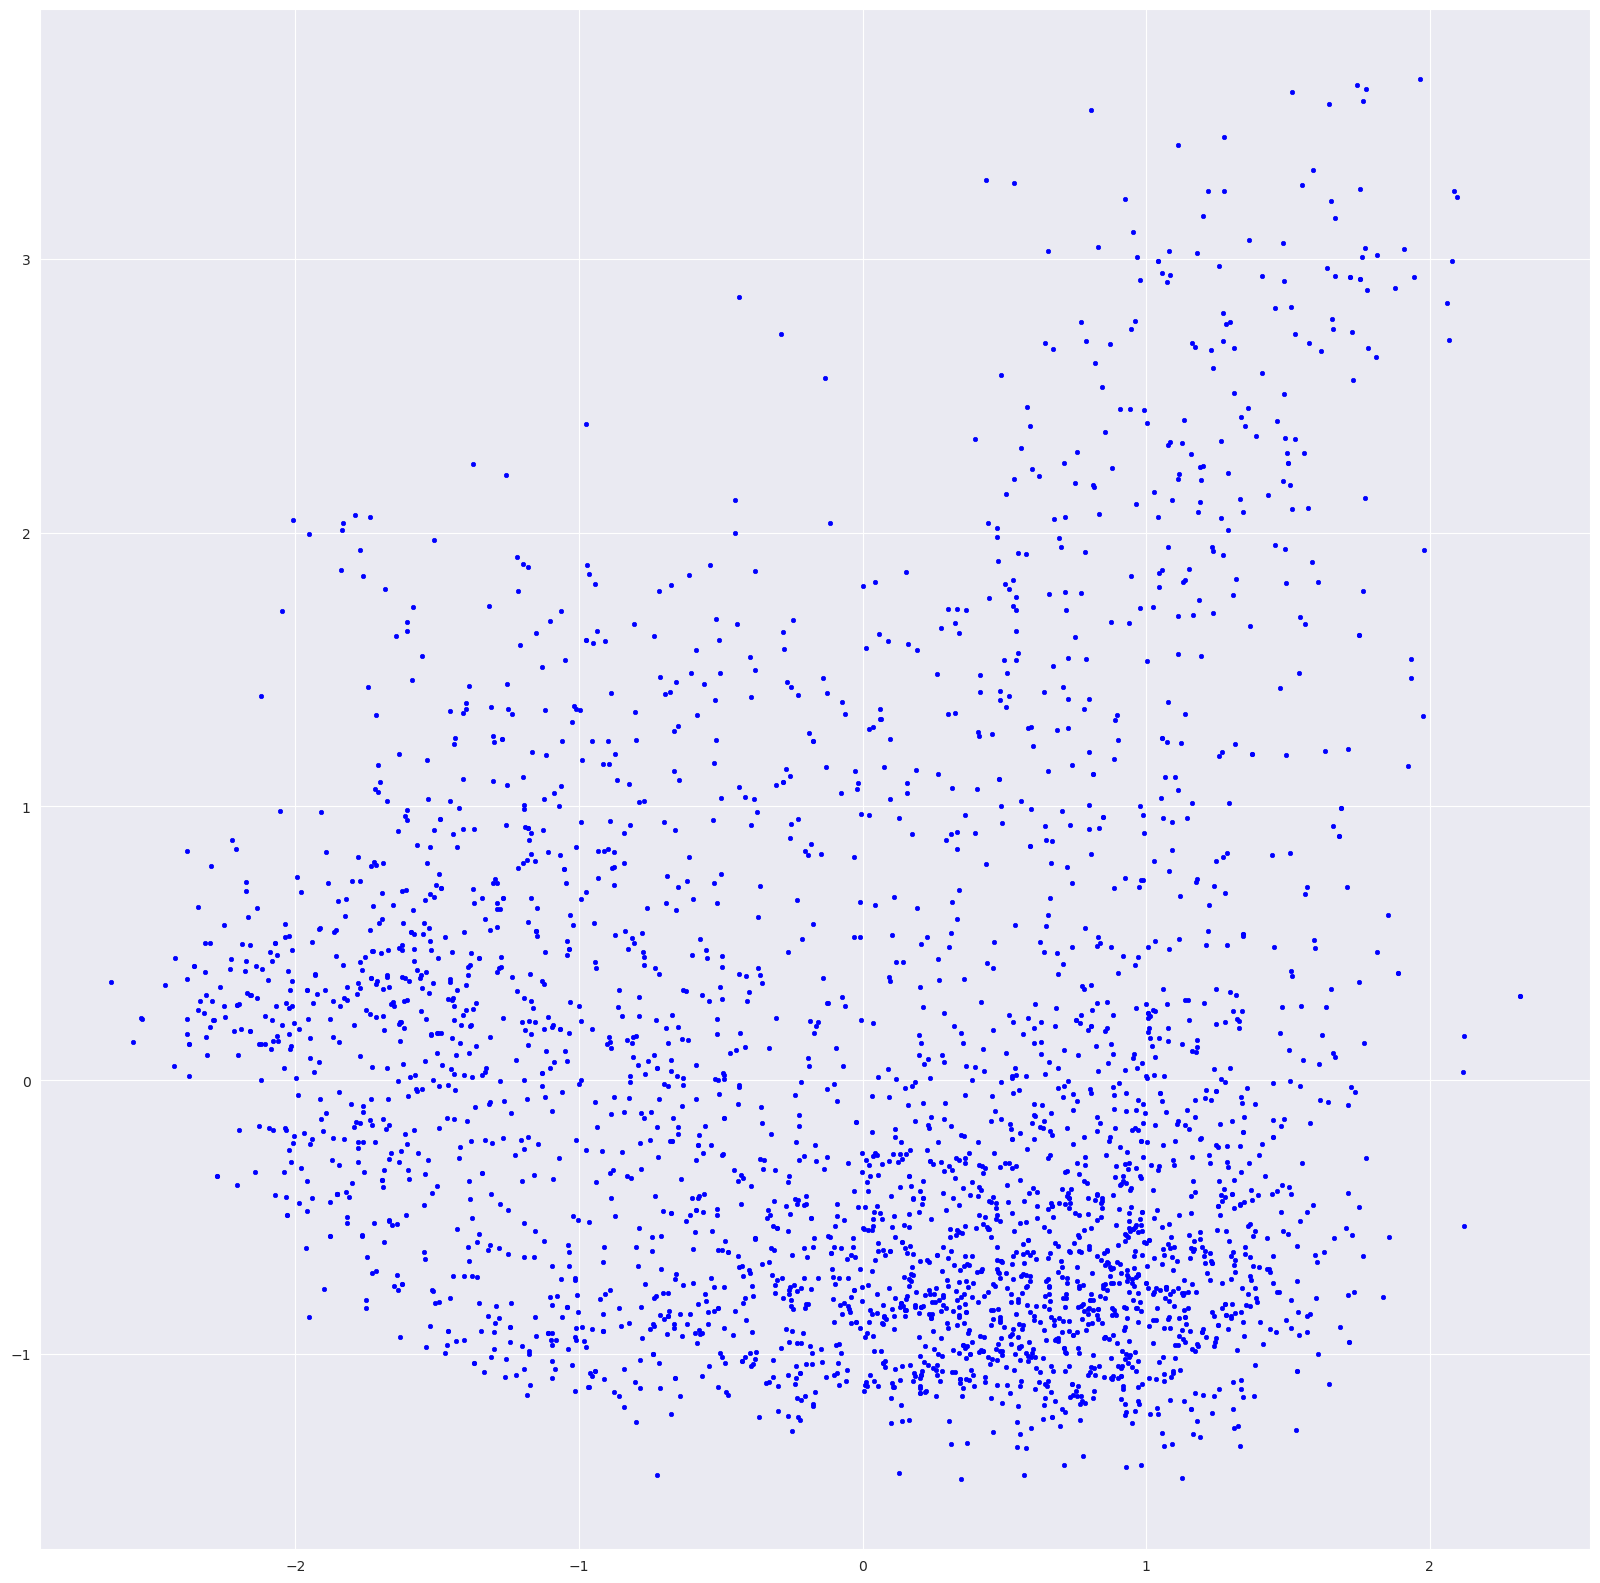

In [104]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce dimensions to 2
X_embedded = pca.fit_transform(set_values)

# Assume 'set' is a DataFrame containing your class labels
label = np.array(df2['Class'])
idx_0 = np.where(label == 0)
idx_1 = np.where(label != 0)

# Plot the results
plt.figure(figsize=(20, 20))
plt.scatter(X_embedded[idx_0, 0], X_embedded[idx_0, 1], s=10, c='r', linewidths=0.5)
plt.scatter(X_embedded[idx_1, 0], X_embedded[idx_1, 1], s=10, c='b', linewidths=0.5)
plt.savefig("PCA_Active_Interactions.png", facecolor='white', dpi = 300)
plt.show()

In [138]:
df.columns

MultiIndex([('UNL1',   'ILE8.A', 'Hydrophobic'),
            ('UNL1',  'TYR10.A', 'Hydrophobic'),
            ('UNL1',  'ILE11.A', 'Hydrophobic'),
            ('UNL1',  'MET15.A', 'Hydrophobic'),
            ('UNL1',  'PRO16.A', 'Hydrophobic'),
            ('UNL1',  'PHE19.A', 'Hydrophobic'),
            ('UNL1',  'PHE19.A',  'PiStacking'),
            ('UNL1',  'ILE22.A', 'Hydrophobic'),
            ('UNL1',  'LEU25.A', 'Hydrophobic'),
            ('UNL1',  'GLY26.A', 'Hydrophobic'),
            ...
            ('UNL1', 'ASN275.A', 'Hydrophobic'),
            ('UNL1', 'ASN275.A',     'HBDonor'),
            ('UNL1', 'ASN275.A',  'HBAcceptor'),
            ('UNL1', 'SER276.A', 'Hydrophobic'),
            ('UNL1', 'SER276.A',     'HBDonor'),
            ('UNL1', 'CYS277.A', 'Hydrophobic'),
            ('UNL1', 'LEU278.A', 'Hydrophobic'),
            ('UNL1', 'ASN279.A', 'Hydrophobic'),
            ('UNL1', 'ASN279.A',     'HBDonor'),
            ('UNL1', 'ASN279.A',  'HBAcceptor')],
   

In [139]:
index = pd.MultiIndex.from_tuples(df.keys(), names=['ligand', 'protein', 'interaction'])
df = pd.DataFrame(df, columns=index)

In [140]:
df.columns = ['.'.join(col[1:]) for col in df.columns]

In [167]:
df.to_csv('IFPs_inactive_MCHR1.csv', index=False)

In [144]:
df = pd.read_csv('IFPs_inactive_MCHR1.csv')

In [166]:
df

ILE8.A.Hydrophobic  TYR10.A.Hydrophobic  ILE11.A.Hydrophobic  \
0                   False                False                False   
1                   False                False                False   
2                   False                False                False   
3                   False                False                False   
4                   False                False                False   
...                   ...                  ...                  ...   
28587               False                False                False   
28588               False                False                False   
28589               False                False                False   
28590               False                False                False   
28591               False                False                False   

       MET15.A.Hydrophobic  PRO16.A.Hydrophobic  PHE19.A.Hydrophobic  \
0                    False                False                False   
1                    False                False                False   
2                    False                False                False   
3                    False                False                False   
4                    False                False                False   
...                    ...                  ...                  ...   
28587                False                False                False   
28588                False                False                False   
28589                False                False                False   
28590                False                False                False   
28591                False                False                False   

       PHE19.A.PiStacking  ILE22.A.Hydrophobic  LEU25.A.Hydrophobic  \
0                   False                False                False   
1                   False                False                False   
2                   False                False                False   
3                   False                False                False   
4                   False                False                False   
...                   ...                  ...                  ...   
28587               False                False                False   
28588               False                False                False   
28589               False                False                False   
28590               False                False                False   
28591               False                False                False   

       GLY26.A.Hydrophobic  ILE27.A.Hydrophobic  LEU57.A.Hydrophobic  \
0                    False                False                False   
1                    False                False                False   
2                    False                False                False   
3                    False                False                False   
4                    False                False                False   
...                    ...                  ...                  ...   
28587                False                False                False   
28588                False                False                False   
28589                False                False                False   
28590                False                False                False   
28591                False                False                False   

       VAL60.A.Hydrophobic  ASP61.A.Hydrophobic  ASP61.A.HBDonor  \
0                    False                False            False   
1                    False                False            False   
2                    False                False            False   
3                    False                False            False   
4                    False                False            False   
...                    ...                  ...              ...   
28587                 True                False            False   
28588                False 

Smiles Standard_Type  \
0        CC[N@@H+](CC(=O)Nc1cccc(F)c1)Cc1nc(O)c2ccccc2n1        Random   
1      O=C(NC(=S)N1CCc2c(OCCCCCOc3ccc(Cl)cc3)cccc21)c...        Random   
2             Cc1ccc(CNC(=O)CSc2nc3ccccc3c3nc(C)nn23)cc1        Random   
3      Cc1onc(-c2c(Cl)cccc2Cl)c1C(=O)NNC(=O)c1c(-c2c(...        Random   
4      C[C@@H]1CCCC[C@H]1NC(=O)[C@H](Cc1ccccc1)NS(=O)...        Random   
...                                                  ...           ...   
28587  CCCCc1nc(SC)c([C@H](O)n2cnnn2)n1Cc1ccc(-c2cccc...        Random   
28588  CC(C)=CC[C@@]12OC[C@@H]3[C@@H](C[NH+]4CCCCC4)[...        Random   
28589          Cn1cc(-c2cccc(Sc3cccc(C(=O)[O-])n3)c2)cn1        Random   
28590  CC(C)(C)OC(=O)N1CC[NH+](C2(C(=O)N3C[C@H](S(=O)...        Random   
28591    COc1ccc(OCCCC(=O)OCC(=O)Nc2nnc(-c3ccccc3)o2)cc1        Random   

      Value_nM Class minimizedAffinity     ID  \
0       Random     0          -9.65332      0   
1       Random     0          -9.47652      1   
2       Random     0         -10.60539      2   
3       Random     0          -6.15066      3   
4       Random     0          -9.21442      4   
...        ...   ...               ...    ...   
28587   Random     0          -7.08615  29439   
28588   Random     0          -0.06692  29440   
28589   Random     0          -9.38763  29441   
28590   Random     0          -8.88588  29442   
28591   Random     0          -8.91174  29443   

                                                   ROMol  
0      <img data-content="rdkit/molecule" src="data:i...  
1      <img data-content="rdkit/molecule" src="data:i...  
2      <img data-content="rdkit/molecule" src="data:i...  
3      <img data-content="rdkit/molecule" src="data:i...  
4      <img data-content="rdkit/molecule" src="data:i...  
...                                                  ...  
28587  <img data-content="rdkit/molecule" src="data:i...  
28588  <img data-content="rdkit/molecule" src="data:i...  
28589  <img data-content="rdkit/molecule" src="data:i...  
28590  <img data-content="rdkit/molecule" src="data:i...  
28591  <img data-content="rdkit/molecule" src="data:i...  

[28592 rows x 7 columns]
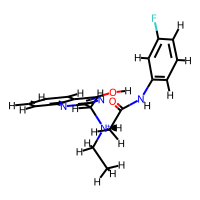
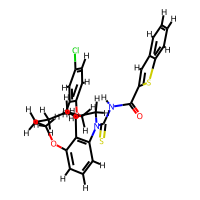
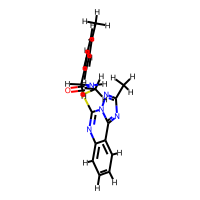
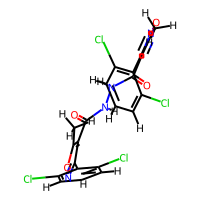
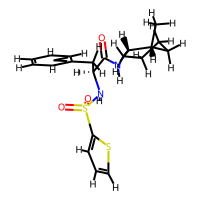
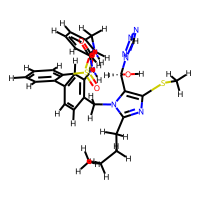
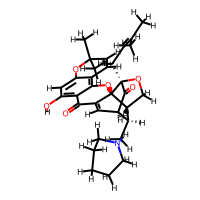
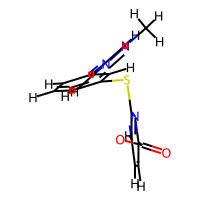
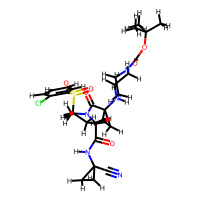
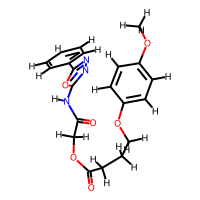

In [146]:
df1

In [147]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

In [148]:
df['class'] = df1['Class']

In [153]:
df['Scaffold'] = df1['Scaffold']
df['value_nM'] = df1['Value_nM']

In [113]:
#df.to_parquet('IFP_MCHR1_inactive.parqet')

In [43]:
df_10000['Class'].value_counts()

1    3116
Name: Class, dtype: int64

In [48]:
#df = df.droplevel("ligand", axis=1)

In [151]:
from rdkit.Chem.Scaffolds import MurckoScaffold
def calculate_scaffold(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:  # Check if the molecule was successfully created
            return None
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        scaffold_smiles = Chem.MolToSmiles(scaffold)
        return scaffold_smiles
    except Exception as e:
        print(f"Error processing SMILES '{smiles}': {str(e)}")
        return None

In [152]:
df1['Scaffold'] = df1['Smiles'].apply(calculate_scaffold)

Smiles Standard_Type  \
0     N#Cc1cccc(-c2ccc([C@@H](CCc3nc4c(Cl)cc(Cl)cc4[...            Ki   
1     O=c1cc(OCc2ccc(F)cc2)ccn1-c1ccc(OCC[NH+]2CCCC2...          IC50   
2     COc1cc(NC(=O)c2ccc(-c3ccccc3)cc2)ccc1C(=O)NCC[...          IC50   
3         O=C(Nc1ccc2nc(C3CC3)cn2c1)c1ccc(-c2ccccn2)cc1          IC50   
4     Cc1nc2cc(C#N)ccc2n1[C@H]1CC[C@@H]([NH2+]C[C@@H...          IC50   
...                                                 ...           ...   
3209  CC(=O)Nc1ccc([C@]23CC[C@@H](N(CCC[NH+]4CC[NH+]...            Ki   
3210  Cc1ccc(/C=C/C(=O)Nc2ccc3nc(N(C)CC[NH+](C)C)cc(...          IC50   
3211  Cc1c(C2CC2)nc2ccc(NC(=O)c3ccc(-c4ccc(S(C)(=O)=...          IC50   
3212  CN(C)S(=O)(=O)c1ccc2c(c1)C[C@H](N(CCC[NH+]1CC[...            Ki   
3213  O=C(Nc1ccc(Oc2ccccc2)cc1)Nc1ccc2nn(CC[N@@H+]3C...          IC50   

      Value_nM Class minimizedAffinity    ID  \
0         39.5     1         -10.21531     0   
1          5.6     1          -9.67431     1   
2        640.0     1          -6.42214     2   
3        140.0     1          -8.32002     3   
4         76.0     1         -10.47271  2706   
...        ...   ...               ...   ...   
3209       4.8     1         -10.89010  3001   
3210     181.0     1          -7.35261  3002   
3211      48.0     1          -4.28572  3003   
3212    3000.0     1          -9.89994  3004   
3213      57.0     1         -11.43480  3005   

                                                  ROMol  \
0     <img data-content="rdkit/molecule" src="data:i...   
1     <img data-content="rdkit/molecule" src="data:i...   
2     <img data-content="rdkit/molecule" src="data:i...   
3     <img data-content="rdkit/molecule" src="data:i...   
4     <img data-content="rdkit/molecule" src="data:i...   
...                                                 ...   
3209  <img data-content="rdkit/molecule" src="data:i...   
3210  <img data-content="rdkit/molecule" src="data:i...   
3211  <img data-content="rdkit/molecule" src="data:i...   
3212  <img data-content="rdkit/molecule" src="data:i...   
3213  <img data-content="rdkit/molecule" src="data:i...   

                                               Scaffold  
0     c1ccc(C[NH+]2CCC([C@H](CCc3nc4ccccc4[nH]3)c3cc...  
1       O=c1cc(OCc2ccccc2)ccn1-c1ccc(OCC[NH+]2CCCC2)cc1  
2     O=C(NCC[NH+]1CC[NH+](Cc2ccccc2)CC1)c1ccc(NC(=O...  
3         O=C(Nc1ccc2nc(C3CC3)cn2c1)c1ccc(-c2ccccn2)cc1  
4     c1ccc2c(c1)CC(C[NH2+][C@H]1CC[C@@H](n3cnc4cccc...  
...                                                 ...  
3209  O=C(Nc1ccccc1)N(CCC[NH+]1CC[NH2+]CC1)[C@@H]1CC...  
3210                  O=C(/C=C/c1ccccc1)Nc1ccc2ncccc2c1  
3211      O=C(Nc1ccc2nc(C3CC3)cn2c1)c1ccc(-c2ccccn2)cc1  
3212  O=C(Nc1ccccc1)N(CCC[NH+]1CC[NH2+]CC1)[C@@H]1CC...  
3213  O=C(Nc1ccc(Oc2ccccc2)cc1)Nc1ccc2nn(CC[NH+]3CCC...  

[3116 rows x 8 columns]
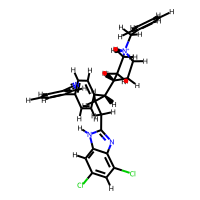
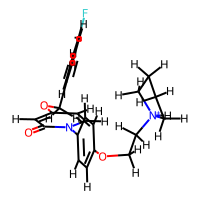
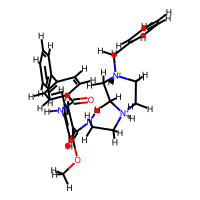
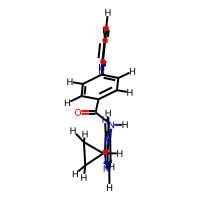
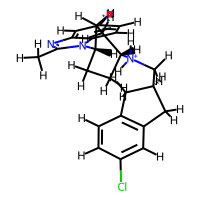
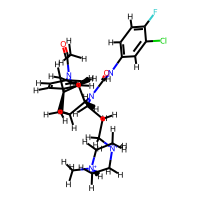
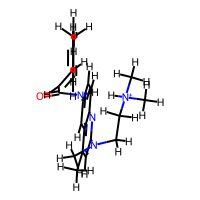
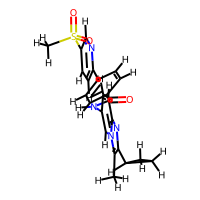
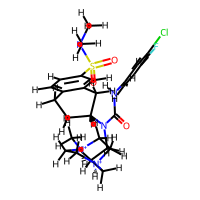
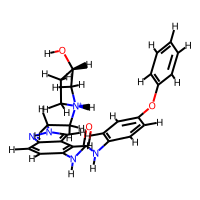

In [34]:
df_10000

In [45]:
df['Class'] = df_10000['Class']

In [46]:
df

protein         ILE11.A     MET15.A     PHE19.A     LEU57.A     VAL60.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
0                 False       False       False       False       False   
1                 False       False       False       False       False   
2                 False       False       False       False       False   
3                 False       False       False       False       False   
4                 False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
3111              False       False       False       False       False   
3112              False       False       False       False       False   
3113              False       False       False       False       False   
3114              False       False       False       False       False   
3115              False       False       False       False       False   

protein         ASP61.A             PHE64.A                         GLY67.A  \
interaction Hydrophobic HBDonor Hydrophobic CationPi PiStacking Hydrophobic   
Frame                                                                         
0                 False   False       False    False      False       False   
1                 False   False        True    False      False       False   
2                 False   False       False    False      False       False   
3                 False   False        True    False      False       False   
4                 False   False       False    False      False       False   
...                 ...     ...         ...      ...        ...         ...   
3111              False   False       False    False      False       False   
3112              False   False       False    False      False       False   
3113              False   False       False    False      False       False   
3114              False   False       False    False      False       False   
3115              False   False        True    False      False       False   

protein         MET68.A     MET71.A     GLN74.A                     \
interaction Hydrophobic Hydrophobic Hydrophobic HBDonor HBAcceptor   
Frame                                                                
0                 False       False        True   False      False   
1                 False       False       False   False      False   
2                 False       False        True   False      False   
3                 False       False       False   False      False   
4                 False       False       False   False      False   
...                 ...         ...         ...     ...        ...   
3111              False       False        True   False      False   
3112              False       False       False   False      False   
3113              False       False       False   False      False   
3114              False       False       False   False      False   
3115              False       False        True   False      False   

protein         LEU75.A     GLY79.A     ILE91.A     THR92.A     MET94.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
0                  True       False       False       False       False   
1                 False       False       False       False       False   
2                 False       False       False       False       False   
3                 False       False       False       False       False   
4                 False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
3111              False       False       False        True       False   
3112              False       False       False       False       False   
3113              False       False 

In [36]:
df['value_nM'] = df_10000['Value_nM']

In [37]:
df['Scaffold'] = df_10000['Scaffold']

In [38]:
df.columns

MultiIndex([( 'ILE11.A', 'Hydrophobic'),
            ( 'MET15.A', 'Hydrophobic'),
            ( 'PHE19.A', 'Hydrophobic'),
            ( 'LEU57.A', 'Hydrophobic'),
            ( 'VAL60.A', 'Hydrophobic'),
            ( 'ASP61.A', 'Hydrophobic'),
            ( 'ASP61.A',     'HBDonor'),
            ( 'PHE64.A', 'Hydrophobic'),
            ( 'PHE64.A',    'CationPi'),
            ( 'PHE64.A',  'PiStacking'),
            ...
            ('ALA274.A', 'Hydrophobic'),
            ('ASN275.A', 'Hydrophobic'),
            ('ASN275.A',     'HBDonor'),
            ('ASN275.A',  'HBAcceptor'),
            ('SER276.A', 'Hydrophobic'),
            ('ASN279.A', 'Hydrophobic'),
            ('ASN279.A',  'HBAcceptor'),
            (   'class',            ''),
            ('value_nM',            ''),
            ('Scaffold',            '')],
           names=['protein', 'interaction'], length=120)

In [76]:
df[((df[('TRP241.A', 'PiStacking')] == True) | (df['TRP241.A', 'HBAcceptor'] == True)) & ((df['ASP95.A', 'HBDonor'] == True) | (df['ASP95.A', 'Cationic'] == True)) | (df['PHE64.A', 'Hydrophobic'] == True)]

protein          ILE8.A     TYR10.A     ILE11.A     MET15.A     PRO16.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
1                 False       False       False       False       False   
2                 False       False       False       False       False   
5                 False       False       False       False       False   
8                 False       False       False       False       False   
11                False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
28573             False       False       False       False       False   
28576             False       False       False       False       False   
28580             False       False       False       False       False   
28582             False       False       False       False       False   
28587             False       False       False       False       False   

protein         PHE19.A                ILE22.A     LEU25.A     GLY26.A  ...  \
interaction Hydrophobic PiStacking Hydrophobic Hydrophobic Hydrophobic  ...   
Frame                                                                   ...   
1                 False      False       False       False       False  ...   
2                 False      False       False       False       False  ...   
5                 False      False       False       False       False  ...   
8                 False      False       False       False       False  ...   
11                False      False       False       False       False  ...   
...                 ...        ...         ...         ...         ...  ...   
28573             False      False       False       False       False  ...   
28576             False      False       False       False       False  ...   
28580             False      False       False       False       False  ...   
28582             False      False       False       False       False  ...   
28587             False      False       False       False       False  ...   

protein        SER276.A            CYS277.A    LEU278.A    ASN279.A          \
interaction Hydrophobic HBDonor Hydrophobic Hydrophobic Hydrophobic HBDonor   
Frame                                                                         
1                 False   False       False       False       False   False   
2                 False   False       False       False       False   False   
5                 False   False       False       False       False   False   
8                 False   False       False       False       False   False   
11                False   False       False       False       False   False   
...                 ...     ...         ...         ...         ...     ...   
28573             False   False       False       False       False   False   
28576             False   False       False       False       False   False   
28580             False   False       False       False       False   False   
28582             False   False       False       False       False   False   
28587             False   False       False       False       False   False   

protein                class value_nM  \
interaction HBAcceptor                  
Frame                                   
1                False     0   Random   
2                False     0   Random   
5                False     0   Random   
8                False     0   Random   
11               False     0   Random   
...                ...   ...      ...   
28573            False     0   Random   
28576            False     0   Random   
28580            False     0   Random   
28582            False     0   Random   
28587            False     0   Random   

protein                                               Scaffold  
interaction                                                     
Frame                         

In [39]:
df[
    ((df[('TRP241.A', 'PiStacking')] == True) | (df[('TRP241.A', 'HBAcceptor')] == True)) &
    ((df[('ASP95.A', 'HBDonor')] == True) | (df[('ASP95.A', 'Cationic')] == True)) &
    (df[('PHE64.A', 'Hydrophobic')] == True)
]

protein         ILE11.A     MET15.A     PHE19.A     LEU57.A     VAL60.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
96                False       False       False       False       False   
124               False       False       False       False       False   
168               False       False       False       False       False   
194               False       False       False       False       False   
205               False       False       False       False        True   
...                 ...         ...         ...         ...         ...   
2877              False       False       False       False       False   
2901              False       False       False       False       False   
2934              False       False       False       False       False   
3003              False       False       False       False       False   
3105              False       False       False       False       False   

protein         ASP61.A             PHE64.A                         GLY67.A  \
interaction Hydrophobic HBDonor Hydrophobic CationPi PiStacking Hydrophobic   
Frame                                                                         
96                False   False        True    False      False       False   
124               False   False        True    False      False       False   
168               False   False        True    False      False       False   
194               False   False        True    False      False       False   
205               False   False        True    False      False       False   
...                 ...     ...         ...      ...        ...         ...   
2877              False   False        True    False      False       False   
2901              False   False        True    False      False       False   
2934              False   False        True    False      False       False   
3003              False   False        True    False      False       False   
3105              False   False        True    False      False       False   

protein         MET68.A     MET71.A     GLN74.A                     \
interaction Hydrophobic Hydrophobic Hydrophobic HBDonor HBAcceptor   
Frame                                                                
96                False       False        True   False      False   
124               False       False       False   False      False   
168               False       False       False   False      False   
194               False       False       False   False      False   
205               False       False       False   False      False   
...                 ...         ...         ...     ...        ...   
2877              False       False       False   False      False   
2901              False       False       False   False      False   
2934              False       False        True   False      False   
3003              False       False       False   False      False   
3105              False       False       False   False      False   

protein         LEU75.A     GLY79.A     ILE91.A     THR92.A     MET94.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
96                False       False       False       False       False   
124               False       False       False       False       False   
168               False       False       False        True       False   
194               False       False       False       False       False   
205               False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
2877              False       False       False       False       False   
2901              False       False       False       False       False   
2934              False       False 

In [114]:
df[
    ((df['TRP241.A.PiStacking'] == True) | (df['TRP241.A.HBAcceptor'] == True)) &
    ((df['ASP95.A.HBDonor'] == True) | (df['ASP95.A.Cationic'] == True)) &
    (df['PHE64.A.Hydrophobic'] == True)
]

ILE11.A.Hydrophobic  MET15.A.Hydrophobic  PHE19.A.Hydrophobic  \
96                  False                False                False   
124                 False                False                False   
168                 False                False                False   
194                 False                False                False   
205                 False                False                False   
...                   ...                  ...                  ...   
2877                False                False                False   
2901                False                False                False   
2934                False                False                False   
3003                False                False                False   
3105                False                False                False   

      LEU57.A.Hydrophobic  VAL60.A.Hydrophobic  ASP61.A.Hydrophobic  \
96                  False                False                False   
124                 False                False                False   
168                 False                False                False   
194                 False                False                False   
205                 False                 True                False   
...                   ...                  ...                  ...   
2877                False                False                False   
2901                False                False                False   
2934                False                False                False   
3003                False                False                False   
3105                False                False                False   

      ASP61.A.HBDonor  PHE64.A.Hydrophobic  PHE64.A.CationPi  \
96              False                 True             False   
124             False                 True             False   
168             False                 True             False   
194             False                 True             False   
205             False                 True             False   
...               ...                  ...               ...   
2877            False                 True             False   
2901            False                 True             False   
2934            False                 True             False   
3003            False                 True             False   
3105            False                 True             False   

      PHE64.A.PiStacking  GLY67.A.Hydrophobic  MET68.A.Hydrophobic  \
96                 False                False                False   
124                False                False                False   
168                False                False                False   
194                False                False                False   
205                False                False                False   
...                  ...                  ...                  ...   
2877               False                False                False   
2901               False                False                False   
2934               False                False                False   
3003               False                False                False   
3105               False                False                False   

      MET71.A.Hydrophobic  GLN74.A.Hydrophobic  GLN74.A.HBDonor  \
96                  False                 True            False   
124                 False                False            False   
168                 False                False            False   
194                 False                False            False   
205                 False                False            False   
...                   ...                  ...              ...   
2877                False                False            False   
2901                False                False            False   
2934                False                 True            False   
3003                

In [155]:
df[
    ((df['TRP241.A.PiStacking'] == True) | (df['TRP241.A.HBAcceptor'] == True)) &
    ((df['ASP95.A.HBDonor'] == True) | (df['ASP95.A.Cationic'] == True)) &
    (df['PHE64.A.Hydrophobic'] == True)
]

ILE8.A.Hydrophobic  TYR10.A.Hydrophobic  ILE11.A.Hydrophobic  \
2                   False                False                False   
28                  False                False                False   
57                  False                False                False   
105                 False                False                False   
184                 False                False                False   
...                   ...                  ...                  ...   
28278               False                False                False   
28350               False                False                False   
28415               False                False                False   
28431               False                False                False   
28496               False                False                False   

       MET15.A.Hydrophobic  PRO16.A.Hydrophobic  PHE19.A.Hydrophobic  \
2                    False                False                False   
28                   False                False                False   
57                   False                False                False   
105                  False                False                False   
184                  False                False                False   
...                    ...                  ...                  ...   
28278                False                False                False   
28350                False                False                False   
28415                False                False                False   
28431                False                False                False   
28496                False                False                False   

       PHE19.A.PiStacking  ILE22.A.Hydrophobic  LEU25.A.Hydrophobic  \
2                   False                False                False   
28                  False                False                False   
57                  False                False                False   
105                 False                False                False   
184                 False                False                False   
...                   ...                  ...                  ...   
28278               False                False                False   
28350               False                False                False   
28415               False                False                False   
28431               False                False                False   
28496               False                False                False   

       GLY26.A.Hydrophobic  ILE27.A.Hydrophobic  LEU57.A.Hydrophobic  \
2                    False                False                False   
28                   False                False                False   
57                   False                False                False   
105                  False                False                False   
184                  False                False                False   
...                    ...                  ...                  ...   
28278                False                False                False   
28350                False                False                False   
28415                False                False                False   
28431                False                False                False   
28496                False                False                False   

       VAL60.A.Hydrophobic  ASP61.A.Hydrophobic  ASP61.A.HBDonor  \
2                    False                False            False   
28                   False                False            False   
57                   False                False            False   
105                  False                False            False   
184                  False                False            False   
...                    ...                  ...              ...   
28278                False                False            False   
28350                False 

In [116]:
df_filtered = df[
    ((df['TRP241.A.PiStacking'] == True) | (df['TRP241.A.HBAcceptor'] == True)) &
    ((df['ASP95.A.HBDonor'] == True) | (df['ASP95.A.Cationic'] == True)) &
    (df['PHE64.A.Hydrophobic'] == True)
]

In [115]:
df['value_nM'].describe()

count    3116.000000
mean      429.211756
std      1145.851079
min         0.100000
25%         8.700000
50%        38.000000
75%       216.250000
max      9920.000000
Name: value_nM, dtype: float64

In [117]:
df_filtered['value_nM'].describe()

count      67.000000
mean      408.501470
std       970.363501
min         0.100000
25%        10.000000
50%        35.000000
75%       270.000000
max      5100.000000
Name: value_nM, dtype: float64

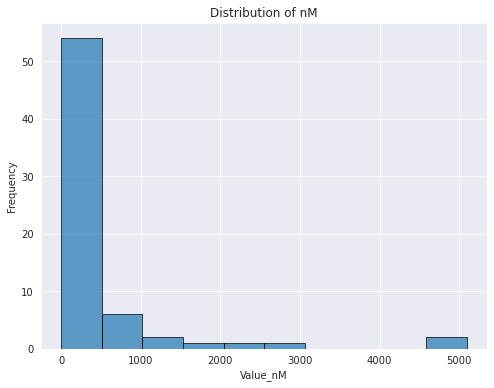

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution of the 'class' column
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['value_nM'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of nM')
plt.xlabel('Value_nM')
plt.ylabel('Frequency')
plt.show()


In [121]:
df.to_csv('IFPs_active_MCHR1.csv', index=False)

In [57]:
df[(df['class'] == 1) & (df['value_nM'] < 10000)]

protein         ILE11.A     MET15.A     PHE19.A     LEU57.A     VAL60.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
0                 False       False       False       False       False   
1                 False       False       False       False       False   
2                 False       False       False       False       False   
3                 False       False       False       False       False   
4                 False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
3209              False       False       False       False       False   
3210              False       False       False       False       False   
3211              False       False       False       False       False   
3212              False       False       False       False       False   
3213              False       False       False       False       False   

protein         ASP61.A             PHE64.A                      ...  \
interaction Hydrophobic HBDonor Hydrophobic CationPi PiStacking  ...   
Frame                                                            ...   
0                 False   False       False    False      False  ...   
1                 False   False        True    False      False  ...   
2                 False   False       False    False      False  ...   
3                 False   False        True    False      False  ...   
4                 False   False       False    False      False  ...   
...                 ...     ...         ...      ...        ...  ...   
3209              False   False       False    False      False  ...   
3210              False   False       False    False      False  ...   
3211              False   False       False    False      False  ...   
3212              False   False       False    False      False  ...   
3213              False   False        True    False      False  ...   

protein        ALA274.A    ASN275.A                       SER276.A  \
interaction Hydrophobic Hydrophobic HBDonor HBAcceptor Hydrophobic   
Frame                                                                
0                 False       False   False      False       False   
1                 False       False   False      False       False   
2                 False        True   False      False       False   
3                 False       False   False      False       False   
4                 False       False   False      False       False   
...                 ...         ...     ...        ...         ...   
3209              False       False   False      False       False   
3210              False       False   False      False       False   
3211              False        True   False      False       False   
3212              False       False   False      False       False   
3213              False       False   False      False       False   

protein        ASN279.A            class value_nM  \
interaction Hydrophobic HBAcceptor                  
Frame                                               
0                 False      False     1     39.5   
1                 False      False     1      5.6   
2                 False      False     1    640.0   
3                 False      False     1    140.0   
4                 False      False     1     76.0   
...                 ...        ...   ...      ...   
3209              False      False     1      4.8   
3210              False      False     1    181.0   
3211              False      False     1     48.0   
3212              False      False     1   3000.0   
3213              False      False     1     57.0   

protein                                               Scaffold  
interaction                                                     
Frame                                                           
0            c1ccc(C[

In [55]:
df[(df['class'] == 1) & (df['value_nM'] > 10000)]

protein         ILE11.A     MET15.A     PHE19.A     LEU57.A     VAL60.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
191               False       False       False       False       False   
800               False       False       False       False       False   
965               False       False       False       False       False   
1202              False       False       False       False       False   
1273              False       False       False       False       False   
1921              False       False       False       False       False   
2278              False       False       False       False       False   
2464              False       False       False       False       False   
3065              False       False       False       False       False   

protein         ASP61.A             PHE64.A                      ...  \
interaction Hydrophobic HBDonor Hydrophobic CationPi PiStacking  ...   
Frame                                                            ...   
191               False   False        True    False      False  ...   
800                True   False        True    False      False  ...   
965               False   False        True    False      False  ...   
1202              False   False        True    False      False  ...   
1273              False   False       False    False      False  ...   
1921              False   False       False    False      False  ...   
2278              False   False        True    False      False  ...   
2464              False   False        True    False      False  ...   
3065              False   False        True    False      False  ...   

protein        ALA274.A    ASN275.A                       SER276.A  \
interaction Hydrophobic Hydrophobic HBDonor HBAcceptor Hydrophobic   
Frame                                                                
191               False        True   False       True       False   
800               False        True   False       True        True   
965               False        True   False      False       False   
1202              False       False   False      False       False   
1273              False       False   False      False       False   
1921              False       False   False      False       False   
2278              False        True   False       True       False   
2464              False       False   False      False       False   
3065              False       False   False      False       False   

protein        ASN279.A            class      value_nM  \
interaction Hydrophobic HBAcceptor                       
Frame                                                    
191               False      False     1  15012.500000   
800               False      False     1  50320.000000   
965               False      False     1  50017.500000   
1202              False      False     1  50050.000000   
1273              False      False     1  50035.000000   
1921              False      False     1  13341.666667   
2278              False      False     1  51205.000000   
2464              False      False     1  50030.000000   
3065              False      False     1  50010.000000   

protein                                               Scaffold  
interaction                                                     
Frame                                                           
191                           O=C(COc1ccccc1)Nc1ccc2nc[nH]c2c1  
800                          O=C(Nc1ccccc1)c1ccc(-c2ccccc2)cc1  
965                                    O=C(Nc1ccccc1)Nc1ccccc1  
1202                                   O=C(Nc1ccccc1)Nc1ccccc1  
1273         O=C(Nc1ccc(C(=O)NCCC[NH+]2CCOCC2)cc1)Nc1cccc(O...  
1921         O=C(c1nnc(-c2ccccc2)o1)N1CC(Oc2ccc(C[NH+]3CC4(...  
2278                         O=C(Nc1ccccc1)c1ccc(-c2ccccc2)cc1  
2464                                   O=C(Nc1

In [48]:
df[df['class'] == 1]

protein         ILE11.A     MET15.A     PHE19.A     LEU57.A     VAL60.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
0                 False       False       False       False       False   
1                 False       False       False       False       False   
2                 False       False       False       False       False   
3                 False       False       False       False       False   
4                 False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
3209              False       False       False       False       False   
3210              False       False       False       False       False   
3211              False       False       False       False       False   
3212              False       False       False       False       False   
3213              False       False       False       False       False   

protein         ASP61.A             PHE64.A                      ...  \
interaction Hydrophobic HBDonor Hydrophobic CationPi PiStacking  ...   
Frame                                                            ...   
0                 False   False       False    False      False  ...   
1                 False   False        True    False      False  ...   
2                 False   False       False    False      False  ...   
3                 False   False        True    False      False  ...   
4                 False   False       False    False      False  ...   
...                 ...     ...         ...      ...        ...  ...   
3209              False   False       False    False      False  ...   
3210              False   False       False    False      False  ...   
3211              False   False       False    False      False  ...   
3212              False   False       False    False      False  ...   
3213              False   False        True    False      False  ...   

protein        ALA274.A    ASN275.A                       SER276.A  \
interaction Hydrophobic Hydrophobic HBDonor HBAcceptor Hydrophobic   
Frame                                                                
0                 False       False   False      False       False   
1                 False       False   False      False       False   
2                 False        True   False      False       False   
3                 False       False   False      False       False   
4                 False       False   False      False       False   
...                 ...         ...     ...        ...         ...   
3209              False       False   False      False       False   
3210              False       False   False      False       False   
3211              False        True   False      False       False   
3212              False       False   False      False       False   
3213              False       False   False      False       False   

protein        ASN279.A            class value_nM  \
interaction Hydrophobic HBAcceptor                  
Frame                                               
0                 False      False     1     39.5   
1                 False      False     1      5.6   
2                 False      False     1    640.0   
3                 False      False     1    140.0   
4                 False      False     1     76.0   
...                 ...        ...   ...      ...   
3209              False      False     1      4.8   
3210              False      False     1    181.0   
3211              False      False     1     48.0   
3212              False      False     1   3000.0   
3213              False      False     1     57.0   

protein                                               Scaffold  
interaction                                                     
Frame                                                           
0            c1ccc(C[

In [42]:
df['value_nM'] = df['value_nM'].astype(float)

In [47]:
df['class'] = df['class'].astype(int)

In [34]:
df[(df[('ASP95.A', 'HBDonor')] == True)]

protein         ILE11.A     MET15.A     PHE19.A     LEU57.A     VAL60.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
58                False       False       False       False       False   
76                False       False       False       False       False   
85                False       False       False       False       False   
98                False       False       False       False       False   
130               False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
2878              False       False       False       False       False   
2897              False       False       False       False       False   
2925              False       False       False       False       False   
2990              False       False       False       False       False   
2992              False       False       False       False       False   

protein         ASP61.A             PHE64.A                         GLY67.A  \
interaction Hydrophobic HBDonor Hydrophobic CationPi PiStacking Hydrophobic   
Frame                                                                         
58                False   False        True    False      False       False   
76                False   False        True    False      False       False   
85                False   False       False    False      False       False   
98                False   False        True    False      False       False   
130               False   False        True    False      False       False   
...                 ...     ...         ...      ...        ...         ...   
2878              False   False        True    False      False       False   
2897              False   False        True    False      False       False   
2925              False   False       False    False      False       False   
2990              False   False        True    False      False       False   
2992              False   False        True    False      False       False   

protein         MET68.A     MET71.A     GLN74.A                     \
interaction Hydrophobic Hydrophobic Hydrophobic HBDonor HBAcceptor   
Frame                                                                
58                False       False       False   False      False   
76                False       False        True   False      False   
85                False       False        True   False      False   
98                False       False       False   False      False   
130               False       False       False   False      False   
...                 ...         ...         ...     ...        ...   
2878              False       False       False   False      False   
2897              False       False       False   False      False   
2925              False       False        True   False      False   
2990              False       False       False   False      False   
2992              False       False       False   False      False   

protein         LEU75.A     GLY79.A     ILE91.A     THR92.A     MET94.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
58                False       False       False       False       False   
76                False       False       False       False       False   
85                False       False       False       False       False   
98                False       False       False       False       False   
130               False       False       False        True       False   
...                 ...         ...         ...         ...         ...   
2878              False       False       False        True       False   
2897              False       False       False       False       False   
2925              False       False 

In [35]:
df[(df[('TRP241.A', 'HBAcceptor')] == True) & (df[('ASP95.A', 'HBDonor')] == True)]

protein         ILE11.A     MET15.A     PHE19.A     LEU57.A     VAL60.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
975               False       False       False       False       False   
2040              False       False       False       False       False   
2234              False       False       False       False       False   

protein         ASP61.A             PHE64.A                         GLY67.A  \
interaction Hydrophobic HBDonor Hydrophobic CationPi PiStacking Hydrophobic   
Frame                                                                         
975               False   False        True    False      False       False   
2040              False   False        True    False      False       False   
2234              False   False        True    False      False       False   

protein         MET68.A     MET71.A     GLN74.A                     \
interaction Hydrophobic Hydrophobic Hydrophobic HBDonor HBAcceptor   
Frame                                                                
975               False       False       False   False      False   
2040              False       False       False   False      False   
2234              False       False       False   False      False   

protein         LEU75.A     GLY79.A     ILE91.A     THR92.A     MET94.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
975               False       False       False       False       False   
2040              False       False       False       False       False   
2234              False       False       False       False       False   

protein         ASP95.A                      ALA96.A     SER98.A          \
interaction Hydrophobic HBDonor Cationic Hydrophobic Hydrophobic HBDonor   
Frame                                                                      
975                True    True    False       False       False   False   
2040               True    True    False       False        True    True   
2234               True    True    False       False       False   False   

protein         GLN99.A                       PHE100.A               SER102.A  \
interaction Hydrophobic HBDonor HBAcceptor Hydrophobic PiStacking Hydrophobic   
Frame                                                                           
975                True   False      False       False      False       False   
2040               True   False      False       False      False        True   
2234               True   False      False       False      False       False   

protein                           THR103.A    TYR104.A    LEU106.A  \
interaction HBDonor HBAcceptor Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                
975           False      False       False       False       False   
2040          False      False       False       False        True   
2234          False      False       False       False       False   

protein        PRO149.A    VAL150.A    TYR153.A    ALA154.A    ARG155.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
975               False       False       False       False       False   
2040              False       False       False       False       False   
2234              False        True       False       False       False   

protein        ILE157.A    PHE159.A                        ALA163.A  \
interaction Hydrophobic Hydrophobic CationPi PiStacking Hydrophobic   
Frame                                                                 
975                True        True    False      False       False   
2040              False       False    False      False       False   
2234              False       F

In [43]:
df

protein        SER621.A            LEU622.A            THR623.A          \
interaction Hydrophobic HBDonor Hydrophobic HBDonor Hydrophobic HBDonor   
Frame                                                                     
0                 False   False        True    True        True   False   
1                 False   False        True   False        True   False   
2                 False   False       False   False        True   False   
3                 False   False        True   False       False   False   
4                 False   False       False   False        True   False   
...                 ...     ...         ...     ...         ...     ...   
7710              False   False        True   False        True   False   
7711              False   False       False   False       False   False   
7712              False   False       False   False        True    True   
7713              False   False       False   False       False   False   
7714              False   False       False   False       False   False   

protein        SER624.A                       VAL625.A    VAL644.A  \
interaction Hydrophobic HBDonor HBAcceptor Hydrophobic Hydrophobic   
Frame                                                                
0                  True   False      False       False       False   
1                  True   False      False       False       False   
2                  True   False      False       False       False   
3                  True   False      False       False       False   
4                 False    True      False       False       False   
...                 ...     ...        ...         ...         ...   
7710               True   False      False       False       False   
7711              False   False      False       False       False   
7712               True   False      False       False       False   
7713              False   False      False       False       False   
7714              False   False      False       False       False   

protein        MET645.A            LEU646.A    GLY648.A            SER649.A  \
interaction Hydrophobic HBDonor Hydrophobic Hydrophobic HBDonor Hydrophobic   
Frame                                                                         
0                 False   False       False        True   False        True   
1                 False   False       False        True   False        True   
2                 False   False       False       False   False       False   
3                 False   False       False        True   False        True   
4                 False   False       False       False   False       False   
...                 ...     ...         ...         ...     ...         ...   
7710              False   False       False        True   False        True   
7711              False   False       False       False   False       False   
7712              False   False       False        True   False        True   
7713              False   False       False       False   False       False   
7714              False   False       False       False   False       False   

protein                TYR652.A                       ALA653.A          \
interaction HBDonor Hydrophobic HBDonor PiStacking Hydrophobic HBDonor   
Frame                                                                    
0             False        True   False      False       False   False   
1             False       False   False      False       False   False   
2             False        True   False      False       False   False   
3             False        True   False      False       False   False   
4             False        True   False      False       False   False   
...             ...         ...     ...        ...         ...     ...   
7710          False       False   False      False       False   False   
7711          False       False   False      False        True   False   
7712          False        True   False      Fa

In [32]:
df_active = df.loc[df['class'] == '1']
del df_active['class']

In [33]:
df_inactive = df.loc[df['class'] == '0']
del df_inactive['class']

In [34]:
df_active

protein        SER621.A            LEU622.A            THR623.A          \
interaction Hydrophobic HBDonor Hydrophobic HBDonor Hydrophobic HBDonor   
Frame                                                                     
2                 False   False       False   False        True   False   
3                 False   False        True   False       False   False   
6                 False   False        True   False        True   False   
7                 False   False        True   False        True    True   
9                 False   False       False   False        True   False   
...                 ...     ...         ...     ...         ...     ...   
7690              False   False       False   False       False   False   
7693              False   False        True   False       False   False   
7695              False   False       False   False       False   False   
7700              False   False       False   False        True   False   
7713              False   False       False   False       False   False   

protein        SER624.A                       VAL625.A    VAL644.A  \
interaction Hydrophobic HBDonor HBAcceptor Hydrophobic Hydrophobic   
Frame                                                                
2                  True   False      False       False       False   
3                  True   False      False       False       False   
6                  True   False      False       False       False   
7                  True   False      False       False       False   
9                  True   False      False       False       False   
...                 ...     ...        ...         ...         ...   
7690              False   False      False       False       False   
7693               True   False      False       False       False   
7695              False   False      False       False       False   
7700              False   False      False       False       False   
7713              False   False      False       False       False   

protein        MET645.A            LEU646.A    GLY648.A            SER649.A  \
interaction Hydrophobic HBDonor Hydrophobic Hydrophobic HBDonor Hydrophobic   
Frame                                                                         
2                 False   False       False       False   False       False   
3                 False   False       False        True   False        True   
6                  True   False       False        True   False        True   
7                 False   False       False        True   False        True   
9                 False   False       False       False   False        True   
...                 ...     ...         ...         ...     ...         ...   
7690              False   False       False       False   False       False   
7693               True   False       False        True   False        True   
7695              False   False       False       False   False       False   
7700              False   False       False       False   False       False   
7713              False   False       False       False   False       False   

protein                TYR652.A                       ALA653.A          \
interaction HBDonor Hydrophobic HBDonor PiStacking Hydrophobic HBDonor   
Frame                                                                    
2             False        True   False      False       False   False   
3             False        True   False      False       False   False   
6             False        True   False      False        True   False   
7             False        True   False      False        True   False   
9             False        True   False      False       False   False   
...             ...         ...     ...        ...         ...     ...   
7690          False       False   False      False       False   False   
7693          False       False   False      False       False   False   
7695          False       False   False      Fa

In [35]:
res_active = df_active.apply(np.sum, axis=0)

In [36]:
res_inactive = df_inactive.apply(np.sum, axis=0)

In [37]:
res_inactive

protein   interaction
SER621.A  Hydrophobic      38
          HBDonor           1
LEU622.A  Hydrophobic    1325
          HBDonor         248
THR623.A  Hydrophobic    2460
                         ... 
ALA653.D  HBDonor           2
PHE656.D  Hydrophobic     874
          CationPi          2
          PiStacking      204
GLY657.D  Hydrophobic       2
Length: 105, dtype: int64

In [38]:
res = res_active - res_inactive

In [39]:
pd.set_option('display.max_rows', None)

In [40]:
res.sort_values(ascending=False)

protein   interaction
MET645.A  Hydrophobic     66
LEU622.B  Hydrophobic     57
PHE656.B  Hydrophobic     54
MET645.C  Hydrophobic     43
MET645.B  Hydrophobic     34
SER621.C  Hydrophobic     28
PHE656.A  PiStacking      20
ALA653.B  Hydrophobic     18
MET645.D  Hydrophobic     13
THR623.B  HBDonor          9
MET645.B  HBDonor          8
ALA653.C  Hydrophobic      7
SER621.A  Hydrophobic      6
VAL625.B  Hydrophobic      6
PHE656.D  CationPi         5
GLY648.B  Hydrophobic      5
GLY657.D  Hydrophobic      5
VAL644.A  Hydrophobic      5
VAL625.D  Hydrophobic      4
SER649.C  HBDonor          3
GLY657.B  Hydrophobic      2
TYR652.C  CationPi         2
PHE656.A  CationPi         2
SER621.B  HBDonor          2
SER624.A  HBAcceptor       2
SER654.B  Hydrophobic      1
PHE656.C  CationPi         1
VAL625.A  Hydrophobic      1
GLY657.A  Hydrophobic      1
SER621.A  HBDonor          1
TYR652.D  CationPi         1
TYR652.C  HBDonor          0
PHE656.B  CationPi         0
TYR652.B  HBDonor    

In [42]:
pd.set_option('display.max_rows', 10)

In [165]:
#df = df.droplevel("Frame", axis=1)

In [51]:
def rename(df):
    names = []
    for i in df.columns:
        res = i[0] + '_'+ i[1]
        names.append(res)
    df.columns = names
    return df


In [52]:
import collections

In [53]:
df_old = df.iloc[:, :-1]

In [54]:
cnt = collections.Counter()

In [55]:
k = []
for i in df_old.columns:
    k.append(i[0][:-1]+i[1])
for i in k:
    cnt[i] += 1
cnt

Counter({'ILE11.Hydrophobic': 1,
         'MET15.Hydrophobic': 1,
         'PHE19.Hydrophobic': 1,
         'LEU57.Hydrophobic': 1,
         'VAL60.Hydrophobic': 1,
         'ASP61.Hydrophobic': 1,
         'ASP61.HBDonor': 1,
         'PHE64.Hydrophobic': 1,
         'PHE64.CationPi': 1,
         'PHE64.PiStacking': 1,
         'GLY67.Hydrophobic': 1,
         'MET68.Hydrophobic': 1,
         'MET71.Hydrophobic': 1,
         'GLN74.Hydrophobic': 1,
         'GLN74.HBDonor': 1,
         'GLN74.HBAcceptor': 1,
         'LEU75.Hydrophobic': 1,
         'GLY79.Hydrophobic': 1,
         'ILE91.Hydrophobic': 1,
         'THR92.Hydrophobic': 1,
         'MET94.Hydrophobic': 1,
         'ASP95.Hydrophobic': 1,
         'ASP95.HBDonor': 1,
         'ASP95.Cationic': 1,
         'ALA96.Hydrophobic': 1,
         'SER98.Hydrophobic': 1,
         'SER98.HBDonor': 1,
         'GLN99.Hydrophobic': 1,
         'GLN99.HBDonor': 1,
         'GLN99.HBAcceptor': 1,
         'PHE100.Hydrophobic': 1,
     

In [56]:
k.index('LEU553.Hydrophobic')

ValueError: 'LEU553.Hydrophobic' is not in list

In [57]:
df.columns[0][0]

'ILE11.A'

In [58]:
df_new = df.iloc[: , :1]

In [59]:
df_new

protein         ILE11.A
interaction Hydrophobic
Frame                  
0                 False
1                 False
2                 False
3                 False
4                 False
...                 ...
3111              False
3112              False
3113              False
3114              False
3115              False

[3116 rows x 1 columns]

In [174]:
#df["sum"] = df.iloc[:,0]+df.iloc[:,11]

In [94]:
#df

In [61]:
k_no_dubles = list(set(k))

In [62]:
len(k)

116

In [199]:
df_new[f"{i}"] = df.iloc[:, indices].sum(axis=1)

'clas'

In [63]:
for elem in k_no_dubles:
    indices = [i for i, x in enumerate(k) if x == elem]
    #print(indices)
    if len(indices) == 4:
        print(indices)
        df_new[elem] = df_old.iloc[:, indices].sum(axis=1)
    elif len(indices) == 1:
        df_new[elem] = df_old.iloc[:, indices]
        
        

/tmp/ipykernel_13393/802527290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[elem] = df_old.iloc[:, indices]
/tmp/ipykernel_13393/802527290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[elem] = df_old.iloc[:, indices]
/tmp/ipykernel_13393/802527290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [64]:
df_new = df_new.iloc[: , 1:]

In [65]:
df_new = df_new.astype(int)
df_new

protein     ASN266.Hydrophobic PRO192.Hydrophobic GLY167.Hydrophobic  \
interaction                                                            
Frame                                                                  
0                            1                  0                  1   
1                            0                  0                  1   
2                            0                  0                  1   
3                            0                  0                  0   
4                            0                  0                  1   
...                        ...                ...                ...   
3111                         0                  0                  1   
3112                         0                  0                  1   
3113                         0                  0                  1   
3114                         0                  0                  1   
3115                         0                  0                  1   

protein     ILE157.Hydrophobic ALA274.Hydrophobic ILE91.Hydrophobic  \
interaction                                                           
Frame                                                                 
0                            0                  0                 0   
1                            0                  0                 0   
2                            0                  0                 0   
3                            0                  0                 0   
4                            0                  0                 0   
...                        ...                ...               ...   
3111                         0                  0                 0   
3112                         1                  0                 0   
3113                         0                  0                 0   
3114                         0                  0                 0   
3115                         0                  0                 0   

protein     PHE64.Hydrophobic TYR273.Hydrophobic ASN275.Hydrophobic  \
interaction                                                           
Frame                                                                 
0                           0                  0                  0   
1                           1                  1                  0   
2                           0                  1                  1   
3                           1                  1                  0   
4                           0                  1                  0   
...                       ...                ...                ...   
3111                        0                  1                  0   
3112                        0                  1                  0   
3113                        0                  1                  1   
3114                        0                  1                  0   
3115                        1                  1                  0   

protein     THR103.Hydrophobic PHE159.PiStacking PHE64.PiStacking  \
interaction                                                         
Frame                                                               
0                            0                 1                0   
1                            0                 0                0   
2                            0                 1                0   
3                            0                 0                0   
4                            0                 0                0   
...                        ...               ...              ...   
3111                         0                 1                0   
3112                         0                 0                0   
3113                         0                 0                0   
3114                         0                 0                0   
3115                         0                 1                0   

protein     SER102.HBAcceptor TYR1

In [66]:
df

protein         ILE11.A     MET15.A     PHE19.A     LEU57.A     VAL60.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
0                 False       False       False       False       False   
1                 False       False       False       False       False   
2                 False       False       False       False       False   
3                 False       False       False       False       False   
4                 False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
3111              False       False       False       False       False   
3112              False       False       False       False       False   
3113              False       False       False       False       False   
3114              False       False       False       False       False   
3115              False       False       False       False       False   

protein         ASP61.A             PHE64.A                         GLY67.A  \
interaction Hydrophobic HBDonor Hydrophobic CationPi PiStacking Hydrophobic   
Frame                                                                         
0                 False   False       False    False      False       False   
1                 False   False        True    False      False       False   
2                 False   False       False    False      False       False   
3                 False   False        True    False      False       False   
4                 False   False       False    False      False       False   
...                 ...     ...         ...      ...        ...         ...   
3111              False   False       False    False      False       False   
3112              False   False       False    False      False       False   
3113              False   False       False    False      False       False   
3114              False   False       False    False      False       False   
3115              False   False        True    False      False       False   

protein         MET68.A     MET71.A     GLN74.A                     \
interaction Hydrophobic Hydrophobic Hydrophobic HBDonor HBAcceptor   
Frame                                                                
0                 False       False        True   False      False   
1                 False       False       False   False      False   
2                 False       False        True   False      False   
3                 False       False       False   False      False   
4                 False       False       False   False      False   
...                 ...         ...         ...     ...        ...   
3111              False       False        True   False      False   
3112              False       False       False   False      False   
3113              False       False       False   False      False   
3114              False       False       False   False      False   
3115              False       False        True   False      False   

protein         LEU75.A     GLY79.A     ILE91.A     THR92.A     MET94.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
0                  True       False       False       False       False   
1                 False       False       False       False       False   
2                 False       False       False       False       False   
3                 False       False       False       False       False   
4                 False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
3111              False       False       False        True       False   
3112              False       False       False       False       False   
3113              False       False 

# Only after that you can add class

In [69]:
df_new["class"] = df_10000["Class"]
df_new["Scaffold"] = df_10000["Scaffold"]
df_new["value_nM"] = df_10000["Value_nM"]

In [72]:
df_new['class'].value_counts()

1    3021
Name: class, dtype: int64

In [76]:
index = pd.MultiIndex.from_tuples(df_new.keys(), names=['protein', 'interaction'])
df_new = pd.DataFrame(df_new, columns=index)

In [77]:
df_new.columns = df_new.columns.droplevel(1)


In [79]:
df_new.columns.name = 'ligand'

In [82]:
df_new = df_new.drop(columns=['class', 'Scaffold', 'value_nM'])

In [83]:
df_new["class"] = df_10000["Class"]
df_new["Scaffold"] = df_10000["Scaffold"]
df_new["value_nM"] = df_10000["Value_nM"]

In [84]:
df_new['class'].value_counts()

1    3021
Name: class, dtype: int64

In [86]:
df_new.columns

Index(['ASN266.Hydrophobic', 'PRO192.Hydrophobic', 'GLY167.Hydrophobic',
       'ILE157.Hydrophobic', 'ALA274.Hydrophobic', 'ILE91.Hydrophobic',
       'PHE64.Hydrophobic', 'TYR273.Hydrophobic', 'ASN275.Hydrophobic',
       'THR103.Hydrophobic',
       ...
       'PHE180.Hydrophobic', 'SER98.HBDonor', 'SER276.Hydrophobic',
       'ASN266.HBAcceptor', 'VAL164.Hydrophobic', 'ALA163.Hydrophobic',
       'GLY79.Hydrophobic', 'class', 'Scaffold', 'value_nM'],
      dtype='object', name='ligand', length=119)

In [90]:
df_new.columns

Index(['ASN266.Hydrophobic', 'PRO192.Hydrophobic', 'GLY167.Hydrophobic',
       'ILE157.Hydrophobic', 'ALA274.Hydrophobic', 'ILE91.Hydrophobic',
       'PHE64.Hydrophobic', 'TYR273.Hydrophobic', 'ASN275.Hydrophobic',
       'THR103.Hydrophobic',
       ...
       'PHE180.Hydrophobic', 'SER98.HBDonor', 'SER276.Hydrophobic',
       'ASN266.HBAcceptor', 'VAL164.Hydrophobic', 'ALA163.Hydrophobic',
       'GLY79.Hydrophobic', 'class', 'Scaffold', 'value_nM'],
      dtype='object', name='ligand', length=119)

In [92]:
df_list = df_new.columns.tolist()

In [94]:
df_new = df_new.columns.get_level_values(0)

In [95]:
df_new

Index(['ASN266.Hydrophobic', 'PRO192.Hydrophobic', 'GLY167.Hydrophobic',
       'ILE157.Hydrophobic', 'ALA274.Hydrophobic', 'ILE91.Hydrophobic',
       'PHE64.Hydrophobic', 'TYR273.Hydrophobic', 'ASN275.Hydrophobic',
       'THR103.Hydrophobic',
       ...
       'PHE180.Hydrophobic', 'SER98.HBDonor', 'SER276.Hydrophobic',
       'ASN266.HBAcceptor', 'VAL164.Hydrophobic', 'ALA163.Hydrophobic',
       'GLY79.Hydrophobic', 'class', 'Scaffold', 'value_nM'],
      dtype='object', name='ligand', length=119)

In [133]:
#df_new = df_new.iloc[:, :-1]

In [73]:
len(indices)

4

In [44]:
df = df.astype(int)

In [52]:
def rename(df):
    names = []
    for i in df.columns:
        res = i[0] + '_'+ i[1]
        names.append(res)
    df.columns = names
    return df

In [53]:
df = rename(df)

In [58]:
#df['LEU553.A_Hydrophobic']

In [68]:
df = df.astype(int)

In [54]:
df

SER621.A_Hydrophobic  SER621.A_HBDonor  LEU622.A_Hydrophobic  \
Frame                                                                 
0                         0                 0                     1   
1                         0                 0                     1   
2                         0                 0                     0   
3                         0                 0                     1   
4                         0                 0                     0   
...                     ...               ...                   ...   
7710                      0                 0                     1   
7711                      0                 0                     0   
7712                      0                 0                     0   
7713                      0                 0                     0   
7714                      0                 0                     0   

       LEU622.A_HBDonor  THR623.A_Hydrophobic  THR623.A_HBDonor  \
Frame                                                             
0                     1                     1                 0   
1                     0                     1                 0   
2                     0                     1                 0   
3                     0                     0                 0   
4                     0                     1                 0   
...                 ...                   ...               ...   
7710                  0                     1                 0   
7711                  0                     0                 0   
7712                  0                     1                 1   
7713                  0                     0                 0   
7714                  0                     0                 0   

       SER624.A_Hydrophobic  SER624.A_HBDonor  SER624.A_HBAcceptor  \
Frame                                                                
0                         1                 0                    0   
1                         1                 0                    0   
2                         1                 0                    0   
3                         1                 0                    0   
4                         0                 1                    0   
...                     ...               ...                  ...   
7710                      1                 0                    0   
7711                      0                 0                    0   
7712                      1                 0                    0   
7713                      0                 0                    0   
7714                      0                 0                    0   

       VAL625.A_Hydrophobic  VAL644.A_Hydrophobic  MET645.A_Hydrophobic  \
Frame                                                                     
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
7710                      0                     0                     0   
7711                      0                     0                     0   
7712                      0                     0                     0   
7713                      0                     0                     0   
7714                      0                     0                     0   

       MET645.A_HBDonor  LEU646.A_Hydrophobic  GLY648.A_Hydrophobic  \
Frame                                                                 
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                 

In [70]:
df1 = PandasTools.LoadSDF('herg_dimer_IFP.sdf',molColName='Mol', removeHs=False, includeFingerprints=True)

s_m_entry_id               s_m_entry_name  s_m_job_name  \
0           66164   herg_out_smaller_right.421  ligprep_herg   
1           66165  herg_out_smaller_right.1235  ligprep_herg   
2           66166  herg_out_smaller_right.5119  ligprep_herg   
3           66167  herg_out_smaller_right.1050  ligprep_herg   
4           66168  herg_out_smaller_right.1213  ligprep_herg   
...           ...                          ...           ...   
7711        84045  herg_out_smaller_right.3570  ligprep_herg   
7712        84058  herg_out_smaller_right.2821  ligprep_herg   
7713        84075  herg_out_smaller_right.3565  ligprep_herg   
7714        84165  herg_out_smaller_right.2838  ligprep_herg   
7715        84186  herg_out_smaller_right.2837  ligprep_herg   

     s_canvas_standard\_relation s_canvas_standard\_type  \
0                              =                    IC50   
1                              >                    IC50   
2                              =                    IC50   
3                              >                    IC50   
4                              =                    IC50   
...                          ...                     ...   
7711                           >                    IC50   
7712                           >                    IC50   
7713                           >                    IC50   
7714                           >                    IC50   
7715                           >                    IC50   

     s_canvas_standard\_units s_canvas_units r_canvas_value       r_canvas_MW  \
0                          nM             nM             54           574.581   
1                          nM             uM           31.6           550.629   
2                          nM             uM            0.9  616.649999999999   
3                          nM             uM           31.6           601.044   
4                          nM             uM           4.04           536.602   
...                       ...            ...            ...               ...   
7711                       nM             uM             50           510.557   
7712                       nM             uM            100           475.567   
7713                       nM             uM             50           510.601   
7714                       nM             uM            100           437.606   
7715                       nM             uM            100           431.558   

     r_canvas_value\_nM i_canvas_class    r_canvas_pIC50  \
0                    54              1  7.26760624017703   
1                 31600              0  4.50031291738159   
2                   900              1  6.04575749056067   
3                 31600              0  4.50031291738159   
4                  4040              1  5.39361863488939   
...                 ...            ...               ...   
7711              50000              0  4.30102999566398   
7712             100000              0                 4   
7713              50000              0  4.30102999566398   
7714             100000              0                 4   
7715             100000              0                 4   

                                s_m_Source_Path              s_m_Source_File  \
0     /opt/schrodinger2020-3/glide-dock_SP_HERG  glide-dock_SP_HERG_pv.maegz   
1     /opt/schrodinger2020-3/glide-dock_SP_HERG  glide-dock_SP_HERG_pv.maegz   
2     /opt/schrodinger2020-3/glide-dock_SP_HERG  glide-dock_SP_HERG_pv.maegz   
3     /opt/schrodinger2020-3/glide-dock_SP_HERG  glide-dock_SP_HERG_pv.maegz   
4     /opt/schrodinger2020-3/glide-dock_SP_HERG  glide-dock_SP_HERG_pv.maegz   
...                                         ...                          ...   
7711  /opt/schrodinger2020-3/glide-dock_SP_HERG  glide-dock_SP_HERG_pv.maegz   
7712  /opt/schrodinger2020-3/glide-dock_SP_HERG  glide-dock_SP_HERG_pv.maegz   
7713  /opt/schrodinger2020-3/glide-dock_SP_HERG  glide-dock_SP_HERG_pv.maegz   
7714  /opt/schrodinge
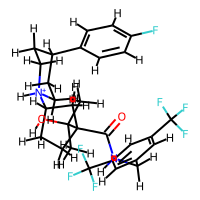
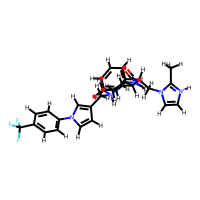
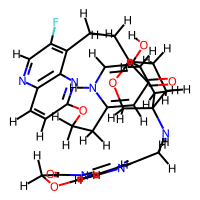
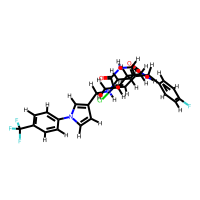
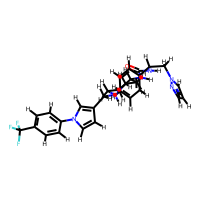
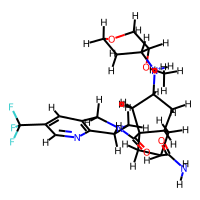
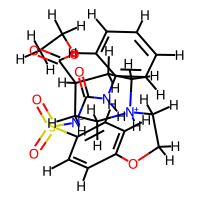
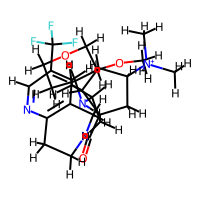
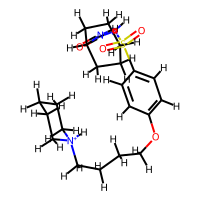
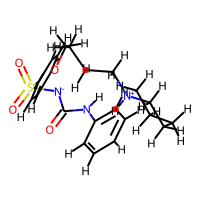

In [71]:
df1

In [72]:
df['canonical_smiles'] = df1['smiles']

In [73]:
df['RDMol'] = df1["Mol"]

In [74]:
df['CHEMBL_ID'] = df1["ID"]

In [75]:
df['class'] = df1['i_canvas_class']

In [77]:
df["pIC50"] = df1['r_canvas_pIC50']

In [88]:
df.columns

MultiIndex([( 'ILE11.A', 'Hydrophobic'),
            ( 'MET15.A', 'Hydrophobic'),
            ( 'PHE19.A', 'Hydrophobic'),
            ( 'LEU57.A', 'Hydrophobic'),
            ( 'VAL60.A', 'Hydrophobic'),
            ( 'ASP61.A', 'Hydrophobic'),
            ( 'ASP61.A',     'HBDonor'),
            ( 'PHE64.A', 'Hydrophobic'),
            ( 'PHE64.A',    'CationPi'),
            ( 'PHE64.A',  'PiStacking'),
            ...
            ('TYR273.A',     'HBDonor'),
            ('TYR273.A',  'HBAcceptor'),
            ('TYR273.A',  'PiStacking'),
            ('ALA274.A', 'Hydrophobic'),
            ('ASN275.A', 'Hydrophobic'),
            ('ASN275.A',     'HBDonor'),
            ('ASN275.A',  'HBAcceptor'),
            ('SER276.A', 'Hydrophobic'),
            ('ASN279.A', 'Hydrophobic'),
            ('ASN279.A',  'HBAcceptor')],
           name='ligand', length=117)

In [80]:
PandasTools.WriteSDF(df, 'herg_IFps.sdf', molColName='RDMol', properties=list(df.columns))

In [85]:
#! pip install catboost

In [84]:
#! pip install xgboost

In [103]:
from collections import Counter, defaultdict
import logging
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, std, zeros
from pandas import DataFrame
import pandas as pd
from pathlib import Path
import sys
from rdkit import Chem, DataStructs, RDConfig
from rdkit.Chem import AllChem, Descriptors, Draw, PandasTools, MolStandardize, DataStructs, ChemicalFeatures
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from IPython.display import display, display_png
import rdkit.rdBase as rkrb
import rdkit.RDLogger as rkl
from rdkit.Chem.Pharm2D.SigFactory import SigFactory
from rdkit.Chem.Pharm2D import Generate
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegressionCV, LinearRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.datasets import make_classification 
from tqdm import tqdm


In [56]:
df

SER621.A_Hydrophobic  SER621.A_HBDonor  LEU622.A_Hydrophobic  \
Frame                                                                 
0                         0                 0                     1   
1                         0                 0                     1   
2                         0                 0                     0   
3                         0                 0                     1   
4                         0                 0                     0   
...                     ...               ...                   ...   
7710                      0                 0                     1   
7711                      0                 0                     0   
7712                      0                 0                     0   
7713                      0                 0                     0   
7714                      0                 0                     0   

       LEU622.A_HBDonor  THR623.A_Hydrophobic  THR623.A_HBDonor  \
Frame                                                             
0                     1                     1                 0   
1                     0                     1                 0   
2                     0                     1                 0   
3                     0                     0                 0   
4                     0                     1                 0   
...                 ...                   ...               ...   
7710                  0                     1                 0   
7711                  0                     0                 0   
7712                  0                     1                 1   
7713                  0                     0                 0   
7714                  0                     0                 0   

       SER624.A_Hydrophobic  SER624.A_HBDonor  SER624.A_HBAcceptor  \
Frame                                                                
0                         1                 0                    0   
1                         1                 0                    0   
2                         1                 0                    0   
3                         1                 0                    0   
4                         0                 1                    0   
...                     ...               ...                  ...   
7710                      1                 0                    0   
7711                      0                 0                    0   
7712                      1                 0                    0   
7713                      0                 0                    0   
7714                      0                 0                    0   

       VAL625.A_Hydrophobic  VAL644.A_Hydrophobic  MET645.A_Hydrophobic  \
Frame                                                                     
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
7710                      0                     0                     0   
7711                      0                     0                     0   
7712                      0                     0                     0   
7713                      0                     0                     0   
7714                      0                     0                     0   

       MET645.A_HBDonor  LEU646.A_Hydrophobic  GLY648.A_Hydrophobic  \
Frame                                                                 
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df, df, shuffle=True, random_state=75, train_size=.8)

In [59]:
cv = RepeatedStratifiedKFold(n_splits=5, random_state=1, n_repeats=3)

In [60]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [63]:
clf = LogisticRegressionCV(cv = kf, max_iter = 10000).fit(X_train.iloc[: , :-1], X_train["class_"])

In [64]:
filename = 'LR_MFP_IFps_dimer.py'
import pickle
pickle.dump(clf, open(filename, 'wb'))

In [65]:
loaded_model_lr = pickle.load(open(filename, 'rb'))

In [229]:
y_test

protein     GLY657.HBDonor VAL625.Hydrophobic SER649.HBDonor  \
interaction                                                    
Frame                                                          
2075                     0                  0              0   
4412                     0                  0              0   
7642                     0                  0              0   
2631                     0                  0              0   
6213                     0                  0              0   
...                    ...                ...            ...   
349                      0                  0              0   
300                      0                  0              0   
270                      0                  0              0   
1923                     0                  0              0   
7456                     0                  0              0   

protein     TYR652.Hydrophobic PHE656.PiStacking PHE656.HBDonor  \
interaction                                                       
Frame                                                             
2075                         4                 0              0   
4412                         4                 0              0   
7642                         4                 0              0   
2631                         4                 0              0   
6213                         4                 0              0   
...                        ...               ...            ...   
349                          4                 0              0   
300                          4                 0              0   
270                          3                 0              0   
1923                         4                 0              0   
7456                         3                 0              0   

protein     ASN658.HBAcceptor ARG665.Hydrophobic ILE663.Hydrophobic  \
interaction                                                           
Frame                                                                 
2075                        0                  0                  0   
4412                        0                  0                  0   
7642                        0                  0                  0   
2631                        0                  0                  0   
6213                        0                  0                  0   
...                       ...                ...                ...   
349                         0                  0                  0   
300                         0                  0                  0   
270                         0                  0                  0   
1923                        0                  0                  0   
7456                        0                  0                  0   

protein     SER660.HBDonor THR623.Hydrophobic LEU666.Hydrophobic  \
interaction                                                        
Frame                                                              
2075                     0                  0                  0   
4412                     0                  0                  0   
7642                     0                  0                  0   
2631                     0                  0                  0   
6213                     0                  0                  0   
...                    ...                ...                ...   
349                      1                  0                  0   
300                      1                  0                  0   
270                      1                  0                  0   
1923                     0                  0                  0   
7456                     0                  0                  0   

protein     GLN664.Hydrophobic SER624.Hydrophobic ALA653.HBDonor  \
interaction                                                        
Frame                                                              
2075        

In [66]:
def print_metrics(y_test, X_test, clf):
    # считает все целевые метрики
    y_testf1 = np.transpose((np.array(y_test)).astype(np.int32))
    zt = list((clf.predict(X_test)).astype(np.int32))
    print(f"roc auc test_set = {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")
    print(f"bac test_set = {balanced_accuracy_score(y_test, clf.predict(X_test))}")
    print(f"acc test_set = {accuracy_score(y_test, clf.predict(X_test))}")
    print(f"f1_score ={f1_score(y_testf1, zt)}")
    print(f"recall_score ={recall_score(y_testf1, zt)}")
    print(f"precision_score ={precision_score(y_testf1, zt)}")

In [68]:
res = print_metrics(X_test["class_"], X_test.iloc[: , :-1], loaded_model_lr)

roc auc test_set = 0.583968835126898
bac test_set = 0.5533534940798879
acc test_set = 0.560596241088788
f1_score =0.4784615384615385
recall_score =0.42778541953232463
precision_score =0.5427574171029669


In [69]:
model1 = RandomForestClassifier().fit(X_train.iloc[: , :-1], X_train["class_"])

In [70]:
res = print_metrics(X_test["class_"], X_test.iloc[: , :-1], model1)

roc auc test_set = 0.6119620991450225
bac test_set = 0.5713599401246056
acc test_set = 0.576150356448477
f1_score =0.5205278592375366
recall_score =0.48830811554332876
precision_score =0.5572998430141287


In [198]:
X_train

protein     GLY657.HBDonor VAL625.Hydrophobic TYR652.Hydrophobic  \
interaction                                                        
Frame                                                              
1836                     0                  0                  4   
3912                     0                  0                  4   
45                       0                  0                  3   
6907                     0                  0                  4   
7291                     0                  0                  3   
...                    ...                ...                ...   
6280                     0                  0                  3   
5585                     0                  0                  3   
2067                     0                  0                  3   
368                      0                  0                  3   
4344                     0                  0                  3   

protein     PHE656.HBDonor SER654.HBDonor ILE663.Hydrophobic SER660.HBDonor  \
interaction                                                                   
Frame                                                                         
1836                     0              0                  0              0   
3912                     0              0                  0              0   
45                       0              0                  1              0   
6907                     0              0                  0              0   
7291                     1              0                  0              0   
...                    ...            ...                ...            ...   
6280                     0              0                  1              0   
5585                     0              0                  1              1   
2067                     0              0                  0              1   
368                      0              0                  0              1   
4344                     0              0                  0              0   

protein     TYR652.CationPi THR623.Hydrophobic MET645.Hydrophobic  \
interaction                                                         
Frame                                                               
1836                      0                  0                  0   
3912                      0                  0                  0   
45                        0                  0                  0   
6907                      0                  1                  0   
7291                      0                  1                  0   
...                     ...                ...                ...   
6280                      0                  0                  0   
5585                      0                  0                  0   
2067                      0                  0                  0   
368                       0                  0                  0   
4344                      0                  0                  0   

protein     GLN664.Hydrophobic SER621.Hydrophobic SER624.Hydrophobic  \
interaction                                                            
Frame                                                                  
1836                         1                  0                  1   
3912                         0                  0                  0   
45                           1                  0                  0   
6907                         1                  0                  2   
7291                         0                  0                  2   
...                        ...                ...                ...   
6280                         1                  0                  0   
5585                         1                  0                  0   
2067                         0                  0                  0   
368                          0                  0                  0   
4344                         0       

In [107]:
y_test = X_test["class"].astype("int64")
#y_test1 = df_val["class"].astype("int64")
probs = model1.predict_proba(X_test.iloc[: , :-5])
#probs1 = eclf.predict_proba(df_norm)
preds = probs[:,1]
#preds1 = probs1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label = 1)
#fpr1, tpr1, threshold1 = metrics.roc_curve(y_test1, preds1, pos_label = 1)
roc_auc = metrics.auc(fpr, tpr)
#roc_auc1 = metrics.auc(fpr1, tpr1)

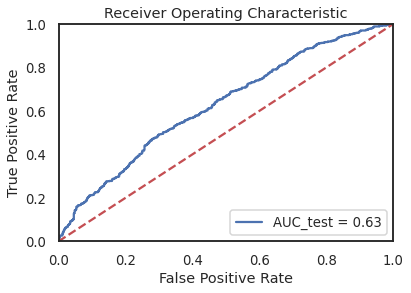

In [112]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC_test = %0.2f' % roc_auc)
#plt.plot(fpr1, tpr1, 'g', label = 'AUC_valid = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.show()
plt.savefig("IFPs_ROC.png", dpi=300, bbox_inches='tight')

LEU553.A_Hydrophobic  SER621.A_Hydrophobic  LEU622.A_Hydrophobic  \
Frame                                                                     
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
7711                      0                     0                     0   
7712                      0                     0                     0   
7713                      0                     0                     0   
7714                      0                     0                     0   
7715                      0                     0                     0   

       THR623.A_Hydrophobic  THR623.A_HBDonor  SER624.A_Hydrophobic  \
Frame                                                                 
0                         0                 0                     0   
1                         0                 0                     0   
2                         0                 0                     0   
3                         0                 0                     0   
4                         0                 0                     0   
...                     ...               ...                   ...   
7711                      0                 0                     0   
7712                      0                 0                     0   
7713                      0                 0                     0   
7714                      0                 0                     0   
7715                      0                 0                     0   

       SER624.A_HBDonor  VAL625.A_Hydrophobic  GLY648.A_Hydrophobic  \
Frame                                                                 
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   
...                 ...                   ...                   ...   
7711                  0                     0                     0   
7712                  0                     0                     0   
7713                  0                     0                     0   
7714                  0                     0                     0   
7715                  0                     0                     0   

       SER649.A_Hydrophobic  SER649.A_HBDonor  TYR652.A_Hydrophobic  \
Frame                                                                 
0                         0                 0                     1   
1                         0                 0                     1   
2                         0                 0                     1   
3                         0                 0                     1   
4                         0                 0                     1   
...                     ...               ...                   ...   
7711                      0                 0                     0   
7712                      0                 0                     1   
7713                      0                 0                     1   
7714                      0                 0                     1   
7715                      0                 0                     1   

       TYR652.A_HBDonor  TYR652.A_HBAcceptor  TYR652.A_CationPi  \
Frame                                                             
0                     0                    0                  0   
1                     0                    0              
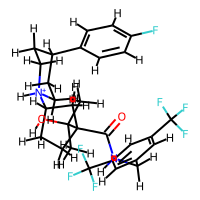
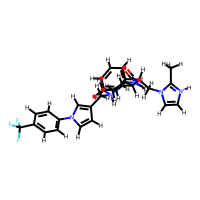
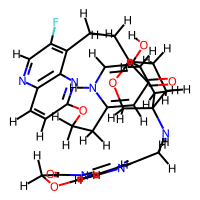
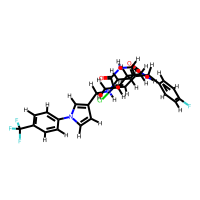
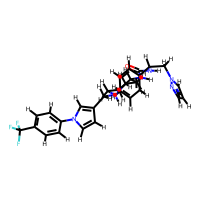
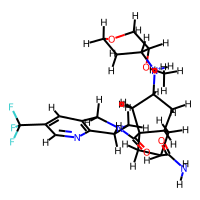
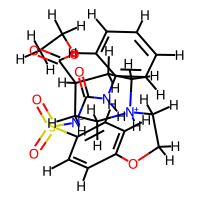
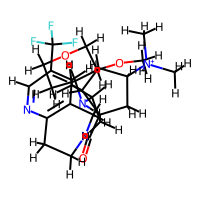
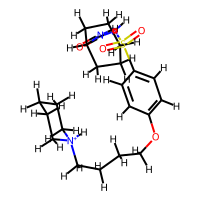
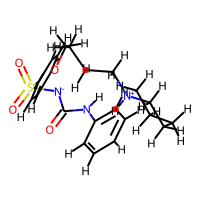

In [109]:
df

In [131]:
occ = df_active.mean()

In [132]:
occ.loc[occ > 0.7]

protein   interaction
TYR652.A  Hydrophobic    0.942981
ALA653.A  Hydrophobic    0.717078
TYR652.B  Hydrophobic    0.913114
TYR652.C  Hydrophobic    0.787402
TYR652.D  Hydrophobic    0.878903
dtype: float64

In [133]:
occ = df_inactive.mean()
occ.loc[occ > 0.7]

protein   interaction
TYR652.A  Hydrophobic    0.935780
ALA653.A  Hydrophobic    0.720803
TYR652.B  Hydrophobic    0.910736
TYR652.C  Hydrophobic    0.769402
TYR652.D  Hydrophobic    0.890900
dtype: float64

In [38]:
import seaborn as sns
import pandas as pd

In [41]:


# reorganize data
data = df.reset_index()
data = pd.melt(data, id_vars=["Frame"], var_name=["residue","interaction"])
data = data[data["value"] != False]
data.reset_index(inplace=True, drop=True)

In [142]:
df_inactive

protein        LEU553.A    SER621.A    LEU622.A    THR623.A          \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic HBDonor   
Frame                                                                 
1                 False       False       False       False   False   
3                 False       False       False       False   False   
6                 False       False       False       False   False   
7                 False       False       False       False   False   
9                 False       False       False       False   False   
...                 ...         ...         ...         ...     ...   
7711              False       False       False       False   False   
7712              False       False       False       False   False   
7713              False       False       False       False   False   
7714              False       False       False       False   False   
7715              False       False       False       False   False   

protein        SER624.A            VAL625.A    GLY648.A    SER649.A          \
interaction Hydrophobic HBDonor Hydrophobic Hydrophobic Hydrophobic HBDonor   
Frame                                                                         
1                 False   False       False       False       False   False   
3                 False   False       False       False       False   False   
6                 False   False       False       False       False   False   
7                 False   False       False       False       False   False   
9                 False   False       False       False       False   False   
...                 ...     ...         ...         ...         ...     ...   
7711              False   False       False       False       False   False   
7712              False   False       False       False       False   False   
7713              False   False       False       False       False   False   
7714              False   False       False       False       False   False   
7715              False   False       False       False       False   False   

protein        TYR652.A                                           ALA653.A  \
interaction Hydrophobic HBDonor HBAcceptor CationPi PiStacking Hydrophobic   
Frame                                                                        
1                  True   False      False    False       True       False   
3                  True   False      False    False      False        True   
6                  True   False      False    False       True        True   
7                  True   False      False    False      False        True   
9                 False   False      False    False      False       False   
...                 ...     ...        ...      ...        ...         ...   
7711              False   False      False    False      False       False   
7712               True   False      False    False      False        True   
7713               True   False      False    False      False       False   
7714               True   False      False    False      False        True   
7715               True   False      False    False      False       False   

protein                SER654.A            ILE655.A    PHE656.A          \
interaction HBDonor Hydrophobic HBDonor Hydrophobic Hydrophobic HBDonor   
Frame                                                                     
1             False        True   False        True        True   False   
3             False        True   False        True        True   False   
6             False       False   False       False       False   False   
7             False       False   False       False        True   False   
9             False        True   False        True       False   False   
...             ...         ...     ...         ...         ...     ...   
7711          False       False   False       False       False   False   
7712          False       False   False       False    

In [42]:
df

protein         ILE11.A     MET15.A     PHE19.A     LEU57.A     VAL60.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
0                 False       False       False       False       False   
1                 False       False       False       False       False   
2                 False       False       False       False       False   
3                 False       False       False       False       False   
4                 False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
2999              False       False       False       False       False   
3000              False       False       False       False       False   
3001              False       False       False       False       False   
3002              False       False       False       False       False   
3003              False       False       False       False       False   

protein         ASP61.A             PHE64.A                         GLY67.A  \
interaction Hydrophobic HBDonor Hydrophobic CationPi PiStacking Hydrophobic   
Frame                                                                         
0                 False   False       False    False      False       False   
1                 False   False        True    False      False       False   
2                 False   False       False    False      False       False   
3                 False   False        True    False      False       False   
4                 False   False       False    False      False       False   
...                 ...     ...         ...      ...        ...         ...   
2999              False   False       False    False      False       False   
3000              False   False       False    False      False       False   
3001              False   False       False    False      False       False   
3002              False   False       False    False      False       False   
3003              False   False        True    False      False       False   

protein         MET68.A     MET71.A     GLN74.A                     \
interaction Hydrophobic Hydrophobic Hydrophobic HBDonor HBAcceptor   
Frame                                                                
0                 False       False        True   False      False   
1                 False       False       False   False      False   
2                 False       False        True   False      False   
3                 False       False       False   False      False   
4                 False       False        True   False      False   
...                 ...         ...         ...     ...        ...   
2999              False       False        True   False      False   
3000              False       False       False   False      False   
3001              False       False       False   False      False   
3002              False       False       False   False      False   
3003              False       False        True   False      False   

protein         LEU75.A     GLY79.A     ILE91.A     THR92.A     MET94.A  \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
0                  True       False       False       False       False   
1                 False       False       False       False       False   
2                 False       False       False       False       False   
3                 False       False       False       False       False   
4                 False       False       False       False       False   
...                 ...         ...         ...         ...         ...   
2999              False       False       False        True       False   
3000              False       False       False       False       False   
3001              False       False 

/home/elly/anaconda3/envs/rdkit-prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#494949') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/elly/anaconda3/envs/rdkit-prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#494949') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/elly/anaconda3/envs/rdkit-prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#494949') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/hom

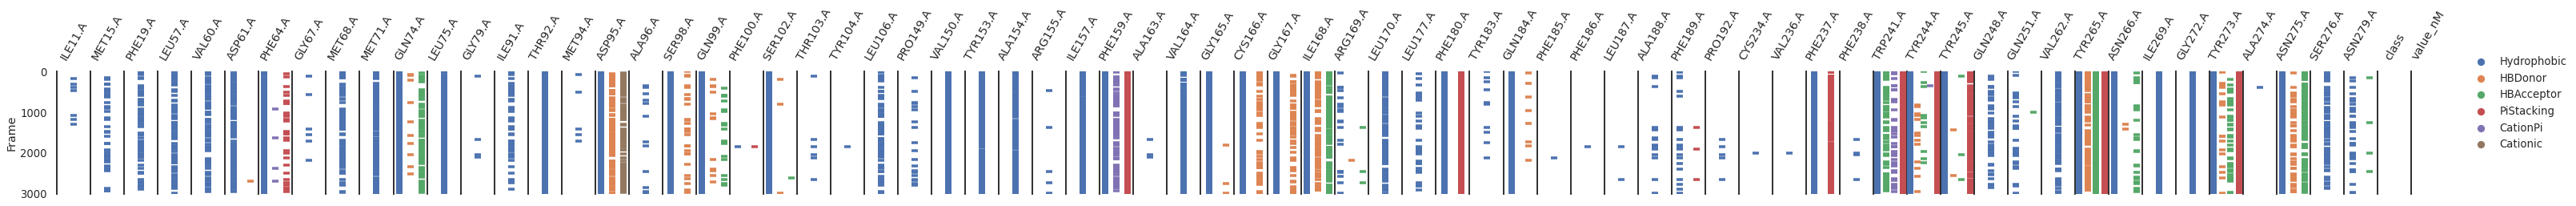

In [45]:
sns.set_theme(font_scale=.8, style="white", context="talk")
g = sns.catplot(
    data=data, x="interaction", y="Frame", hue="interaction", col="residue",
    hue_order=["Hydrophobic", "HBDonor", "HBAcceptor", "PiStacking", "CationPi", "Cationic"],
    height=3, aspect=0.2, jitter=0, sharex=False, marker="_", s=8, linewidth=3.5,
)
g.set_titles("{col_name}")
g.set(xticks=[], ylim=(-.5, data.Frame.max()+1))
g.set_xticklabels([])
g.set_xlabels("")
g.fig.subplots_adjust(wspace=0)
g.add_legend()
g.despine(bottom=True)
for ax in g.axes.flat:
    ax.invert_yaxis()
    ax.set_title(ax.get_title(), pad=15, rotation=60, ha="center", va="baseline")
#fig = g.get_figure()
g.fig.savefig("IFp_MCHR1.png")

In [46]:
g.figure.savefig("IFp_MCHR1.png", dpi=300, bbox_inches='tight')

In [48]:
import os

In [49]:
os.getcwd()

'/home/elly/Programming/MD'

In [140]:
g.figure.savefig("IFp_inactive.png", dpi=300, bbox_inches='tight')

In [34]:
data1 = df.reset_index()
data1 = pd.melt(data1, id_vars=["Frame"], var_name=["residue","interaction"])

In [35]:
data1

Frame   residue  interaction  value
0            0  LEU553.A  Hydrophobic  False
1            1  LEU553.A  Hydrophobic  False
2            2  LEU553.A  Hydrophobic  False
3            3  LEU553.A  Hydrophobic  False
4            4  LEU553.A  Hydrophobic  False
...        ...       ...          ...    ...
1003075   7711  LEU666.D  Hydrophobic  False
1003076   7712  LEU666.D  Hydrophobic  False
1003077   7713  LEU666.D  Hydrophobic  False
1003078   7714  LEU666.D  Hydrophobic  False
1003079   7715  LEU666.D  Hydrophobic  False

[1003080 rows x 4 columns]

In [31]:
df

protein        LEU553.A    SER621.A    LEU622.A    THR623.A          \
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic HBDonor   
Frame                                                                 
0                 False       False       False       False   False   
1                 False       False       False       False   False   
2                 False       False       False       False   False   
3                 False       False       False       False   False   
4                 False       False       False       False   False   
...                 ...         ...         ...         ...     ...   
7711              False       False       False       False   False   
7712              False       False       False       False   False   
7713              False       False       False       False   False   
7714              False       False       False       False   False   
7715              False       False       False       False   False   

protein        SER624.A            VAL625.A    GLY648.A    SER649.A          \
interaction Hydrophobic HBDonor Hydrophobic Hydrophobic Hydrophobic HBDonor   
Frame                                                                         
0                 False   False       False       False       False   False   
1                 False   False       False       False       False   False   
2                 False   False       False       False       False   False   
3                 False   False       False       False       False   False   
4                 False   False       False       False       False   False   
...                 ...     ...         ...         ...         ...     ...   
7711              False   False       False       False       False   False   
7712              False   False       False       False       False   False   
7713              False   False       False       False       False   False   
7714              False   False       False       False       False   False   
7715              False   False       False       False       False   False   

protein        TYR652.A                                           ALA653.A  \
interaction Hydrophobic HBDonor HBAcceptor CationPi PiStacking Hydrophobic   
Frame                                                                        
0                  True   False      False    False      False        True   
1                  True   False      False    False       True       False   
2                  True   False      False    False       True        True   
3                  True   False      False    False      False        True   
4                  True   False      False    False      False       False   
...                 ...     ...        ...      ...        ...         ...   
7711              False   False      False    False      False       False   
7712               True   False      False    False      False        True   
7713               True   False      False    False      False       False   
7714               True   False      False    False      False        True   
7715               True   False      False    False      False       False   

protein                SER654.A            ILE655.A    PHE656.A          \
interaction HBDonor Hydrophobic HBDonor Hydrophobic Hydrophobic HBDonor   
Frame                                                                     
0             False       False   False       False        True   False   
1             False        True   False        True        True   False   
2             False       False   False       False        True   False   
3             False        True   False        True        True   False   
4             False        True   False        True       False   False   
...             ...         ...     ...         ...         ...     ...   
7711          False       False   False       False       False   False   
7712          False       False   False       False    

In [ ]:
df1.apply(np.sqrt)

In [46]:
df.to_csv("herg_res_ifH.csv")

In [13]:
df = pd.read_table('herg_res_ifH.csv', sep = ",", engine='python')
df

ligand         UNL1       UNL1.1       UNL1.2       UNL1.3  \
0         protein     LEU553.A     SER621.A     LEU622.A     THR623.A   
1     interaction  Hydrophobic  Hydrophobic  Hydrophobic  Hydrophobic   
2           Frame          NaN          NaN          NaN          NaN   
3               0        False        False        False        False   
4               1        False        False        False        False   
...           ...          ...          ...          ...          ...   
7714         7711        False        False        False        False   
7715         7712        False        False        False        False   
7716         7713        False        False        False        False   
7717         7714        False        False        False        False   
7718         7715        False        False        False        False   

        UNL1.4       UNL1.5    UNL1.6       UNL1.7       UNL1.8       UNL1.9  \
0     THR623.A     SER624.A  SER624.A     VAL625.A     GLY648.A     SER649.A   
1      HBDonor  Hydrophobic   HBDonor  Hydrophobic  Hydrophobic  Hydrophobic   
2          NaN          NaN       NaN          NaN          NaN          NaN   
3        False        False     False        False        False        False   
4        False        False     False        False        False        False   
...        ...          ...       ...          ...          ...          ...   
7714     False        False     False        False        False        False   
7715     False        False     False        False        False        False   
7716     False        False     False        False        False        False   
7717     False        False     False        False        False        False   
7718     False        False     False        False        False        False   

       UNL1.10      UNL1.11   UNL1.12     UNL1.13   UNL1.14     UNL1.15  \
0     SER649.A     TYR652.A  TYR652.A    TYR652.A  TYR652.A    TYR652.A   
1      HBDonor  Hydrophobic   HBDonor  HBAcceptor  CationPi  PiStacking   
2          NaN          NaN       NaN         NaN       NaN         NaN   
3        False         True     False       False     False       False   
4        False         True     False       False     False        True   
...        ...          ...       ...         ...       ...         ...   
7714     False        False     False       False     False       False   
7715     False         True     False       False     False       False   
7716     False         True     False       False     False       False   
7717     False         True     False       False     False       False   
7718     False         True     False       False     False       False   

          UNL1.16   UNL1.17      UNL1.18   UNL1.19      UNL1.20      UNL1.21  \
0        ALA653.A  ALA653.A     SER654.A  SER654.A     ILE655.A     PHE656.A   
1     Hydrophobic   HBDonor  Hydrophobic   HBDonor  Hydrophobic  Hydrophobic   
2             NaN       NaN          NaN       NaN          NaN          NaN   
3            True     False        False     False        False         True   
4           False     False         True     False         True         True   
...           ...       ...          ...       ...          ...          ...   
7714        False     False        False     False        False        False   
7715         True     False        False     False        False         True   
7716        False     False        False     False        False        False   
7717         True     False        False     False        False         True   
7718        False     False        False     False        False         True   

       UNL1.22      UNL1.23   UNL1.24      UNL1.25   UNL1.26      UNL1.27  \
0     PHE656.A     GLY657.A  GLY657.A     ASN658.A  ASN658.A     SER660.A   
1      HBDonor  Hydrophobic   HBDonor  Hydrophobic   HBDonor  Hydrophobic   
2          NaN          NaN       NaN          NaN       NaN          NaN   
3  

In [ ]:
df = pd.read_table('herg_in_web.csv', sep = ",", engine='python')


In [ ]:
df1 = df1[pd.Series(list(zip(df1.c, df1.l)), index=df1.index).isin(idxs)]

In [19]:
path = str(plf.datafiles.datapath / "vina" / "herg_SP_no_dubles.sdf")
lig_suppl = list(plf.sdf_supplier(path))
# generate fingerprint
fp = plf.Fingerprint(["Hydrophobic"])
fp.run_from_iterable(lig_suppl, prot)
df = fp.to_dataframe()
df

  0%|          | 0/7716 [00:00<?, ?it/s]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[7716 rows x 0 columns]

In [8]:
plf.Fingerprint.list_available(show_hidden=True)

['Anionic',
 'CationPi',
 'Cationic',
 'EdgeToFace',
 'FaceToFace',
 'HBAcceptor',
 'HBDonor',
 'Hydrophobic',
 'Interaction',
 'MetalAcceptor',
 'MetalDonor',
 'PiCation',
 'PiStacking',
 'XBAcceptor',
 'XBDonor',
 '_BaseCationPi',
 '_BaseHBond',
 '_BaseIonic',
 '_BaseMetallic',
 '_BaseXBond',
 '_Distance']

In [37]:
prot = plf.Molecule.from_mda(prot)

AttributeError: module 'prolif' has no attribute 'Molecule'

In [34]:
plf import datafiles

SyntaxError: invalid syntax (<ipython-input-34-29615397e02f>, line 1)

In [ ]:
df = pd.read_table('herg_SP.sdf', sep = ",", engine='python')
df